### Dalex [Explainable AI]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import dalex as dx
import keras.models as km
import keras

In [2]:
data = pd.read_csv("Dataset/trace4_dataset.csv", header = 0, names = ['Unnamed: 0', 'timestamp', 'type', 'collection_id', 'priority', 
                                                                    'resource_request.cpus', 'resource_request.memory', 'collection_type', 
                                                                    'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage', 'power_consumption'])

In [3]:
data = data.drop('Unnamed: 0', 1)

C:\Users\luqsa\AppData\Local\Temp/ipykernel_11316/2038751425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Unnamed: 0', 1)


In [4]:
data.shape

(1000000, 12)

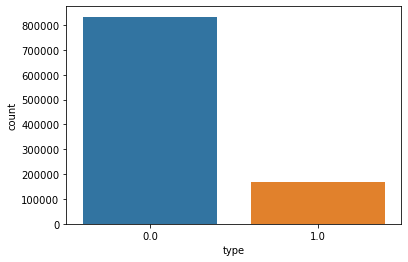

In [5]:
sns.countplot(data=data, x='type')
plt.show()

In [6]:
trace_data = pd.DataFrame(data)

In [7]:
trace_data.head()

timestamp  type  collection_id  priority  resource_request.cpus  \
0  1000000.0   1.0   4.588266e+11       1.0               0.416916   
1  1000000.0   1.0   4.588266e+11       1.0               0.416916   
2  1000000.0   1.0   4.588266e+11       1.0               0.416916   
3  1000000.0   1.0   4.588266e+11       1.0               0.416916   
4  1000000.0   1.0   4.588266e+11       1.0               0.416916   

   resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                 2.259689              0.0               1.0        1.0   
1                 2.259689              0.0               1.0        1.0   
2                 2.259689              0.0               1.0        1.0   
3                 2.259689              0.0               1.0        1.0   
4                 2.259689              0.0               1.0        1.0   

   assigned_memory  cpu_usage  power_consumption  
0         0.015625        0.0               87.0  
1         0.015625        0.0               87.0  
2         0.015625        0.0               87.0  
3         0.015625        0.0               87.0  
4         0.015625        0.0               87.0

In [8]:
trace_data.tail(10)

timestamp  type  collection_id  priority  resource_request.cpus  \
999990    1000000.0   0.0   5.016183e+11       0.0               0.937478   
999991   15000000.0   0.0   5.016183e+11       0.0               0.937478   
999992   18000000.0   0.0   5.016183e+11       0.0               0.937478   
999993   65000000.0   0.0   5.016183e+11       0.0               0.937478   
999994    4000000.0   0.0   5.016183e+11       0.0               0.937478   
999995  162000000.0   0.0   5.016183e+11       0.0               0.937478   
999996  138000000.0   0.0   5.016183e+11       0.0               0.937478   
999997    2000000.0   0.0   5.016183e+11       0.0               0.937478   
999998    2000000.0   0.0   5.016183e+11       0.0               0.937478   
999999   87000000.0   0.0   2.809728e+11       0.0              -0.023126   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
999990                 0.411742              0.0               2.0        0.0   
999991                 0.411742              0.0               2.0        0.0   
999992                 0.411742              0.0               2.0        0.0   
999993                 0.411742              0.0               2.0        0.0   
999994                 0.411742              0.0               2.0        0.0   
999995                 0.411742              0.0               2.0        0.0   
999996                 0.411742              0.0               2.0        0.0   
999997                 0.411742              0.0               2.0        0.0   
999998                 0.411742              0.0               2.0        0.0   
999999                 0.003504              0.0               2.0        0.0   

        assigned_memory  cpu_usage  power_consumption  
999990         0.002804   0.001596          87.178144  
999991         0.002804   0.001272          87.142449  
999992         0.002804   0.045525          91.513540  
999993         0.002804   0.068336          93.571941  
999994         0.002804   0.174927         102.239930  
999995         0.002804   0.129639          98.717181  
999996         0.002804   0.160950         101.174498  
999997         0.002804   0.001474          87.164726  
999998         0.002804   0.001665          87.185681  
999999         0.001780   0.001167          87.130862

In [9]:
#Y = trace_data['type'].to_numpy()
#X = trace_data.drop(['type', 'timestamp'], axis = 1).to_numpy()
X, Y = trace_data.drop(['type', 'timestamp'], axis = 1), trace_data.type

In [10]:
print('Features Shape', X.shape)
print('Labels Shape', Y.shape)

Features Shape (1000000, 10)
Labels Shape (1000000,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [12]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [13]:
X_train_RUS, Y_train_RUS = undersample.fit_resample(X_train, Y_train)

<AxesSubplot:>

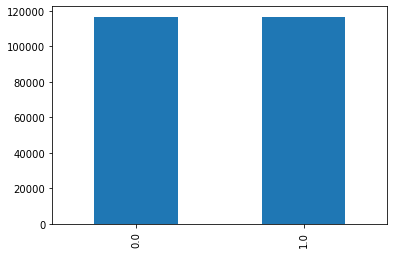

In [14]:
pd.Series(Y_train_RUS).value_counts().plot.bar()

In [15]:
X_test_RUS, Y_test_RUS = undersample.fit_resample(X_test, Y_test)

<AxesSubplot:>

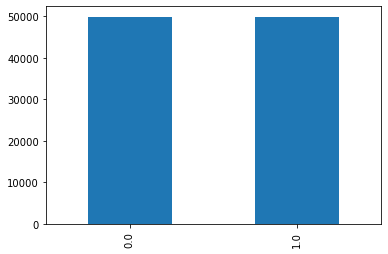

In [16]:
pd.Series(Y_test_RUS).value_counts().plot.bar()

#### Imbalanced Data Model Fit - Random Oversampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [18]:
X_train_ROS, Y_train_ROS = oversample.fit_resample(X_train, Y_train)

<AxesSubplot:>

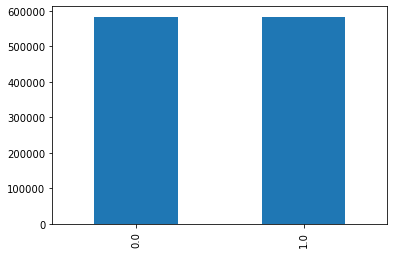

In [19]:
pd.Series(Y_train_ROS).value_counts().plot.bar()

In [20]:
X_test_ROS, Y_test_ROS = oversample.fit_resample(X_test, Y_test)

<AxesSubplot:>

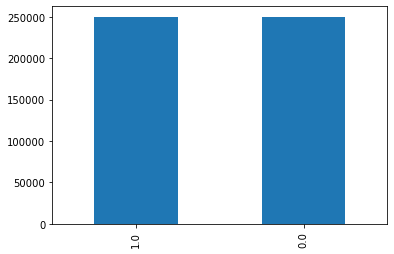

In [21]:
pd.Series(Y_test_ROS).value_counts().plot.bar()

#### Imbalanced Data Model Fit - SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [23]:
X_train_SMOTE, Y_train_SMOTE = oversample.fit_resample(X_train, Y_train)

<AxesSubplot:>

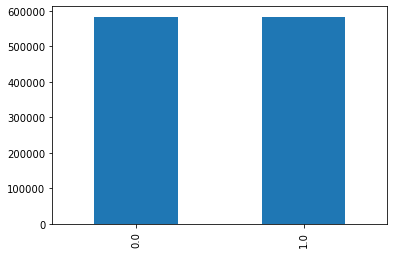

In [24]:
pd.Series(Y_train_SMOTE).value_counts().plot.bar()

In [25]:
X_test_SMOTE, Y_test_SMOTE = oversample.fit_resample(X_test, Y_test)

<AxesSubplot:>

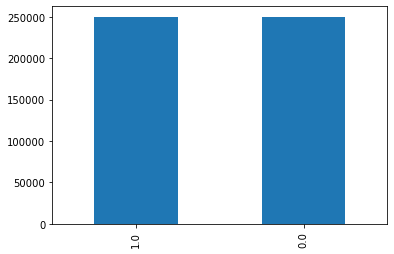

In [26]:
pd.Series(Y_test_SMOTE).value_counts().plot.bar()

In [27]:
Y.shape

(1000000,)

In [28]:
import warnings
warnings.filterwarnings('ignore')

#### Without Imbalaced Handling

##### Logistic Regression

In [96]:
LR_train = joblib.load('Jobs/WIB/LogReg.model')
exp_LR_train = dx.Explainer(LR_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.86e-06, mean = 0.167, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 5.43e-05, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [97]:
exp_LR_train.model_performance(model_type = 'classification')

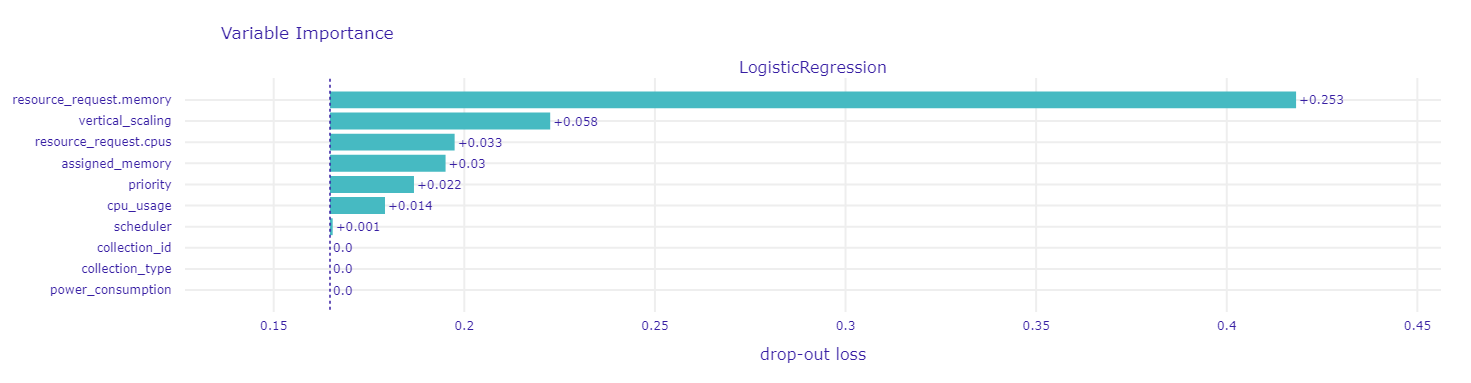

In [98]:
explanation_LR_train = exp_LR_train.model_parts()
explanation_LR_train.result
explanation_LR_train.plot()

In [99]:
exp_LR_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.022867   
327991         0.001163   0.004663          87.509265  1.0  0.806349   
715937         0.002460   0.002063          87.229200  0.0  0.047274   
860726         0.002460   0.002058          87.228679  0.0  0.047289   
78617          0.003300   0.004447          87.486289  0.0  0.176978   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.028524   
365838         0.001410   0.002091          87.232322  0.0  0.174843   
131932         0.007812   0.024213          89.491665  1.0  0.006687   
671155         0.002460   0.002031          87.225764  0.0  0.047372   
121958         0.004616   0.002248          87.249373  0.0  0.051391   

        residuals  abs_residuals               label     ids  
506532  -0.022867       0.022867  LogisticRegression       1  
327991   0.193651       0.193651  LogisticRegression       2  
715937  -0.047274       0.047274  LogisticRegression       3  
860726  -0.047289       0.047289  LogisticRegression       4  
78617   -0.176978       0.176978  LogisticRegression       5  
...           ...            ...                 ...     ...  
259178  -0.028524       0.028524  LogisticRegression  699996  
365838  -0.174843       0.174843  LogisticRegression  699997  
131932   0.993313       0.993313  LogisticRegression  699998  
671155  -0.047372       0.047372  LogisticRegression  699999  
121958  -0.051391       0.051391  LogisticRegression  700000  

[700000 rows x 16 columns]

In [100]:
LR_test = joblib.load('Jobs/WIB/LogReg.model')
exp_LR_test = dx.Explainer(LR_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.85e-06, mean = 0.166, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.000363, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [101]:
exp_LR_test.model_performance(model_type = 'classification')

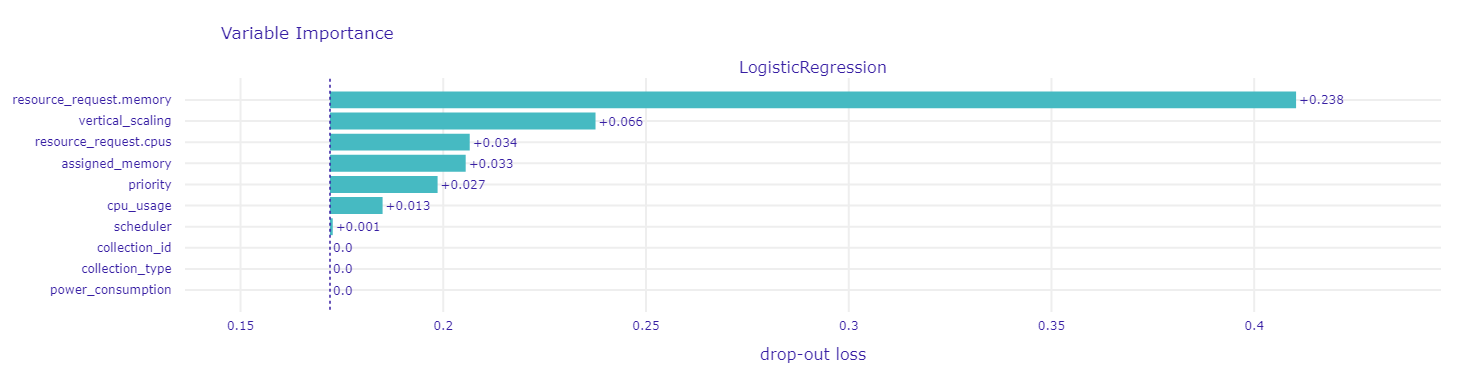

In [102]:
explanation_LR_test = exp_LR_test.model_parts()
explanation_LR_test.result
explanation_LR_test.plot()

In [103]:
exp_LR_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.013016   
79954          0.010422  5.584717e-03          87.607161  1.0  0.010385   
567130         0.002460  2.060890e-03          87.228992  0.0  0.047280   
500891         0.013779  4.572754e-01         120.649518  0.0  0.022869   
55399          0.005600  9.536743e-07          87.000110  0.0  0.182125   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.222090   
728324         0.002460  2.230644e-03          87.247503  0.0  0.046757   
76260          0.004112  8.382797e-04          87.094382  0.0  0.026834   
77813          0.004112  8.192062e-04          87.092260  0.0  0.027013   
718205         0.002460  2.095222e-03          87.232738  0.0  0.047174   

        residuals  abs_residuals               label     ids  
987231   0.986984       0.986984  LogisticRegression       1  
79954    0.989615       0.989615  LogisticRegression       2  
567130  -0.047280       0.047280  LogisticRegression       3  
500891  -0.022869       0.022869  LogisticRegression       4  
55399   -0.182125       0.182125  LogisticRegression       5  
...           ...            ...                 ...     ...  
463299  -0.222090       0.222090  LogisticRegression  299996  
728324  -0.046757       0.046757  LogisticRegression  299997  
76260   -0.026834       0.026834  LogisticRegression  299998  
77813   -0.027013       0.027013  LogisticRegression  299999  
718205  -0.047174       0.047174  LogisticRegression  300000  

[300000 rows x 16 columns]

##### Decision Tree

In [104]:
DT_train = joblib.load('Jobs/WIB/DecisionTreeClassifier.model')
exp_DT_train = dx.Explainer(DT_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0393, mean = 0.167, max = 0.863
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.863, mean = 4.48e-05, max = 0.961
  -> model_info        : package sklearn

A new explainer has been created!


In [105]:
exp_DT_train.model_performance(model_type = 'classification')

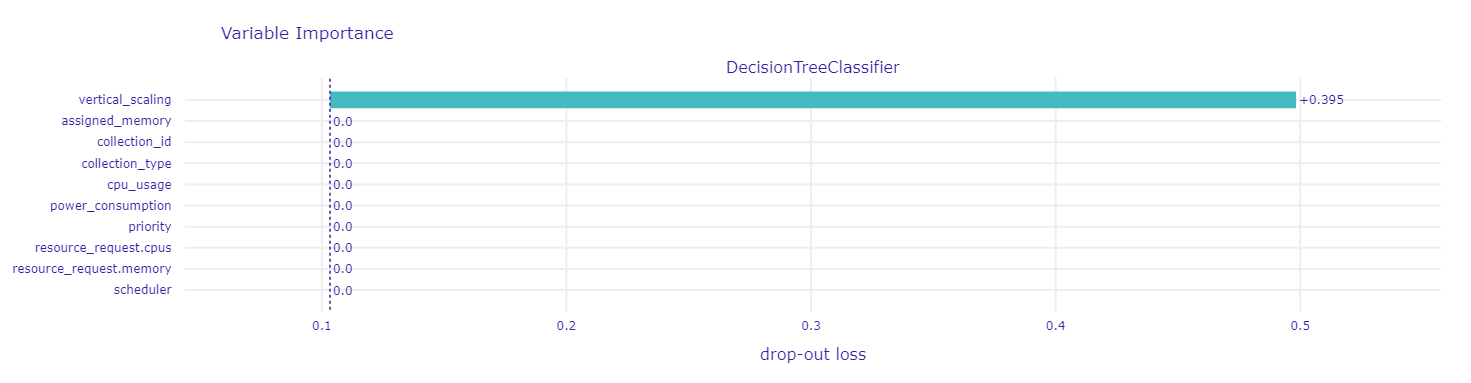

In [106]:
explanation_DR_train = exp_DT_train.model_parts()
explanation_DR_train.result
explanation_DR_train.plot()

In [107]:
exp_DT_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.039331   
327991         0.001163   0.004663          87.509265  1.0  0.862635   
715937         0.002460   0.002063          87.229200  0.0  0.039331   
860726         0.002460   0.002058          87.228679  0.0  0.039331   
78617          0.003300   0.004447          87.486289  0.0  0.039331   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.039331   
365838         0.001410   0.002091          87.232322  0.0  0.039331   
131932         0.007812   0.024213          89.491665  1.0  0.039331   
671155         0.002460   0.002031          87.225764  0.0  0.039331   
121958         0.004616   0.002248          87.249373  0.0  0.039331   

        residuals  abs_residuals                   label     ids  
506532  -0.039331       0.039331  DecisionTreeClassifier       1  
327991   0.137365       0.137365  DecisionTreeClassifier       2  
715937  -0.039331       0.039331  DecisionTreeClassifier       3  
860726  -0.039331       0.039331  DecisionTreeClassifier       4  
78617   -0.039331       0.039331  DecisionTreeClassifier       5  
...           ...            ...                     ...     ...  
259178  -0.039331       0.039331  DecisionTreeClassifier  699996  
365838  -0.039331       0.039331  DecisionTreeClassifier  699997  
131932   0.960669       0.960669  DecisionTreeClassifier  699998  
671155  -0.039331       0.039331  DecisionTreeClassifier  699999  
121958  -0.039331       0.039331  DecisionTreeClassifier  700000  

[700000 rows x 16 columns]

In [108]:
DT_test = joblib.load('Jobs/WIB/DecisionTreeClassifier.model')
exp_DT_test = dx.Explainer(DT_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0393, mean = 0.166, max = 0.863
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.863, mean = 0.000843, max = 0.961
  -> model_info        : package sklearn

A new explainer has been created!


In [109]:
exp_DT_test.model_performance(model_type = 'classification')

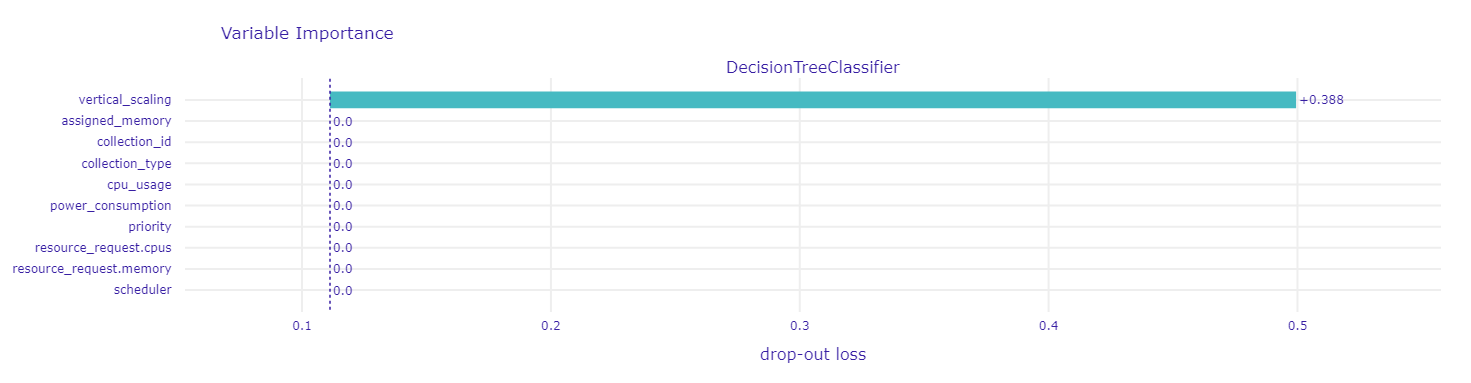

In [110]:
explanation_DT_test = exp_DT_test.model_parts()
explanation_DT_test.result
explanation_DT_test.plot()

In [111]:
exp_DT_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.039331   
79954          0.010422  5.584717e-03          87.607161  1.0  0.039331   
567130         0.002460  2.060890e-03          87.228992  0.0  0.039331   
500891         0.013779  4.572754e-01         120.649518  0.0  0.039331   
55399          0.005600  9.536743e-07          87.000110  0.0  0.039331   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.039331   
728324         0.002460  2.230644e-03          87.247503  0.0  0.039331   
76260          0.004112  8.382797e-04          87.094382  0.0  0.039331   
77813          0.004112  8.192062e-04          87.092260  0.0  0.039331   
718205         0.002460  2.095222e-03          87.232738  0.0  0.039331   

        residuals  abs_residuals                   label     ids  
987231   0.960669       0.960669  DecisionTreeClassifier       1  
79954    0.960669       0.960669  DecisionTreeClassifier       2  
567130  -0.039331       0.039331  DecisionTreeClassifier       3  
500891  -0.039331       0.039331  DecisionTreeClassifier       4  
55399   -0.039331       0.039331  DecisionTreeClassifier       5  
...           ...            ...                     ...     ...  
463299  -0.039331       0.039331  DecisionTreeClassifier  299996  
728324  -0.039331       0.039331  DecisionTreeClassifier  299997  
76260   -0.039331       0.039331  DecisionTreeClassifier  299998  
77813   -0.039331       0.039331  DecisionTreeClassifier  299999  
718205  -0.039331       0.039331  DecisionTreeClassifier  300000  

[300000 rows x 16 columns]

##### Random Forest

In [112]:
RF_train = joblib.load('Jobs/WIB/RandomForestClassifier.model')
exp_RF_train = dx.Explainer(RF_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.085, mean = 0.167, max = 0.803
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.802, mean = -1.67e-05, max = 0.914
  -> model_info        : package sklearn

A new explainer has been created!


In [113]:
exp_RF_train.model_performance(model_type = 'classification')

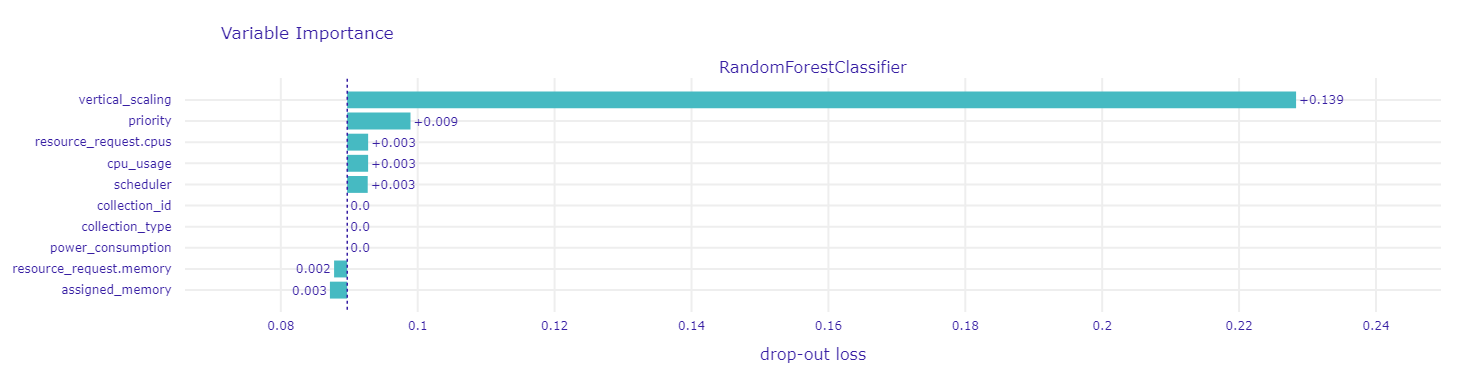

In [114]:
explanation_RF_train = exp_RF_train.model_parts()
explanation_RF_train.result
explanation_RF_train.plot()

In [115]:
exp_RF_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.101782   
327991         0.001163   0.004663          87.509265  1.0  0.803395   
715937         0.002460   0.002063          87.229200  0.0  0.086059   
860726         0.002460   0.002058          87.228679  0.0  0.086059   
78617          0.003300   0.004447          87.486289  0.0  0.101782   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.086059   
365838         0.001410   0.002091          87.232322  0.0  0.086059   
131932         0.007812   0.024213          89.491665  1.0  0.101782   
671155         0.002460   0.002031          87.225764  0.0  0.086059   
121958         0.004616   0.002248          87.249373  0.0  0.086059   

        residuals  abs_residuals                   label     ids  
506532  -0.101782       0.101782  RandomForestClassifier       1  
327991   0.196605       0.196605  RandomForestClassifier       2  
715937  -0.086059       0.086059  RandomForestClassifier       3  
860726  -0.086059       0.086059  RandomForestClassifier       4  
78617   -0.101782       0.101782  RandomForestClassifier       5  
...           ...            ...                     ...     ...  
259178  -0.086059       0.086059  RandomForestClassifier  699996  
365838  -0.086059       0.086059  RandomForestClassifier  699997  
131932   0.898218       0.898218  RandomForestClassifier  699998  
671155  -0.086059       0.086059  RandomForestClassifier  699999  
121958  -0.086059       0.086059  RandomForestClassifier  700000  

[700000 rows x 16 columns]

In [116]:
RF_test = joblib.load('Jobs/WIB/RandomForestClassifier.model')
exp_RF_test = dx.Explainer(RF_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.085, mean = 0.166, max = 0.803
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.788, mean = 0.000738, max = 0.914
  -> model_info        : package sklearn

A new explainer has been created!


In [117]:
exp_RF_test.model_performance(model_type = 'classification')

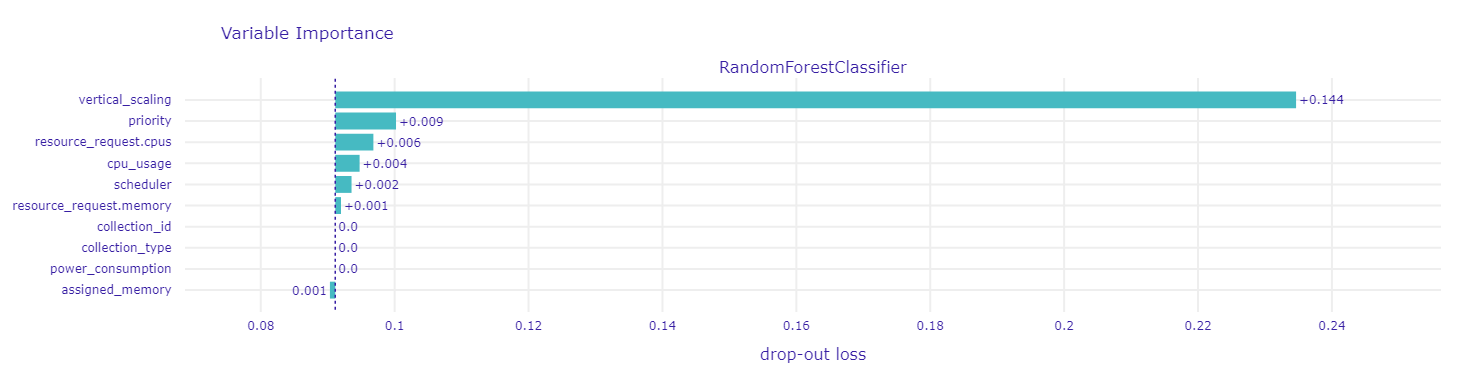

In [118]:
explanation_RF_test = exp_RF_test.model_parts()
explanation_RF_test.result
explanation_RF_test.plot()

In [119]:
exp_RF_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.086059   
79954          0.010422  5.584717e-03          87.607161  1.0  0.101782   
567130         0.002460  2.060890e-03          87.228992  0.0  0.086059   
500891         0.013779  4.572754e-01         120.649518  0.0  0.101782   
55399          0.005600  9.536743e-07          87.000110  0.0  0.086059   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.086059   
728324         0.002460  2.230644e-03          87.247503  0.0  0.086059   
76260          0.004112  8.382797e-04          87.094382  0.0  0.086059   
77813          0.004112  8.192062e-04          87.092260  0.0  0.086059   
718205         0.002460  2.095222e-03          87.232738  0.0  0.086059   

        residuals  abs_residuals                   label     ids  
987231   0.913941       0.913941  RandomForestClassifier       1  
79954    0.898218       0.898218  RandomForestClassifier       2  
567130  -0.086059       0.086059  RandomForestClassifier       3  
500891  -0.101782       0.101782  RandomForestClassifier       4  
55399   -0.086059       0.086059  RandomForestClassifier       5  
...           ...            ...                     ...     ...  
463299  -0.086059       0.086059  RandomForestClassifier  299996  
728324  -0.086059       0.086059  RandomForestClassifier  299997  
76260   -0.086059       0.086059  RandomForestClassifier  299998  
77813   -0.086059       0.086059  RandomForestClassifier  299999  
718205  -0.086059       0.086059  RandomForestClassifier  300000  

[300000 rows x 16 columns]

##### Gradient Boosting

In [120]:
GB_train = joblib.load('Jobs/WIB/GradientBoostingClassifier.model')
exp_GB_train = dx.Explainer(GB_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0745, mean = 0.171, max = 0.653
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.636, mean = -0.00418, max = 0.926
  -> model_info        : package sklearn

A new explainer has been created!


In [121]:
exp_GB_train.model_performance(model_type = 'classification')

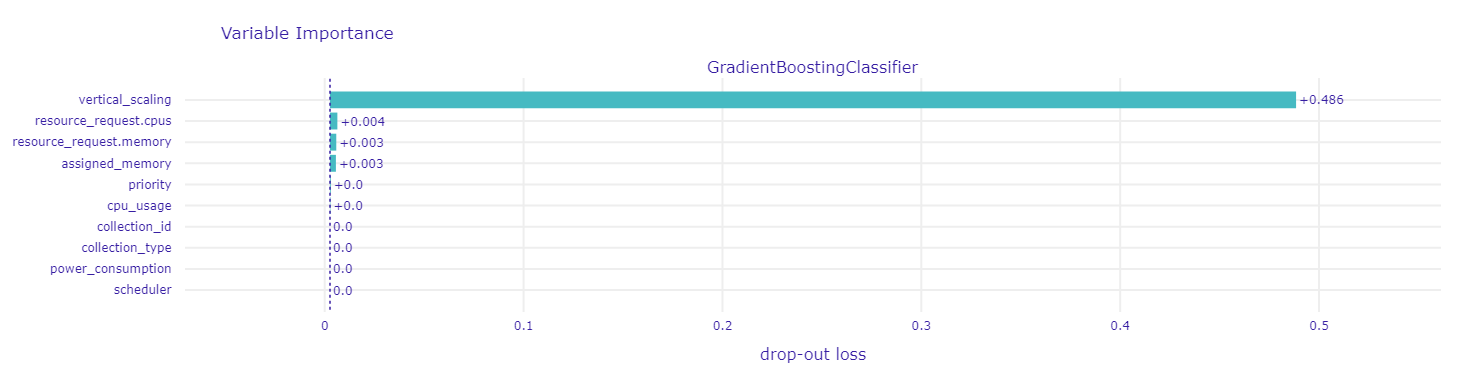

In [122]:
explanation_GB_train = exp_GB_train.model_parts()
explanation_GB_train.result
explanation_GB_train.plot()

In [123]:
exp_GB_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.074462   
327991         0.001163   0.004663          87.509265  1.0  0.634984   
715937         0.002460   0.002063          87.229200  0.0  0.074462   
860726         0.002460   0.002058          87.228679  0.0  0.074462   
78617          0.003300   0.004447          87.486289  0.0  0.074462   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.074462   
365838         0.001410   0.002091          87.232322  0.0  0.074462   
131932         0.007812   0.024213          89.491665  1.0  0.635547   
671155         0.002460   0.002031          87.225764  0.0  0.074462   
121958         0.004616   0.002248          87.249373  0.0  0.074462   

        residuals  abs_residuals                       label     ids  
506532  -0.074462       0.074462  GradientBoostingClassifier       1  
327991   0.365016       0.365016  GradientBoostingClassifier       2  
715937  -0.074462       0.074462  GradientBoostingClassifier       3  
860726  -0.074462       0.074462  GradientBoostingClassifier       4  
78617   -0.074462       0.074462  GradientBoostingClassifier       5  
...           ...            ...                         ...     ...  
259178  -0.074462       0.074462  GradientBoostingClassifier  699996  
365838  -0.074462       0.074462  GradientBoostingClassifier  699997  
131932   0.364453       0.364453  GradientBoostingClassifier  699998  
671155  -0.074462       0.074462  GradientBoostingClassifier  699999  
121958  -0.074462       0.074462  GradientBoostingClassifier  700000  

[700000 rows x 16 columns]

In [124]:
GB_test = joblib.load('Jobs/WIB/GradientBoostingClassifier.model')
exp_GB_test = dx.Explainer(GB_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0745, mean = 0.171, max = 0.653
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.636, mean = -0.00415, max = 0.926
  -> model_info        : package sklearn

A new explainer has been created!


In [125]:
exp_GB_test.model_performance(model_type = 'classification')

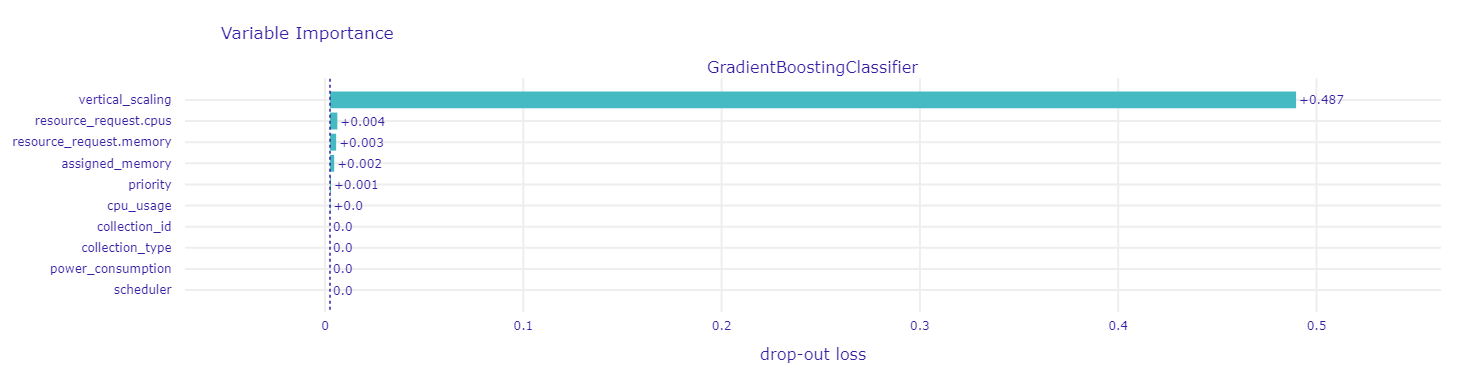

In [126]:
explanation_GB_test = exp_GB_test.model_parts()
explanation_GB_test.result
explanation_GB_test.plot()

In [127]:
exp_GB_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.635547   
79954          0.010422  5.584717e-03          87.607161  1.0  0.635547   
567130         0.002460  2.060890e-03          87.228992  0.0  0.074462   
500891         0.013779  4.572754e-01         120.649518  0.0  0.074462   
55399          0.005600  9.536743e-07          87.000110  0.0  0.074462   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.074462   
728324         0.002460  2.230644e-03          87.247503  0.0  0.074462   
76260          0.004112  8.382797e-04          87.094382  0.0  0.074462   
77813          0.004112  8.192062e-04          87.092260  0.0  0.074462   
718205         0.002460  2.095222e-03          87.232738  0.0  0.074462   

        residuals  abs_residuals                       label     ids  
987231   0.364453       0.364453  GradientBoostingClassifier       1  
79954    0.364453       0.364453  GradientBoostingClassifier       2  
567130  -0.074462       0.074462  GradientBoostingClassifier       3  
500891  -0.074462       0.074462  GradientBoostingClassifier       4  
55399   -0.074462       0.074462  GradientBoostingClassifier       5  
...           ...            ...                         ...     ...  
463299  -0.074462       0.074462  GradientBoostingClassifier  299996  
728324  -0.074462       0.074462  GradientBoostingClassifier  299997  
76260   -0.074462       0.074462  GradientBoostingClassifier  299998  
77813   -0.074462       0.074462  GradientBoostingClassifier  299999  
718205  -0.074462       0.074462  GradientBoostingClassifier  300000  

[300000 rows x 16 columns]

##### Extreme Gradient Boosting

In [128]:
XGB_train = joblib.load('Jobs/WIB/XGBClassifier.model')
exp_XGB_train = dx.Explainer(XGB_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.403, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -0.236, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [129]:
exp_XGB_train.model_performance(model_type = 'classification')

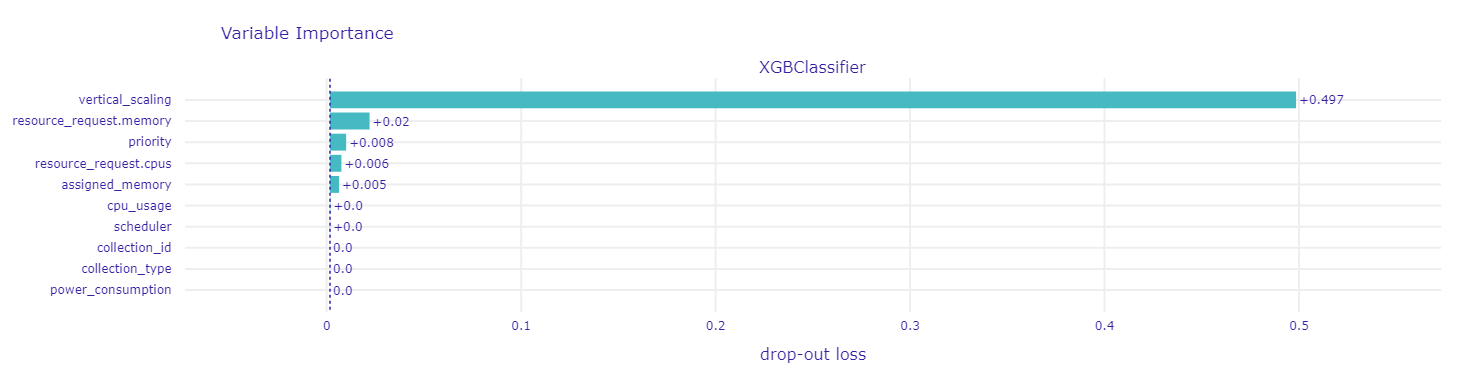

In [130]:
explanation_XGB_train = exp_XGB_train.model_parts()
explanation_XGB_train.result
explanation_XGB_train.plot()

In [131]:
exp_XGB_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.354365   
327991         0.001163   0.004663          87.509265  1.0  0.645617   
715937         0.002460   0.002063          87.229200  0.0  0.354365   
860726         0.002460   0.002058          87.228679  0.0  0.354365   
78617          0.003300   0.004447          87.486289  0.0  0.354365   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.354365   
365838         0.001410   0.002091          87.232322  0.0  0.354365   
131932         0.007812   0.024213          89.491665  1.0  0.645633   
671155         0.002460   0.002031          87.225764  0.0  0.354365   
121958         0.004616   0.002248          87.249373  0.0  0.354365   

        residuals  abs_residuals          label     ids  
506532  -0.354365       0.354365  XGBClassifier       1  
327991   0.354383       0.354383  XGBClassifier       2  
715937  -0.354365       0.354365  XGBClassifier       3  
860726  -0.354365       0.354365  XGBClassifier       4  
78617   -0.354365       0.354365  XGBClassifier       5  
...           ...            ...            ...     ...  
259178  -0.354365       0.354365  XGBClassifier  699996  
365838  -0.354365       0.354365  XGBClassifier  699997  
131932   0.354367       0.354367  XGBClassifier  699998  
671155  -0.354365       0.354365  XGBClassifier  699999  
121958  -0.354365       0.354365  XGBClassifier  700000  

[700000 rows x 16 columns]

In [132]:
XGB_test = joblib.load('Jobs/WIB/XGBClassifier.model')
exp_XGB_test = dx.Explainer(XGB_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.403, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -0.236, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [133]:
exp_XGB_test.model_performance(model_type = 'classification')

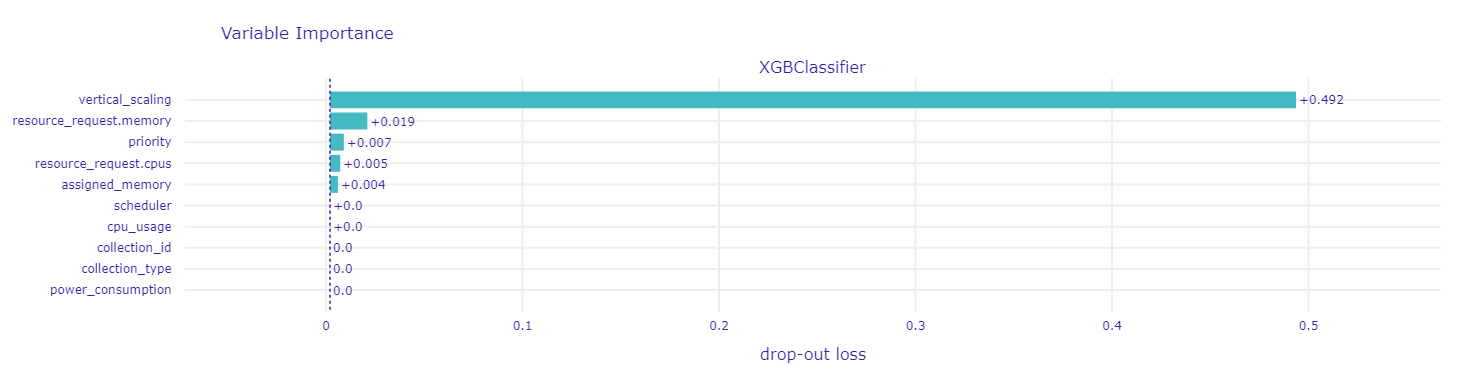

In [134]:
explanation_XGB_test = exp_XGB_test.model_parts()
explanation_XGB_test.result
explanation_XGB_test.plot()

In [135]:
exp_XGB_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.645633   
79954          0.010422  5.584717e-03          87.607161  1.0  0.645633   
567130         0.002460  2.060890e-03          87.228992  0.0  0.354365   
500891         0.013779  4.572754e-01         120.649518  0.0  0.354365   
55399          0.005600  9.536743e-07          87.000110  0.0  0.354365   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.354365   
728324         0.002460  2.230644e-03          87.247503  0.0  0.354365   
76260          0.004112  8.382797e-04          87.094382  0.0  0.354365   
77813          0.004112  8.192062e-04          87.092260  0.0  0.354365   
718205         0.002460  2.095222e-03          87.232738  0.0  0.354365   

        residuals  abs_residuals          label     ids  
987231   0.354367       0.354367  XGBClassifier       1  
79954    0.354367       0.354367  XGBClassifier       2  
567130  -0.354365       0.354365  XGBClassifier       3  
500891  -0.354365       0.354365  XGBClassifier       4  
55399   -0.354365       0.354365  XGBClassifier       5  
...           ...            ...            ...     ...  
463299  -0.354365       0.354365  XGBClassifier  299996  
728324  -0.354365       0.354365  XGBClassifier  299997  
76260   -0.354365       0.354365  XGBClassifier  299998  
77813   -0.354365       0.354365  XGBClassifier  299999  
718205  -0.354365       0.354365  XGBClassifier  300000  

[300000 rows x 16 columns]

#### With Imbalanced Handling - Using RUS

##### Logistic Regression

In [136]:
LR_RUS_train = joblib.load('Jobs/RUS/LogReg.model')
exp_LR_RUS_train = dx.Explainer(LR_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00013, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 1.31e-05, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [137]:
exp_LR_RUS_train.model_performance(model_type = 'classification')

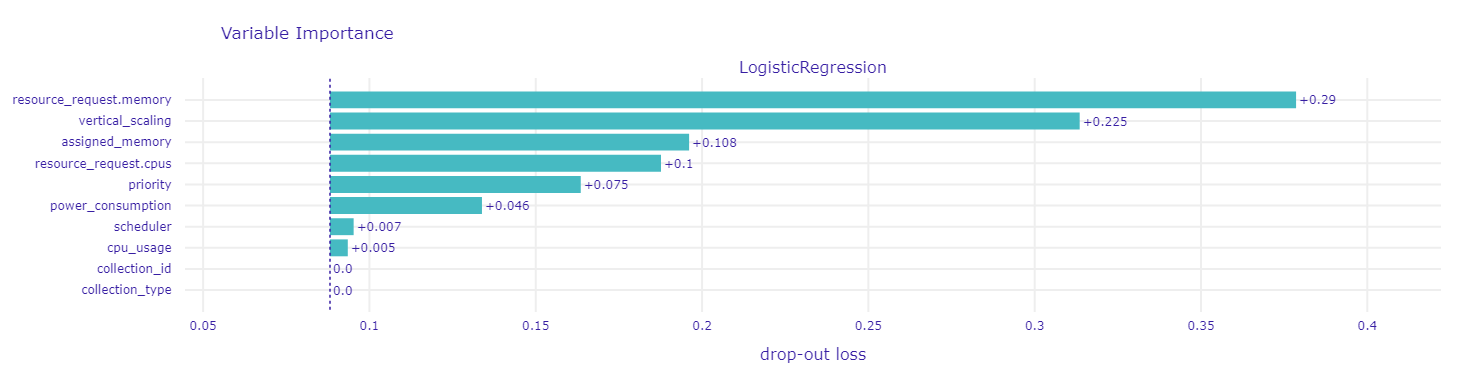

In [138]:
explanation_LR_RUS_train = exp_LR_RUS_train.model_parts()
explanation_LR_RUS_train.result
explanation_LR_RUS_train.plot()

In [139]:
exp_LR_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.128744   
1              0.002460   0.001895          87.210859  0.0  0.130265   
2              0.002460   0.002245          87.249061  0.0  0.128898   
3              0.002460   0.002182          87.242203  0.0  0.129142   
4              0.002460   0.002246          87.249165  0.0  0.128895   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.569885   
233272         0.001163   0.000023          87.002637  1.0  0.960718   
233273         0.002144   0.000040          87.004606  1.0  0.556629   
233274         0.001297   0.003181          87.350552  1.0  0.937272   
233275         0.007812   0.024213          89.491665  1.0  0.119690   

        residuals  abs_residuals               label     ids  
0       -0.128744       0.128744  LogisticRegression       1  
1       -0.130265       0.130265  LogisticRegression       2  
2       -0.128898       0.128898  LogisticRegression       3  
3       -0.129142       0.129142  LogisticRegression       4  
4       -0.128895       0.128895  LogisticRegression       5  
...           ...            ...                 ...     ...  
233271   0.430115       0.430115  LogisticRegression  233272  
233272   0.039282       0.039282  LogisticRegression  233273  
233273   0.443371       0.443371  LogisticRegression  233274  
233274   0.062728       0.062728  LogisticRegression  233275  
233275   0.880310       0.880310  LogisticRegression  233276  

[233276 rows x 16 columns]

In [140]:
LR_RUS_test = joblib.load('Jobs/RUS/LogReg.model')
exp_LR_RUS_test = dx.Explainer(LR_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.59e-05, mean = 0.499, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.00135, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [141]:
exp_LR_RUS_test.model_performance(model_type = 'classification')

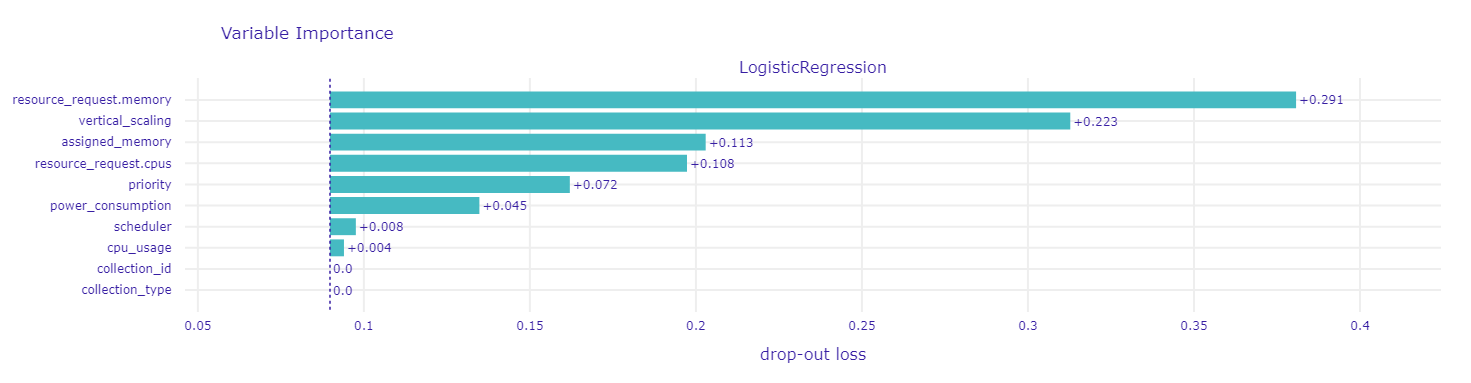

In [142]:
explanation_LR_RUS_test = exp_LR_RUS_test.model_parts()
explanation_LR_RUS_test.result
explanation_LR_RUS_test.plot()

In [143]:
exp_LR_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.129972   
1             0.002460   0.002211          87.245321  0.0  0.129031   
2             0.002460   0.002011          87.223577  0.0  0.129807   
3             0.002460   0.001897          87.211068  0.0  0.130257   
4             0.001410   0.001515          87.169236  0.0  0.326785   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.726934   
99892         0.010422   0.000000          87.000000  1.0  0.269273   
99893         0.002399   0.002175          87.241475  1.0  0.799560   
99894         0.001163   0.003661          87.402178  1.0  0.947994   
99895         0.001163   0.003451          87.379626  1.0  0.948329   

       residuals  abs_residuals               label    ids  
0      -0.129972       0.129972  LogisticRegression      1  
1      -0.129031       0.129031  LogisticRegression      2  
2      -0.129807       0.129807  LogisticRegression      3  
3      -0.130257       0.130257  LogisticRegression      4  
4      -0.326785       0.326785  LogisticRegression      5  
...          ...            ...                 ...    ...  
99891   0.273066       0.273066  LogisticRegression  99892  
99892   0.730727       0.730727  LogisticRegression  99893  
99893   0.200440       0.200440  LogisticRegression  99894  
99894   0.052006       0.052006  LogisticRegression  99895  
99895   0.051671       0.051671  LogisticRegression  99896  

[99896 rows x 16 columns]

##### Decision Tree

In [144]:
DT_RUS_train = joblib.load('Jobs/RUS/DecisionTreeClassifier.model')
exp_DT_RUS_train = dx.Explainer(DT_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.5, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = 0.000225, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [145]:
exp_DT_RUS_train.model_performance(model_type = 'classification')

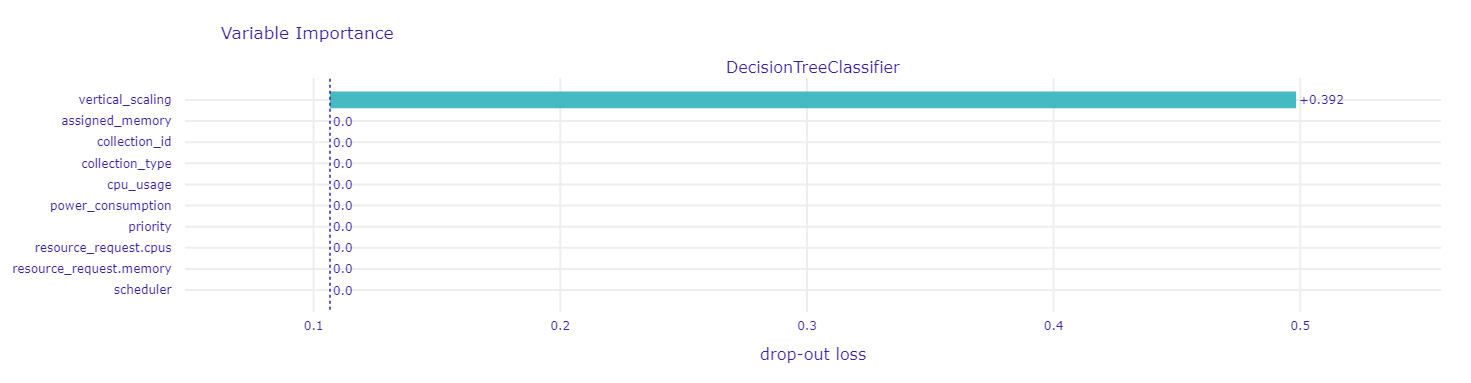

In [146]:
explanation_DT_RUS_train = exp_DT_RUS_train.model_parts()
explanation_DT_RUS_train.result
explanation_DT_RUS_train.plot()

In [147]:
exp_DT_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.170097   
1              0.002460   0.001895          87.210859  0.0  0.170097   
2              0.002460   0.002245          87.249061  0.0  0.170097   
3              0.002460   0.002182          87.242203  0.0  0.170097   
4              0.002460   0.002246          87.249165  0.0  0.170097   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.968954   
233272         0.001163   0.000023          87.002637  1.0  0.968954   
233273         0.002144   0.000040          87.004606  1.0  0.968954   
233274         0.001297   0.003181          87.350552  1.0  0.968954   
233275         0.007812   0.024213          89.491665  1.0  0.170097   

        residuals  abs_residuals                   label     ids  
0       -0.170097       0.170097  DecisionTreeClassifier       1  
1       -0.170097       0.170097  DecisionTreeClassifier       2  
2       -0.170097       0.170097  DecisionTreeClassifier       3  
3       -0.170097       0.170097  DecisionTreeClassifier       4  
4       -0.170097       0.170097  DecisionTreeClassifier       5  
...           ...            ...                     ...     ...  
233271   0.031046       0.031046  DecisionTreeClassifier  233272  
233272   0.031046       0.031046  DecisionTreeClassifier  233273  
233273   0.031046       0.031046  DecisionTreeClassifier  233274  
233274   0.031046       0.031046  DecisionTreeClassifier  233275  
233275   0.829903       0.829903  DecisionTreeClassifier  233276  

[233276 rows x 16 columns]

In [148]:
DT_RUS_test = joblib.load('Jobs/RUS/DecisionTreeClassifier.model')
exp_DT_RUS_test = dx.Explainer(DT_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.498, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = 0.00178, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [149]:
exp_DT_RUS_test.model_performance(model_type = 'classification')

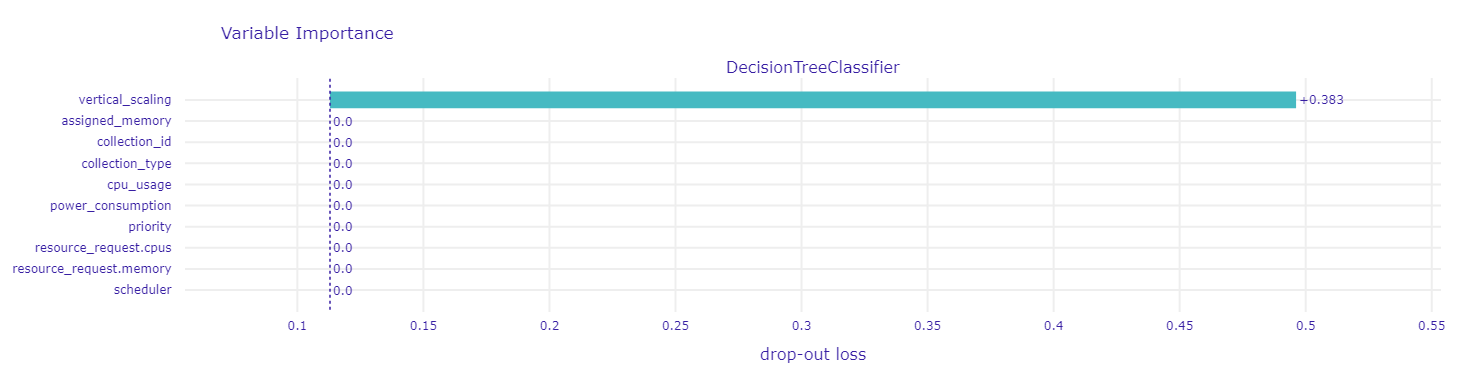

In [150]:
explanation_DT_RUS_test = exp_DT_RUS_test.model_parts()
explanation_DT_RUS_test.result
explanation_DT_RUS_test.plot()

In [151]:
exp_DT_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.170097   
1             0.002460   0.002211          87.245321  0.0  0.170097   
2             0.002460   0.002011          87.223577  0.0  0.170097   
3             0.002460   0.001897          87.211068  0.0  0.170097   
4             0.001410   0.001515          87.169236  0.0  0.170097   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.968954   
99892         0.010422   0.000000          87.000000  1.0  0.170097   
99893         0.002399   0.002175          87.241475  1.0  0.968954   
99894         0.001163   0.003661          87.402178  1.0  0.968954   
99895         0.001163   0.003451          87.379626  1.0  0.968954   

       residuals  abs_residuals                   label    ids  
0      -0.170097       0.170097  DecisionTreeClassifier      1  
1      -0.170097       0.170097  DecisionTreeClassifier      2  
2      -0.170097       0.170097  DecisionTreeClassifier      3  
3      -0.170097       0.170097  DecisionTreeClassifier      4  
4      -0.170097       0.170097  DecisionTreeClassifier      5  
...          ...            ...                     ...    ...  
99891   0.031046       0.031046  DecisionTreeClassifier  99892  
99892   0.829903       0.829903  DecisionTreeClassifier  99893  
99893   0.031046       0.031046  DecisionTreeClassifier  99894  
99894   0.031046       0.031046  DecisionTreeClassifier  99895  
99895   0.031046       0.031046  DecisionTreeClassifier  99896  

[99896 rows x 16 columns]

##### Random Forest

In [152]:
RF_RUS_train = joblib.load('Jobs/RUS/RandomForestClassifier.model')
exp_RF_RUS_train = dx.Explainer(RF_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.242, mean = 0.5, max = 0.885
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.885, mean = 0.000337, max = 0.756
  -> model_info        : package sklearn

A new explainer has been created!


In [153]:
exp_RF_RUS_train.model_performance(model_type = 'classification')

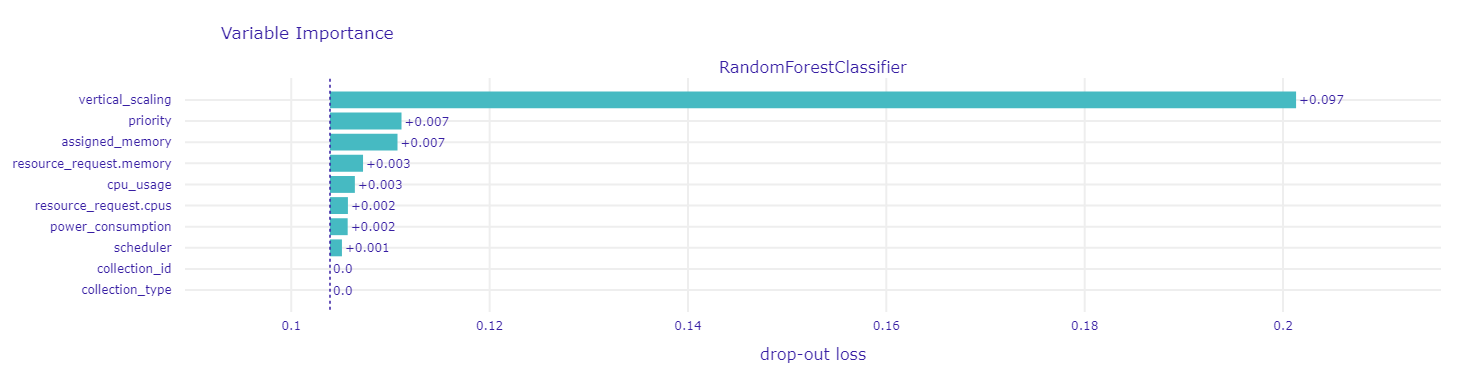

In [154]:
explanation_RF_RUS_train = exp_RF_RUS_train.model_parts()
explanation_RF_RUS_train.result
explanation_RF_RUS_train.plot()

In [155]:
exp_RF_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.244452   
1              0.002460   0.001895          87.210859  0.0  0.244452   
2              0.002460   0.002245          87.249061  0.0  0.244452   
3              0.002460   0.002182          87.242203  0.0  0.244452   
4              0.002460   0.002246          87.249165  0.0  0.244452   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.851453   
233272         0.001163   0.000023          87.002637  1.0  0.859646   
233273         0.002144   0.000040          87.004606  1.0  0.825871   
233274         0.001297   0.003181          87.350552  1.0  0.795793   
233275         0.007812   0.024213          89.491665  1.0  0.270034   

        residuals  abs_residuals                   label     ids  
0       -0.244452       0.244452  RandomForestClassifier       1  
1       -0.244452       0.244452  RandomForestClassifier       2  
2       -0.244452       0.244452  RandomForestClassifier       3  
3       -0.244452       0.244452  RandomForestClassifier       4  
4       -0.244452       0.244452  RandomForestClassifier       5  
...           ...            ...                     ...     ...  
233271   0.148547       0.148547  RandomForestClassifier  233272  
233272   0.140354       0.140354  RandomForestClassifier  233273  
233273   0.174129       0.174129  RandomForestClassifier  233274  
233274   0.204207       0.204207  RandomForestClassifier  233275  
233275   0.729966       0.729966  RandomForestClassifier  233276  

[233276 rows x 16 columns]

In [156]:
RF_RUS_test = joblib.load('Jobs/RUS/RandomForestClassifier.model')
exp_RF_RUS_test = dx.Explainer(RF_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.242, mean = 0.499, max = 0.885
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.885, mean = 0.00119, max = 0.756
  -> model_info        : package sklearn

A new explainer has been created!


In [157]:
exp_RF_RUS_test.model_performance(model_type = 'classification')

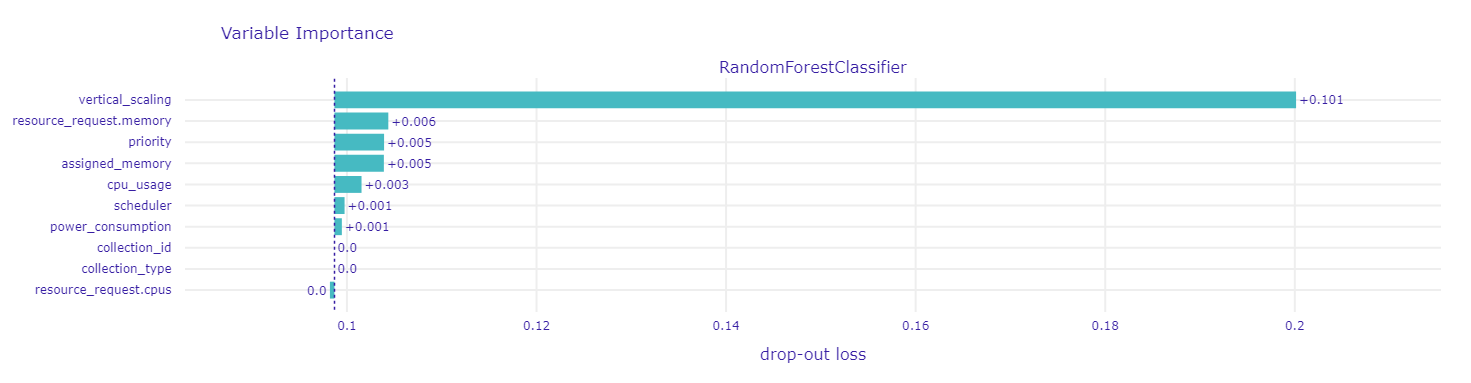

In [158]:
explanation_RF_RUS_test = exp_RF_RUS_test.model_parts()
explanation_RF_RUS_test.result
explanation_RF_RUS_test.plot()

In [159]:
exp_RF_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.244452   
1             0.002460   0.002211          87.245321  0.0  0.244452   
2             0.002460   0.002011          87.223577  0.0  0.244452   
3             0.002460   0.001897          87.211068  0.0  0.244452   
4             0.001410   0.001515          87.169236  0.0  0.506631   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.533615   
99892         0.010422   0.000000          87.000000  1.0  0.244452   
99893         0.002399   0.002175          87.241475  1.0  0.770212   
99894         0.001163   0.003661          87.402178  1.0  0.885228   
99895         0.001163   0.003451          87.379626  1.0  0.885228   

       residuals  abs_residuals                   label    ids  
0      -0.244452       0.244452  RandomForestClassifier      1  
1      -0.244452       0.244452  RandomForestClassifier      2  
2      -0.244452       0.244452  RandomForestClassifier      3  
3      -0.244452       0.244452  RandomForestClassifier      4  
4      -0.506631       0.506631  RandomForestClassifier      5  
...          ...            ...                     ...    ...  
99891   0.466385       0.466385  RandomForestClassifier  99892  
99892   0.755548       0.755548  RandomForestClassifier  99893  
99893   0.229788       0.229788  RandomForestClassifier  99894  
99894   0.114772       0.114772  RandomForestClassifier  99895  
99895   0.114772       0.114772  RandomForestClassifier  99896  

[99896 rows x 16 columns]

##### Gradient Boosting

In [160]:
GB_RUS_train = joblib.load('Jobs/RUS/GradientBoostingClassifier.model')
exp_GB_RUS_train = dx.Explainer(GB_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.549, mean = 3.18e-05, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [161]:
exp_GB_RUS_train.model_performance(model_type = 'classification')

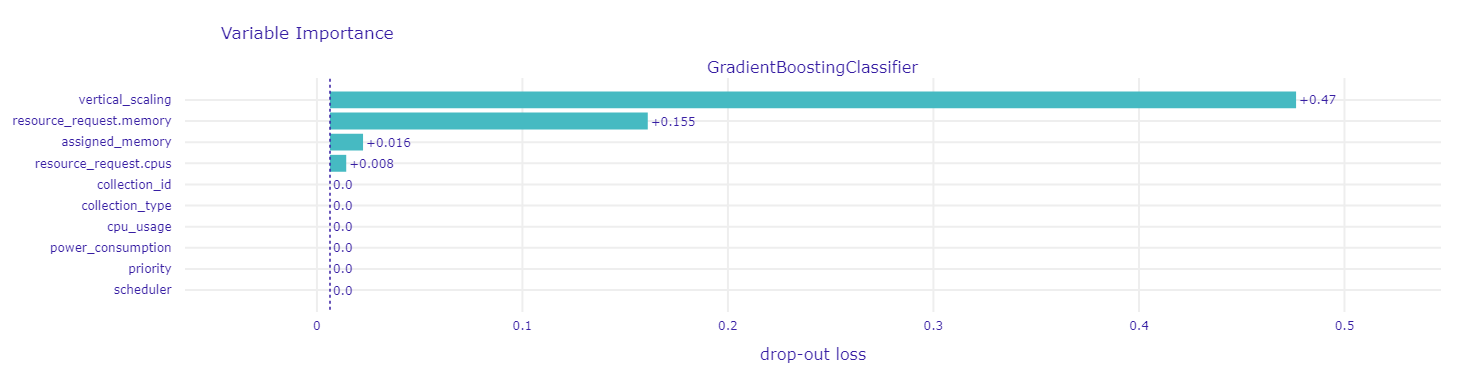

In [162]:
explanation_GB_RUS_train = exp_GB_RUS_train.model_parts()
explanation_GB_RUS_train.result
explanation_GB_RUS_train.plot()

In [163]:
exp_GB_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.450203   
1              0.002460   0.001895          87.210859  0.0  0.450203   
2              0.002460   0.002245          87.249061  0.0  0.450203   
3              0.002460   0.002182          87.242203  0.0  0.450203   
4              0.002460   0.002246          87.249165  0.0  0.450203   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.547897   
233272         0.001163   0.000023          87.002637  1.0  0.547897   
233273         0.002144   0.000040          87.004606  1.0  0.547897   
233274         0.001297   0.003181          87.350552  1.0  0.547897   
233275         0.007812   0.024213          89.491665  1.0  0.549233   

        residuals  abs_residuals                       label     ids  
0       -0.450203       0.450203  GradientBoostingClassifier       1  
1       -0.450203       0.450203  GradientBoostingClassifier       2  
2       -0.450203       0.450203  GradientBoostingClassifier       3  
3       -0.450203       0.450203  GradientBoostingClassifier       4  
4       -0.450203       0.450203  GradientBoostingClassifier       5  
...           ...            ...                         ...     ...  
233271   0.452103       0.452103  GradientBoostingClassifier  233272  
233272   0.452103       0.452103  GradientBoostingClassifier  233273  
233273   0.452103       0.452103  GradientBoostingClassifier  233274  
233274   0.452103       0.452103  GradientBoostingClassifier  233275  
233275   0.450767       0.450767  GradientBoostingClassifier  233276  

[233276 rows x 16 columns]

In [164]:
GB_RUS_test = joblib.load('Jobs/RUS/GradientBoostingClassifier.model')
exp_GB_RUS_test = dx.Explainer(GB_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.55, mean = -1.89e-05, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [165]:
exp_GB_RUS_test.model_performance(model_type = 'classification')

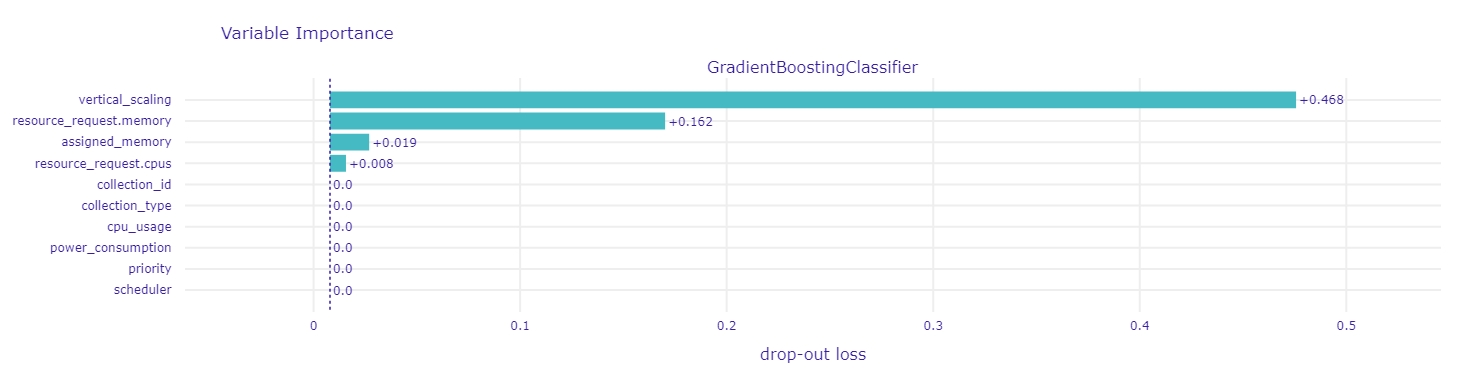

In [166]:
explanation_GB_RUS_test = exp_GB_RUS_test.model_parts()
explanation_GB_RUS_test.result
explanation_GB_RUS_test.plot()

In [167]:
exp_GB_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.450203   
1             0.002460   0.002211          87.245321  0.0  0.450203   
2             0.002460   0.002011          87.223577  0.0  0.450203   
3             0.002460   0.001897          87.211068  0.0  0.450203   
4             0.001410   0.001515          87.169236  0.0  0.450203   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.547897   
99892         0.010422   0.000000          87.000000  1.0  0.549233   
99893         0.002399   0.002175          87.241475  1.0  0.547897   
99894         0.001163   0.003661          87.402178  1.0  0.547897   
99895         0.001163   0.003451          87.379626  1.0  0.547897   

       residuals  abs_residuals                       label    ids  
0      -0.450203       0.450203  GradientBoostingClassifier      1  
1      -0.450203       0.450203  GradientBoostingClassifier      2  
2      -0.450203       0.450203  GradientBoostingClassifier      3  
3      -0.450203       0.450203  GradientBoostingClassifier      4  
4      -0.450203       0.450203  GradientBoostingClassifier      5  
...          ...            ...                         ...    ...  
99891   0.452103       0.452103  GradientBoostingClassifier  99892  
99892   0.450767       0.450767  GradientBoostingClassifier  99893  
99893   0.452103       0.452103  GradientBoostingClassifier  99894  
99894   0.452103       0.452103  GradientBoostingClassifier  99895  
99895   0.452103       0.452103  GradientBoostingClassifier  99896  

[99896 rows x 16 columns]

##### Extreme Gradient Boosting

In [168]:
XGB_RUS_train = joblib.load('Jobs/RUS/XGBClassifier.model')
exp_XGB_RUS_train = dx.Explainer(XGB_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.645
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.645, mean = -2.64e-05, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [169]:
exp_XGB_RUS_train.model_performance(model_type = 'classification')

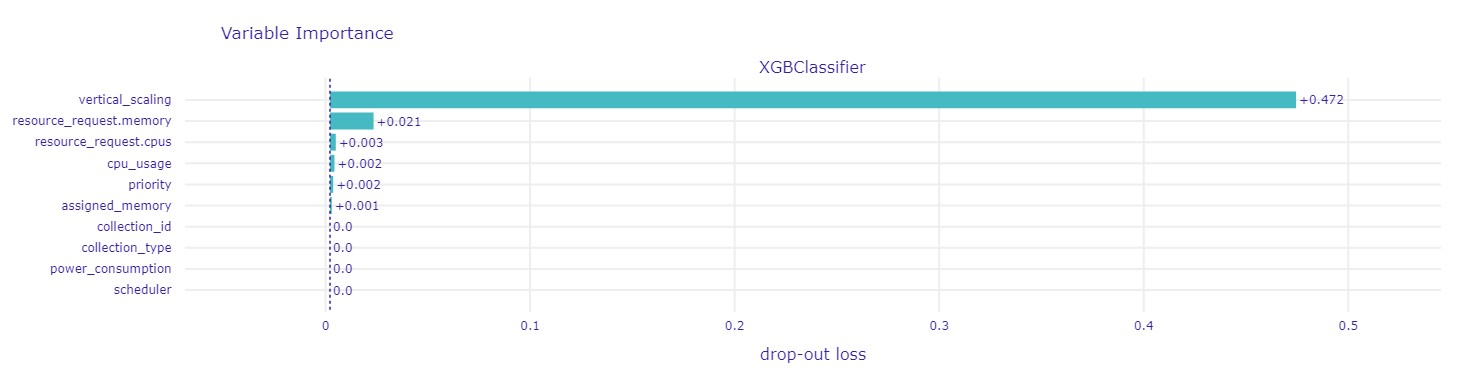

In [170]:
explanation_XGB_RUS_train = exp_XGB_RUS_train.model_parts()
explanation_XGB_RUS_train.result
explanation_XGB_RUS_train.plot()

In [171]:
exp_XGB_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.354380   
1              0.002460   0.001895          87.210859  0.0  0.354380   
2              0.002460   0.002245          87.249061  0.0  0.354380   
3              0.002460   0.002182          87.242203  0.0  0.354380   
4              0.002460   0.002246          87.249165  0.0  0.354380   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.645028   
233272         0.001163   0.000023          87.002637  1.0  0.637022   
233273         0.002144   0.000040          87.004606  1.0  0.637022   
233274         0.001297   0.003181          87.350552  1.0  0.645028   
233275         0.007812   0.024213          89.491665  1.0  0.645191   

        residuals  abs_residuals          label     ids  
0       -0.354380       0.354380  XGBClassifier       1  
1       -0.354380       0.354380  XGBClassifier       2  
2       -0.354380       0.354380  XGBClassifier       3  
3       -0.354380       0.354380  XGBClassifier       4  
4       -0.354380       0.354380  XGBClassifier       5  
...           ...            ...            ...     ...  
233271   0.354972       0.354972  XGBClassifier  233272  
233272   0.362978       0.362978  XGBClassifier  233273  
233273   0.362978       0.362978  XGBClassifier  233274  
233274   0.354972       0.354972  XGBClassifier  233275  
233275   0.354809       0.354809  XGBClassifier  233276  

[233276 rows x 16 columns]

In [172]:
XGB_RUS_test = joblib.load('Jobs/RUS/XGBClassifier.model')
exp_XGB_RUS_test = dx.Explainer(XGB_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.645
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.645, mean = -0.000135, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [173]:
exp_XGB_RUS_test.model_performance(model_type = 'classification')

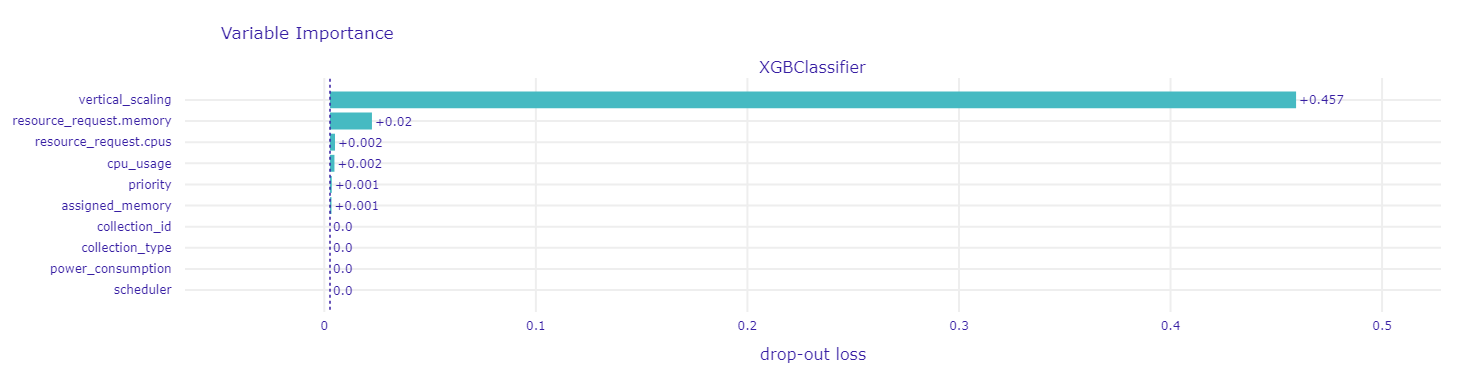

In [174]:
explanation_XGB_RUS_test = exp_XGB_RUS_test.model_parts()
explanation_XGB_RUS_test.result
explanation_XGB_RUS_test.plot()

In [175]:
exp_XGB_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.354380   
1             0.002460   0.002211          87.245321  0.0  0.354380   
2             0.002460   0.002011          87.223577  0.0  0.354380   
3             0.002460   0.001897          87.211068  0.0  0.354380   
4             0.001410   0.001515          87.169236  0.0  0.354380   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.645028   
99892         0.010422   0.000000          87.000000  1.0  0.645191   
99893         0.002399   0.002175          87.241475  1.0  0.645028   
99894         0.001163   0.003661          87.402178  1.0  0.645028   
99895         0.001163   0.003451          87.379626  1.0  0.645028   

       residuals  abs_residuals          label    ids  
0      -0.354380       0.354380  XGBClassifier      1  
1      -0.354380       0.354380  XGBClassifier      2  
2      -0.354380       0.354380  XGBClassifier      3  
3      -0.354380       0.354380  XGBClassifier      4  
4      -0.354380       0.354380  XGBClassifier      5  
...          ...            ...            ...    ...  
99891   0.354972       0.354972  XGBClassifier  99892  
99892   0.354809       0.354809  XGBClassifier  99893  
99893   0.354972       0.354972  XGBClassifier  99894  
99894   0.354972       0.354972  XGBClassifier  99895  
99895   0.354972       0.354972  XGBClassifier  99896  

[99896 rows x 16 columns]

#### With Imbalanced Handling - Using ROS

##### Logistic Regression

In [176]:
LR_ROS_train = joblib.load('Jobs/ROS/LogReg.model')
exp_LR_ROS_train = dx.Explainer(LR_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 8.69e-06, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.000268, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [177]:
exp_LR_ROS_train.model_performance(model_type = 'classification')

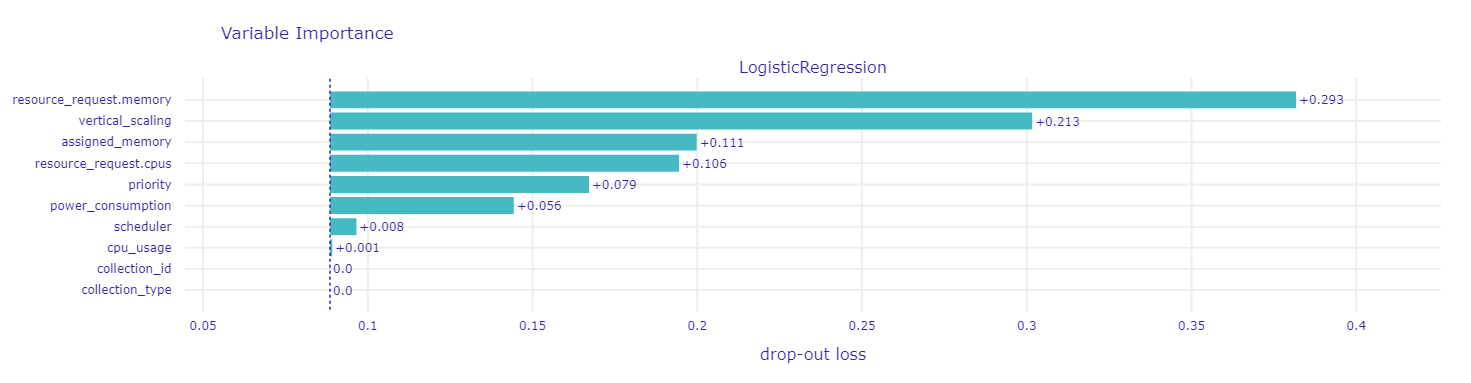

In [178]:
explanation_LR_ROS_train = exp_LR_ROS_train.model_parts()
explanation_LR_ROS_train.result
explanation_LR_ROS_train.plot()

In [179]:
exp_LR_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals               label      ids  
0        0.012972  -0.012972       0.012972  LogisticRegression        1  
1        0.944271   0.055729       0.055729  LogisticRegression        2  
2        0.128311  -0.128311       0.128311  LogisticRegression        3  
3        0.128326  -0.128326       0.128326  LogisticRegression        4  
4        0.602842  -0.602842       0.602842  LogisticRegression        5  
...           ...        ...            ...                 ...      ...  
1166719  0.946965   0.053035       0.053035  LogisticRegression  1166720  
1166720  0.946932   0.053068       0.053068  LogisticRegression  1166721  
1166721  0.944179   0.055821       0.055821  LogisticRegression  1166722  
1166722  0.944173   0.055827       0.055827  LogisticRegression  1166723  
1166723  0.949423   0.050577       0.050577  LogisticRegression  1166724  

[1166724 rows x 16 columns]

In [180]:
LR_ROS_test = joblib.load('Jobs/ROS/LogReg.model')
exp_LR_ROS_test = dx.Explainer(LR_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.5e-05, mean = 0.499, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.00071, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [181]:
exp_LR_ROS_test.model_performance(model_type = 'classification')

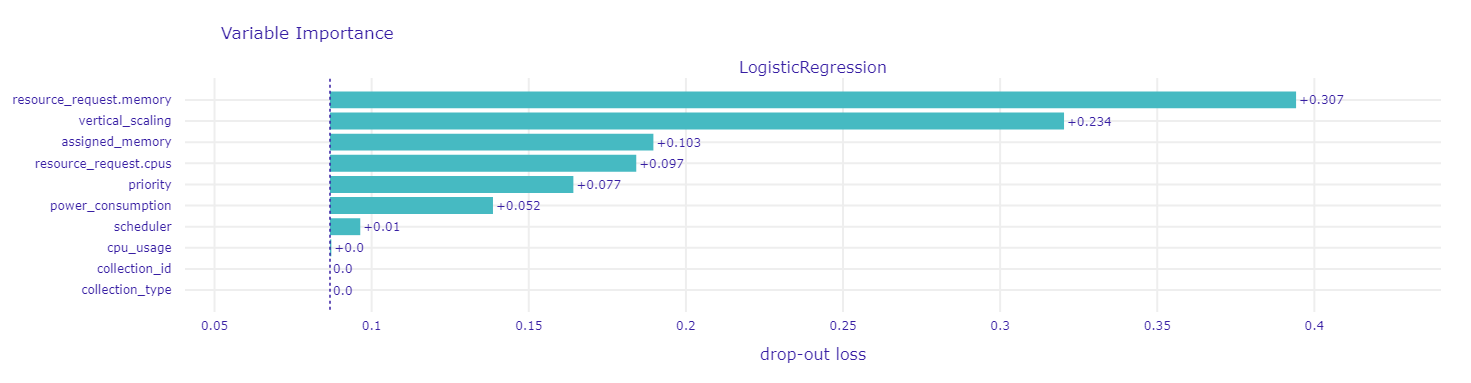

In [182]:
explanation_LR_ROS_test = exp_LR_ROS_test.model_parts()
explanation_LR_ROS_test.result
explanation_LR_ROS_test.plot()

In [183]:
exp_LR_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.236000   
1              0.010422  5.584717e-03          87.607161  1.0  0.192282   
2              0.002460  2.060890e-03          87.228992  0.0  0.128317   
3              0.013779  4.572754e-01         120.649518  0.0  0.015910   
4              0.005600  9.536743e-07          87.000110  0.0  0.682992   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.595939   
500100         0.010422  1.984596e-03          87.220660  1.0  0.236556   
500101         0.001163  4.131317e-03          87.452567  1.0  0.946724   
500102         0.001942  0.000000e+00          87.000000  1.0  0.504437   
500103         0.001942  7.438660e-05          87.008533  1.0  0.503889   

        residuals  abs_residuals               label     ids  
0        0.764000       0.764000  LogisticRegression       1  
1        0.807718       0.807718  LogisticRegression       2  
2       -0.128317       0.128317  LogisticRegression       3  
3       -0.015910       0.015910  LogisticRegression       4  
4       -0.682992       0.682992  LogisticRegression       5  
...           ...            ...                 ...     ...  
500099   0.404061       0.404061  LogisticRegression  500100  
500100   0.763444       0.763444  LogisticRegression  500101  
500101   0.053276       0.053276  LogisticRegression  500102  
500102   0.495563       0.495563  LogisticRegression  500103  
500103   0.496111       0.496111  LogisticRegression  500104  

[500104 rows x 16 columns]

##### Decision Tree

In [184]:
DT_ROS_train = joblib.load('Jobs/ROS/DecisionTreeClassifier.model')
exp_DT_ROS_train = dx.Explainer(DT_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.5, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = -8.75e-06, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [185]:
exp_DT_ROS_train.model_performance(model_type = 'classification')

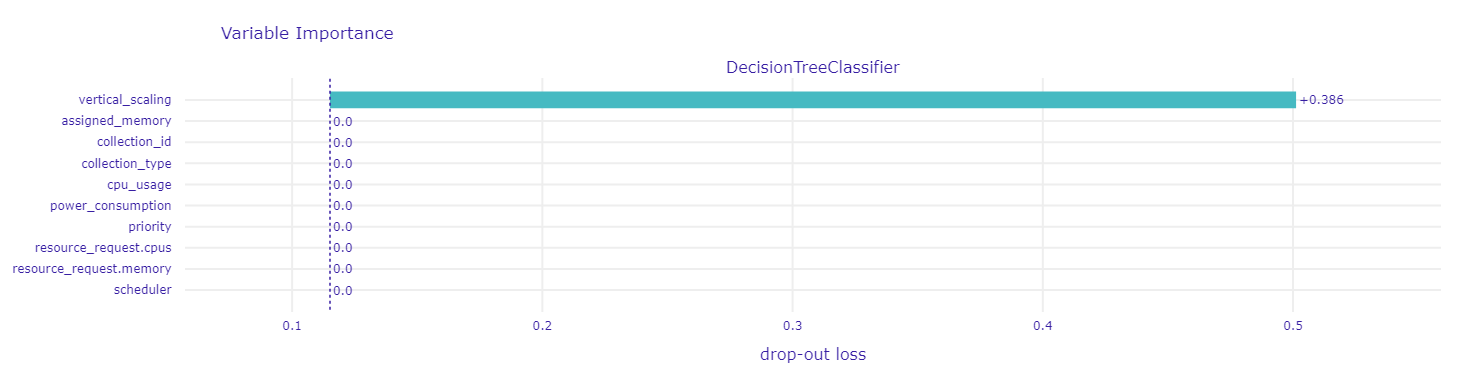

In [186]:
explanation_DT_ROS_train = exp_DT_ROS_train.model_parts()
explanation_DT_ROS_train.result
explanation_DT_ROS_train.plot()

In [187]:
exp_DT_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals                   label      ids  
0        0.169915  -0.169915       0.169915  DecisionTreeClassifier        1  
1        0.969175   0.030825       0.030825  DecisionTreeClassifier        2  
2        0.169915  -0.169915       0.169915  DecisionTreeClassifier        3  
3        0.169915  -0.169915       0.169915  DecisionTreeClassifier        4  
4        0.169915  -0.169915       0.169915  DecisionTreeClassifier        5  
...           ...        ...            ...                     ...      ...  
1166719  0.969175   0.030825       0.030825  DecisionTreeClassifier  1166720  
1166720  0.969175   0.030825       0.030825  DecisionTreeClassifier  1166721  
1166721  0.969175   0.030825       0.030825  DecisionTreeClassifier  1166722  
1166722  0.969175   0.030825       0.030825  DecisionTreeClassifier  1166723  
1166723  0.969175   0.030825       0.030825  DecisionTreeClassifier  1166724  

[1166724 rows x 16 columns]

In [188]:
DT_ROS_test = joblib.load('Jobs/ROS/DecisionTreeClassifier.model')
exp_DT_ROS_test = dx.Explainer(DT_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.498, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = 0.00156, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [189]:
exp_DT_ROS_test.model_performance(model_type = 'classification')

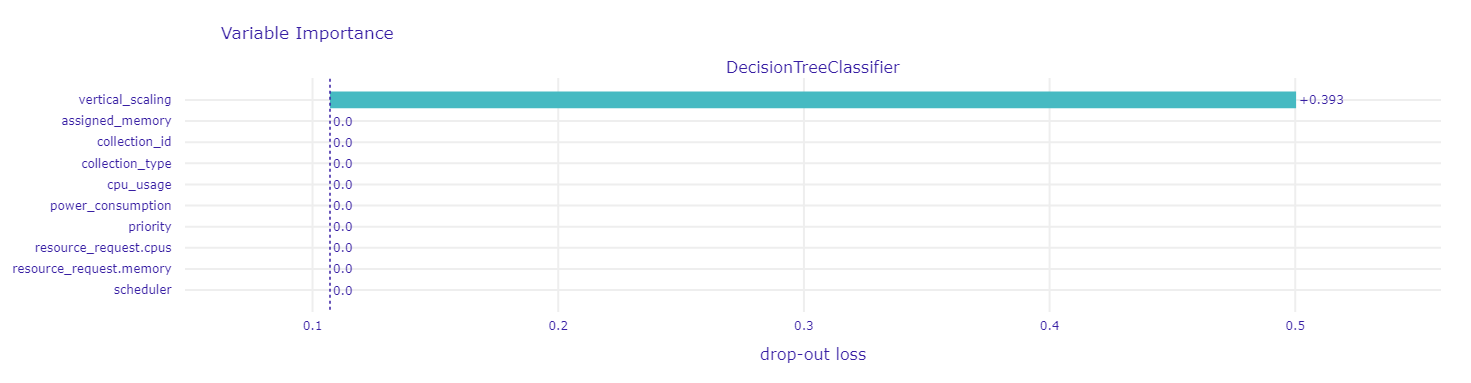

In [190]:
explanation_DT_ROS_test = exp_DT_ROS_test.model_parts()
explanation_DT_ROS_test.result
explanation_DT_ROS_test.plot()

In [191]:
exp_DT_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.169915   
1              0.010422  5.584717e-03          87.607161  1.0  0.169915   
2              0.002460  2.060890e-03          87.228992  0.0  0.169915   
3              0.013779  4.572754e-01         120.649518  0.0  0.169915   
4              0.005600  9.536743e-07          87.000110  0.0  0.169915   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.969175   
500100         0.010422  1.984596e-03          87.220660  1.0  0.169915   
500101         0.001163  4.131317e-03          87.452567  1.0  0.969175   
500102         0.001942  0.000000e+00          87.000000  1.0  0.969175   
500103         0.001942  7.438660e-05          87.008533  1.0  0.969175   

        residuals  abs_residuals                   label     ids  
0        0.830085       0.830085  DecisionTreeClassifier       1  
1        0.830085       0.830085  DecisionTreeClassifier       2  
2       -0.169915       0.169915  DecisionTreeClassifier       3  
3       -0.169915       0.169915  DecisionTreeClassifier       4  
4       -0.169915       0.169915  DecisionTreeClassifier       5  
...           ...            ...                     ...     ...  
500099   0.030825       0.030825  DecisionTreeClassifier  500100  
500100   0.830085       0.830085  DecisionTreeClassifier  500101  
500101   0.030825       0.030825  DecisionTreeClassifier  500102  
500102   0.030825       0.030825  DecisionTreeClassifier  500103  
500103   0.030825       0.030825  DecisionTreeClassifier  500104  

[500104 rows x 16 columns]

##### Random Forest

In [192]:
RF_ROS_train = joblib.load('Jobs/ROS/RandomForestClassifier.model')
exp_RF_ROS_train = dx.Explainer(RF_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.244, mean = 0.5, max = 0.898
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.898, mean = 7.97e-06, max = 0.756
  -> model_info        : package sklearn

A new explainer has been created!


In [193]:
exp_RF_ROS_train.model_performance(model_type = 'classification')

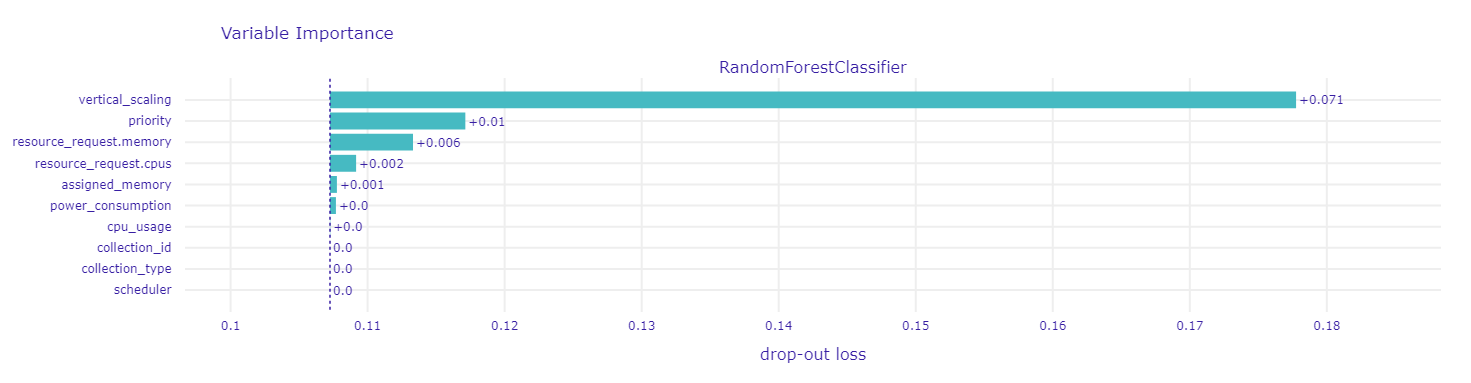

In [194]:
explanation_RF_ROS_train = exp_RF_ROS_train.model_parts()
explanation_RF_ROS_train.result
explanation_RF_ROS_train.plot()

In [195]:
exp_RF_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals                   label      ids  
0        0.264266  -0.264266       0.264266  RandomForestClassifier        1  
1        0.897927   0.102073       0.102073  RandomForestClassifier        2  
2        0.244402  -0.244402       0.244402  RandomForestClassifier        3  
3        0.244402  -0.244402       0.244402  RandomForestClassifier        4  
4        0.264266  -0.264266       0.264266  RandomForestClassifier        5  
...           ...        ...            ...                     ...      ...  
1166719  0.897927   0.102073       0.102073  RandomForestClassifier  1166720  
1166720  0.897927   0.102073       0.102073  RandomForestClassifier  1166721  
1166721  0.897927   0.102073       0.102073  RandomForestClassifier  1166722  
1166722  0.897927   0.102073       0.102073  RandomForestClassifier  1166723  
1166723  0.897927   0.102073       0.102073  RandomForestClassifier  1166724  

[1166724 rows x 16 columns]

In [196]:
RF_ROS_test = joblib.load('Jobs/ROS/RandomForestClassifier.model')
exp_RF_ROS_test = dx.Explainer(RF_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.244, mean = 0.499, max = 0.898
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.898, mean = 0.000929, max = 0.756
  -> model_info        : package sklearn

A new explainer has been created!


In [197]:
exp_RF_ROS_test.model_performance(model_type = 'classification')

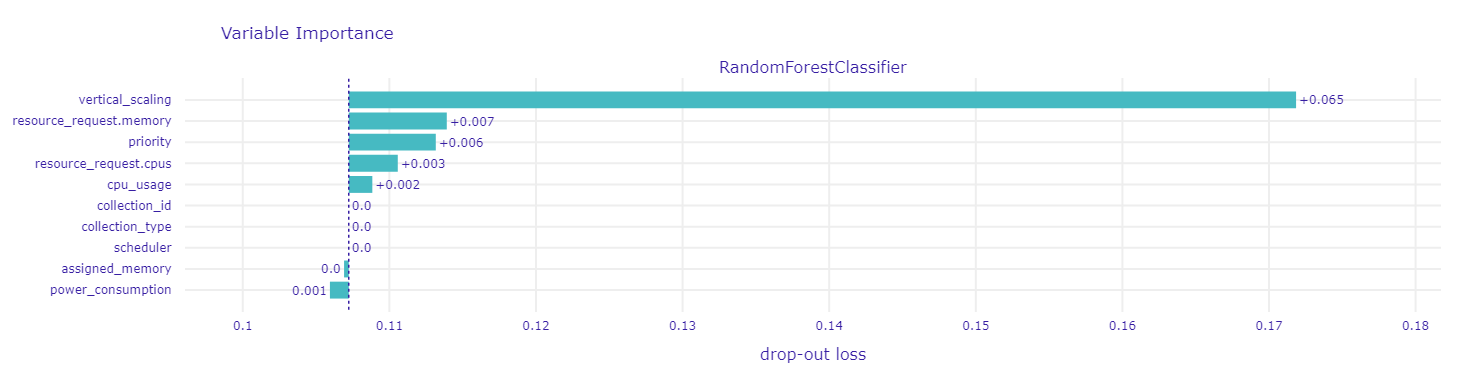

In [198]:
explanation_LR_ROS_test = exp_RF_ROS_test.model_parts()
explanation_LR_ROS_test.result
explanation_LR_ROS_test.plot()

In [199]:
exp_RF_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.244402   
1              0.010422  5.584717e-03          87.607161  1.0  0.264266   
2              0.002460  2.060890e-03          87.228992  0.0  0.244402   
3              0.013779  4.572754e-01         120.649518  0.0  0.264266   
4              0.005600  9.536743e-07          87.000110  0.0  0.244402   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.773603   
500100         0.010422  1.984596e-03          87.220660  1.0  0.244402   
500101         0.001163  4.131317e-03          87.452567  1.0  0.897927   
500102         0.001942  0.000000e+00          87.000000  1.0  0.821830   
500103         0.001942  7.438660e-05          87.008533  1.0  0.821830   

        residuals  abs_residuals                   label     ids  
0        0.755598       0.755598  RandomForestClassifier       1  
1        0.735734       0.735734  RandomForestClassifier       2  
2       -0.244402       0.244402  RandomForestClassifier       3  
3       -0.264266       0.264266  RandomForestClassifier       4  
4       -0.244402       0.244402  RandomForestClassifier       5  
...           ...            ...                     ...     ...  
500099   0.226397       0.226397  RandomForestClassifier  500100  
500100   0.755598       0.755598  RandomForestClassifier  500101  
500101   0.102073       0.102073  RandomForestClassifier  500102  
500102   0.178170       0.178170  RandomForestClassifier  500103  
500103   0.178170       0.178170  RandomForestClassifier  500104  

[500104 rows x 16 columns]

##### Gradient Boosting

In [200]:
GB_ROS_train = joblib.load('Jobs/ROS/GradientBoostingClassifier.model')
exp_GB_ROS_train = dx.Explainer(GB_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.549, mean = -2.61e-06, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [201]:
exp_GB_ROS_train.model_performance(model_type = 'classification')

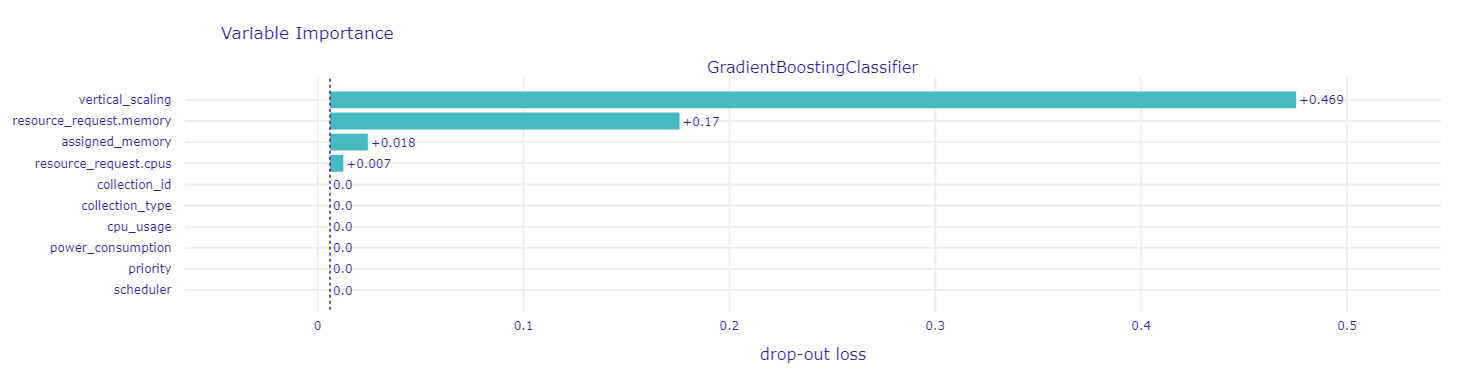

In [202]:
explanation_GB_ROS_train = exp_GB_ROS_train.model_parts()
explanation_GB_ROS_train.result
explanation_GB_ROS_train.plot()

In [203]:
exp_GB_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals                       label  \
0        0.450204  -0.450204       0.450204  GradientBoostingClassifier   
1        0.547882   0.452118       0.452118  GradientBoostingClassifier   
2        0.450204  -0.450204       0.450204  GradientBoostingClassifier   
3        0.450204  -0.450204       0.450204  GradientBoostingClassifier   
4        0.450204  -0.450204       0.450204  GradientBoostingClassifier   
...           ...        ...            ...                         ...   
1166719  0.547882   0.452118       0.452118  GradientBoostingClassifier   
1166720  0.547882   0.452118       0.452118  GradientBoostingClassifier   
1166721  0.547882   0.452118       0.452118  GradientBoostingClassifier   
1166722  0.547882   0.452118       0.452118  GradientBoostingClassifier   
1166723  0.547882   0.452118       0.452118  GradientBoostingClassifier   

             ids  
0              1  
1              2  
2              3  
3              4  
4              5  
...          ...  
1166719  1166720  
1166720  1166721  
1166721  1166722  
1166722  1166723  
1166723  1166724  

[1166724 rows x 16 columns]

In [204]:
GB_ROS_test = joblib.load('Jobs/ROS/GradientBoostingClassifier.model')
exp_GB_ROS_test = dx.Explainer(GB_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.549, mean = 5.81e-06, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [205]:
exp_GB_ROS_test.model_performance(model_type = 'classification')

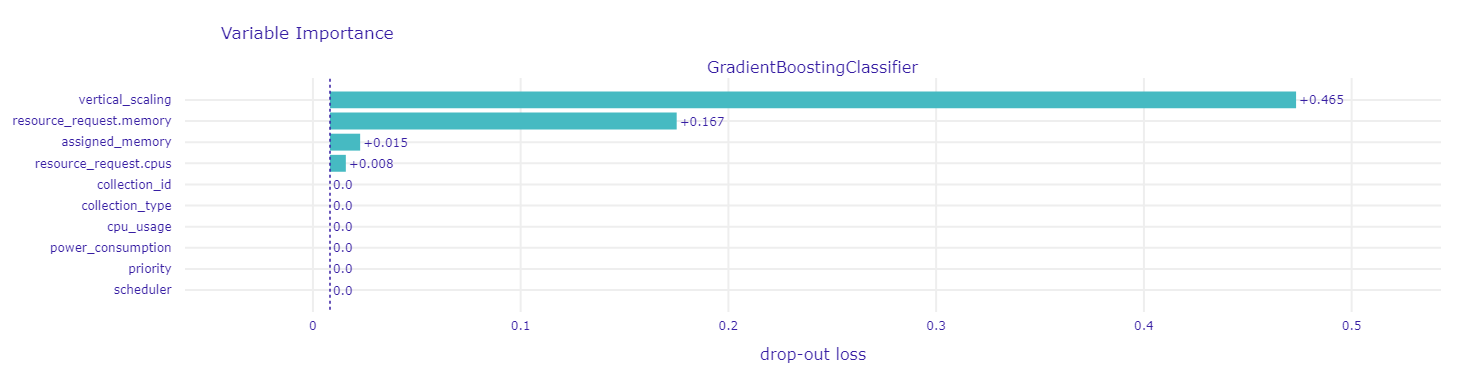

In [206]:
explanation_GB_ROS_test = exp_GB_ROS_test.model_parts()
explanation_GB_ROS_test.result
explanation_GB_ROS_test.plot()

In [207]:
exp_GB_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.549214   
1              0.010422  5.584717e-03          87.607161  1.0  0.549214   
2              0.002460  2.060890e-03          87.228992  0.0  0.450204   
3              0.013779  4.572754e-01         120.649518  0.0  0.450204   
4              0.005600  9.536743e-07          87.000110  0.0  0.450204   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.547882   
500100         0.010422  1.984596e-03          87.220660  1.0  0.549214   
500101         0.001163  4.131317e-03          87.452567  1.0  0.547882   
500102         0.001942  0.000000e+00          87.000000  1.0  0.547882   
500103         0.001942  7.438660e-05          87.008533  1.0  0.547882   

        residuals  abs_residuals                       label     ids  
0        0.450786       0.450786  GradientBoostingClassifier       1  
1        0.450786       0.450786  GradientBoostingClassifier       2  
2       -0.450204       0.450204  GradientBoostingClassifier       3  
3       -0.450204       0.450204  GradientBoostingClassifier       4  
4       -0.450204       0.450204  GradientBoostingClassifier       5  
...           ...            ...                         ...     ...  
500099   0.452118       0.452118  GradientBoostingClassifier  500100  
500100   0.450786       0.450786  GradientBoostingClassifier  500101  
500101   0.452118       0.452118  GradientBoostingClassifier  500102  
500102   0.452118       0.452118  GradientBoostingClassifier  500103  
500103   0.452118       0.452118  GradientBoostingClassifier  500104  

[500104 rows x 16 columns]

##### Extreme Gradient Boosting

In [208]:
XGB_ROS_train = joblib.load('Jobs/ROS/XGBClassifier.model')
exp_XGB_ROS_train = dx.Explainer(XGB_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -7.61e-05, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [209]:
exp_XGB_ROS_train.model_performance(model_type = 'classification')

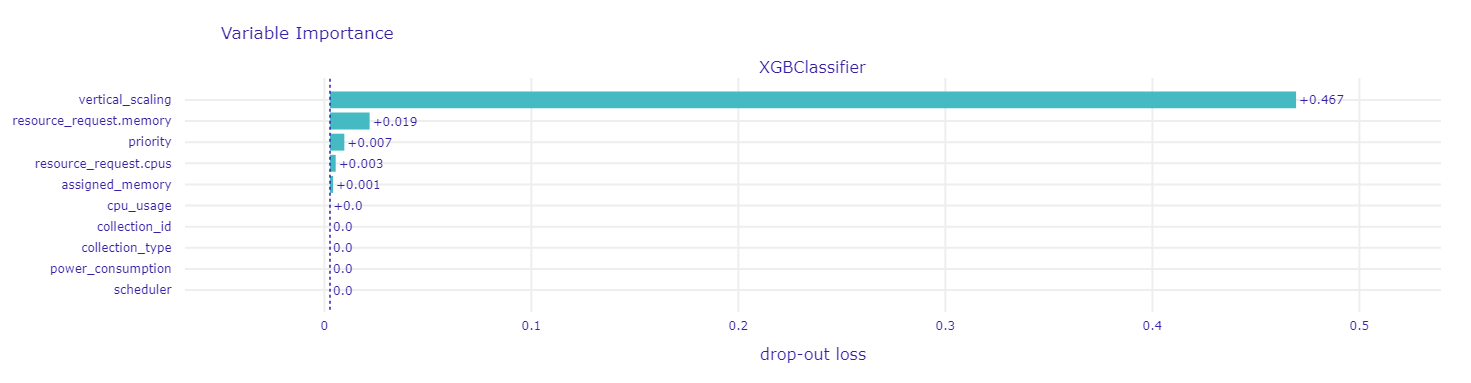

In [210]:
explanation_XGB_ROS_train = exp_XGB_ROS_train.model_parts()
explanation_XGB_ROS_train.result
explanation_XGB_ROS_train.plot()

In [211]:
exp_XGB_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals          label      ids  
0        0.354381  -0.354381       0.354381  XGBClassifier        1  
1        0.645507   0.354493       0.354493  XGBClassifier        2  
2        0.354381  -0.354381       0.354381  XGBClassifier        3  
3        0.354381  -0.354381       0.354381  XGBClassifier        4  
4        0.354381  -0.354381       0.354381  XGBClassifier        5  
...           ...        ...            ...            ...      ...  
1166719  0.645507   0.354493       0.354493  XGBClassifier  1166720  
1166720  0.645507   0.354493       0.354493  XGBClassifier  1166721  
1166721  0.645507   0.354493       0.354493  XGBClassifier  1166722  
1166722  0.645507   0.354493       0.354493  XGBClassifier  1166723  
1166723  0.645507   0.354493       0.354493  XGBClassifier  1166724  

[1166724 rows x 16 columns]

In [212]:
XGB_ROS_test = joblib.load('Jobs/ROS/XGBClassifier.model')
exp_XGB_ROS_test = dx.Explainer(XGB_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -6.69e-05, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [213]:
exp_XGB_ROS_test.model_performance(model_type = 'classification')

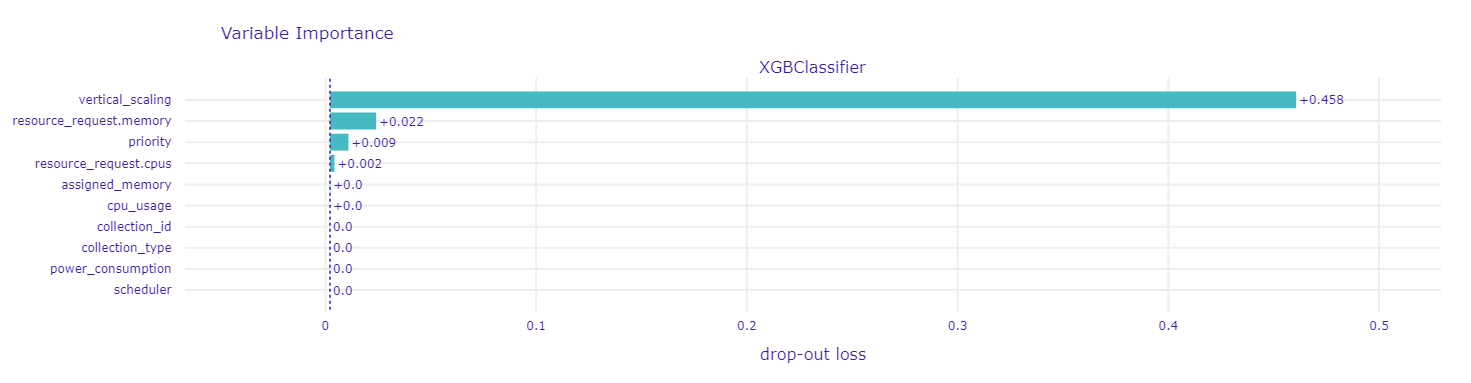

In [214]:
explanation_XGB_ROS_test = exp_XGB_ROS_test.model_parts()
explanation_XGB_ROS_test.result
explanation_XGB_ROS_test.plot()

In [215]:
exp_XGB_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.645652   
1              0.010422  5.584717e-03          87.607161  1.0  0.645652   
2              0.002460  2.060890e-03          87.228992  0.0  0.354381   
3              0.013779  4.572754e-01         120.649518  0.0  0.354381   
4              0.005600  9.536743e-07          87.000110  0.0  0.354381   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.637646   
500100         0.010422  1.984596e-03          87.220660  1.0  0.645652   
500101         0.001163  4.131317e-03          87.452567  1.0  0.645507   
500102         0.001942  0.000000e+00          87.000000  1.0  0.637646   
500103         0.001942  7.438660e-05          87.008533  1.0  0.637646   

        residuals  abs_residuals          label     ids  
0        0.354348       0.354348  XGBClassifier       1  
1        0.354348       0.354348  XGBClassifier       2  
2       -0.354381       0.354381  XGBClassifier       3  
3       -0.354381       0.354381  XGBClassifier       4  
4       -0.354381       0.354381  XGBClassifier       5  
...           ...            ...            ...     ...  
500099   0.362354       0.362354  XGBClassifier  500100  
500100   0.354348       0.354348  XGBClassifier  500101  
500101   0.354493       0.354493  XGBClassifier  500102  
500102   0.362354       0.362354  XGBClassifier  500103  
500103   0.362354       0.362354  XGBClassifier  500104  

[500104 rows x 16 columns]

#### With Imbalanced Handling - Using SMOTE

##### Logistic Regression

In [216]:
LR_SMOTE_train = joblib.load('Jobs/SMOTE/LogReg.model')
exp_LR_SMOTE_train = dx.Explainer(LR_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.46e-06, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -9.71e-05, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [217]:
exp_LR_SMOTE_train.model_performance(model_type = 'classification')

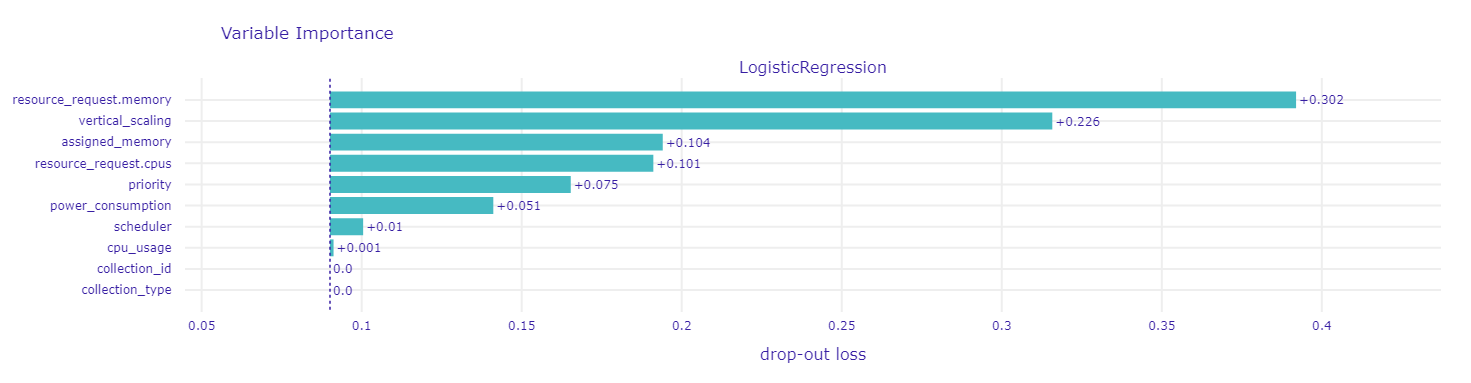

In [218]:
explanation_LR_SMOTE_train = exp_LR_SMOTE_train.model_parts()
explanation_LR_SMOTE_train.result
explanation_LR_SMOTE_train.plot()

In [219]:
exp_LR_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals               label      ids  
0        0.013615  -0.013615       0.013615  LogisticRegression        1  
1        0.945599   0.054401       0.054401  LogisticRegression        2  
2        0.128128  -0.128128       0.128128  LogisticRegression        3  
3        0.128143  -0.128143       0.128143  LogisticRegression        4  
4        0.604472  -0.604472       0.604472  LogisticRegression        5  
...           ...        ...            ...                 ...      ...  
1166719  0.235156   0.764844       0.764844  LogisticRegression  1166720  
1166720  0.235095   0.764905       0.764905  LogisticRegression  1166721  
1166721  0.948940   0.051060       0.051060  LogisticRegression  1166722  
1166722  0.938535   0.061465       0.061465  LogisticRegression  1166723  
1166723  0.946539   0.053461       0.053461  LogisticRegression  1166724  

[1166724 rows x 16 columns]

In [220]:
LR_SMOTE_test = joblib.load('Jobs/SMOTE/LogReg.model')
exp_LR_SMOTE_test = dx.Explainer(LR_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.73e-05, mean = 0.499, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.000517, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [221]:
exp_LR_SMOTE_test.model_performance(model_type = 'classification')

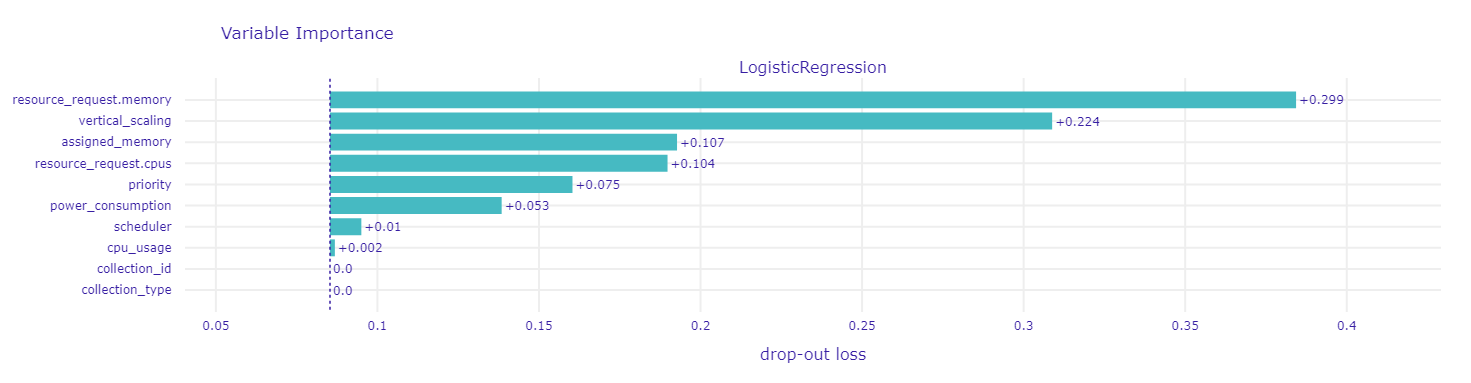

In [222]:
explanation_LR_SMOTE_test = exp_LR_SMOTE_test.model_parts()
explanation_LR_SMOTE_test.result
explanation_LR_SMOTE_test.plot()

In [223]:
exp_LR_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.236080   
1              0.010422  5.584717e-03          87.607161  1.0  0.197364   
2              0.002460  2.060890e-03          87.228992  0.0  0.128134   
3              0.013779  4.572754e-01         120.649518  0.0  0.016555   
4              0.005600  9.536743e-07          87.000110  0.0  0.683163   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.946443   
500100         0.003754  3.694534e-03          87.405762  1.0  0.995732   
500101         0.001163  3.962517e-03          87.434499  1.0  0.946564   
500102         0.001163  3.477097e-03          87.382396  1.0  0.948870   
500103         0.010422  2.233505e-03          87.247814  1.0  0.235358   

        residuals  abs_residuals               label     ids  
0        0.763920       0.763920  LogisticRegression       1  
1        0.802636       0.802636  LogisticRegression       2  
2       -0.128134       0.128134  LogisticRegression       3  
3       -0.016555       0.016555  LogisticRegression       4  
4       -0.683163       0.683163  LogisticRegression       5  
...           ...            ...                 ...     ...  
500099   0.053557       0.053557  LogisticRegression  500100  
500100   0.004268       0.004268  LogisticRegression  500101  
500101   0.053436       0.053436  LogisticRegression  500102  
500102   0.051130       0.051130  LogisticRegression  500103  
500103   0.764642       0.764642  LogisticRegression  500104  

[500104 rows x 16 columns]

##### Decision Tree

In [224]:
DT_SMOTE_train = joblib.load('Jobs/SMOTE/DecisionTreeClassifier.model')
exp_DT_SMOTE_train = dx.Explainer(DT_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.5, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = -0.0003, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [225]:
exp_DT_SMOTE_train.model_performance(model_type = 'classification')

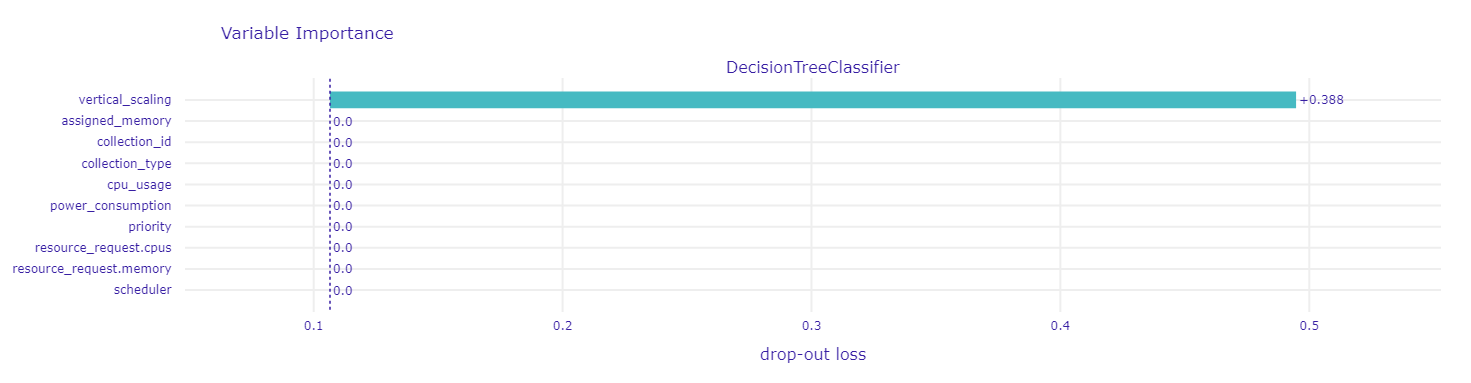

In [226]:
explanation_DT_SMOTE_train = exp_DT_SMOTE_train.model_parts()
explanation_DT_SMOTE_train.result
explanation_DT_SMOTE_train.plot()

In [227]:
exp_DT_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals                   label      ids  
0        0.170375  -0.170375       0.170375  DecisionTreeClassifier        1  
1        0.969150   0.030850       0.030850  DecisionTreeClassifier        2  
2        0.170375  -0.170375       0.170375  DecisionTreeClassifier        3  
3        0.170375  -0.170375       0.170375  DecisionTreeClassifier        4  
4        0.170375  -0.170375       0.170375  DecisionTreeClassifier        5  
...           ...        ...            ...                     ...      ...  
1166719  0.170375   0.829625       0.829625  DecisionTreeClassifier  1166720  
1166720  0.170375   0.829625       0.829625  DecisionTreeClassifier  1166721  
1166721  0.969150   0.030850       0.030850  DecisionTreeClassifier  1166722  
1166722  0.969150   0.030850       0.030850  DecisionTreeClassifier  1166723  
1166723  0.969150   0.030850       0.030850  DecisionTreeClassifier  1166724  

[1166724 rows x 16 columns]

In [228]:
DT_SMOTE_test = joblib.load('Jobs/SMOTE/DecisionTreeClassifier.model')
exp_DT_SMOTE_test = dx.Explainer(DT_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.17, mean = 0.499, max = 0.969
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.969, mean = 0.00142, max = 0.83
  -> model_info        : package sklearn

A new explainer has been created!


In [229]:
exp_DT_SMOTE_test.model_performance(model_type = 'classification')

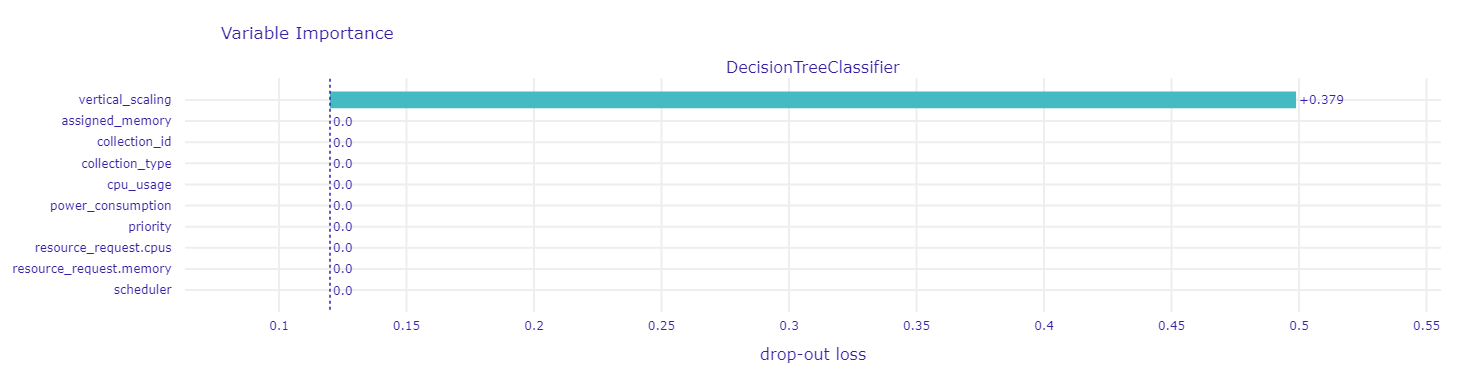

In [230]:
explanation_DT_SMOTE_test = exp_DT_SMOTE_test.model_parts()
explanation_DT_SMOTE_test.result
explanation_DT_SMOTE_test.plot()

In [231]:
exp_DT_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.170375   
1              0.010422  5.584717e-03          87.607161  1.0  0.170375   
2              0.002460  2.060890e-03          87.228992  0.0  0.170375   
3              0.013779  4.572754e-01         120.649518  0.0  0.170375   
4              0.005600  9.536743e-07          87.000110  0.0  0.170375   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.969150   
500100         0.003754  3.694534e-03          87.405762  1.0  0.969150   
500101         0.001163  3.962517e-03          87.434499  1.0  0.969150   
500102         0.001163  3.477097e-03          87.382396  1.0  0.969150   
500103         0.010422  2.233505e-03          87.247814  1.0  0.170375   

        residuals  abs_residuals                   label     ids  
0        0.829625       0.829625  DecisionTreeClassifier       1  
1        0.829625       0.829625  DecisionTreeClassifier       2  
2       -0.170375       0.170375  DecisionTreeClassifier       3  
3       -0.170375       0.170375  DecisionTreeClassifier       4  
4       -0.170375       0.170375  DecisionTreeClassifier       5  
...           ...            ...                     ...     ...  
500099   0.030850       0.030850  DecisionTreeClassifier  500100  
500100   0.030850       0.030850  DecisionTreeClassifier  500101  
500101   0.030850       0.030850  DecisionTreeClassifier  500102  
500102   0.030850       0.030850  DecisionTreeClassifier  500103  
500103   0.829625       0.829625  DecisionTreeClassifier  500104  

[500104 rows x 16 columns]

##### Random Forest

In [232]:
RF_SMOTE_train = joblib.load('Jobs/SMOTE/RandomForestClassifier.model')
exp_RF_SMOTE_train = dx.Explainer(RF_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.237, mean = 0.5, max = 0.893
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.893, mean = -0.00022, max = 0.76
  -> model_info        : package sklearn

A new explainer has been created!


In [233]:
exp_RF_SMOTE_train.model_performance(model_type = 'classification')

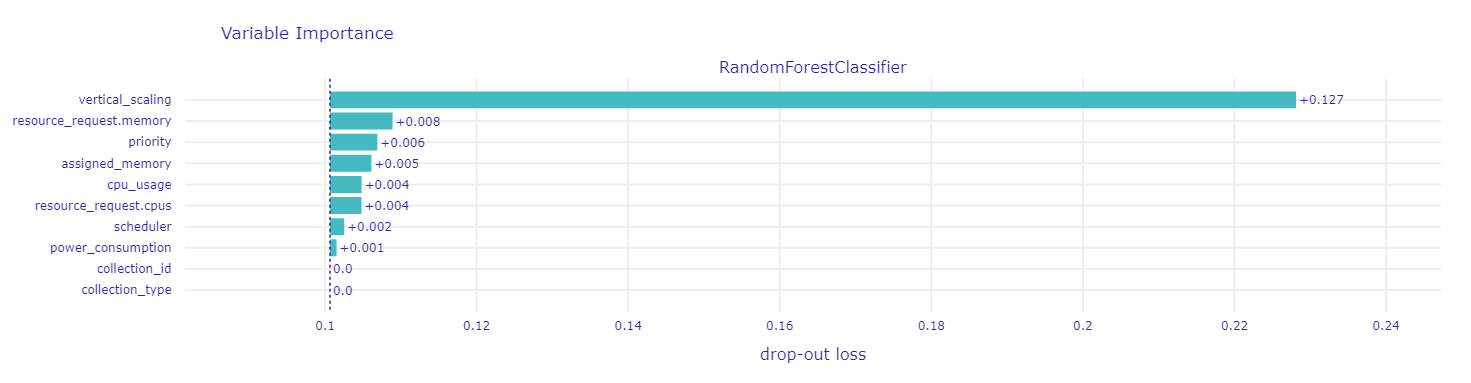

In [234]:
explanation_RF_SMOTE_train = exp_RF_SMOTE_train.model_parts()
explanation_RF_SMOTE_train.result
explanation_RF_SMOTE_train.plot()

In [235]:
exp_RF_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals                   label      ids  
0        0.263425  -0.263425       0.263425  RandomForestClassifier        1  
1        0.892776   0.107224       0.107224  RandomForestClassifier        2  
2        0.239834  -0.239834       0.239834  RandomForestClassifier        3  
3        0.239834  -0.239834       0.239834  RandomForestClassifier        4  
4        0.263425  -0.263425       0.263425  RandomForestClassifier        5  
...           ...        ...            ...                     ...      ...  
1166719  0.239834   0.760166       0.760166  RandomForestClassifier  1166720  
1166720  0.239834   0.760166       0.760166  RandomForestClassifier  1166721  
1166721  0.892776   0.107224       0.107224  RandomForestClassifier  1166722  
1166722  0.803908   0.196092       0.196092  RandomForestClassifier  1166723  
1166723  0.892776   0.107224       0.107224  RandomForestClassifier  1166724  

[1166724 rows x 16 columns]

In [236]:
RF_SMOTE_test = joblib.load('Jobs/SMOTE/RandomForestClassifier.model')
exp_RF_SMOTE_test = dx.Explainer(RF_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.237, mean = 0.499, max = 0.893
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.893, mean = 0.000811, max = 0.76
  -> model_info        : package sklearn

A new explainer has been created!


In [237]:
exp_RF_SMOTE_test.model_performance(model_type = 'classification')

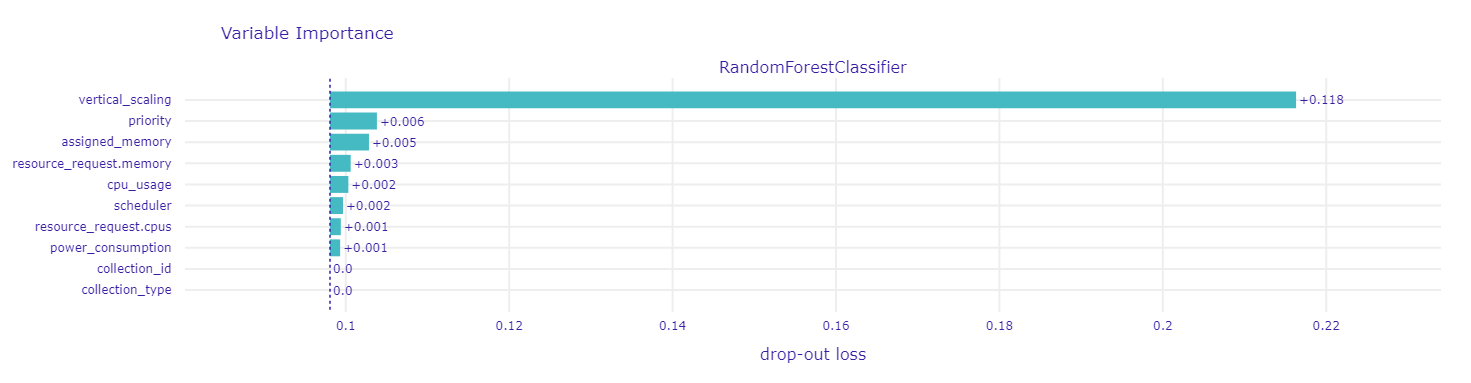

In [238]:
explanation_RF_SMOTE_test = exp_RF_SMOTE_test.model_parts()
explanation_RF_SMOTE_test.result
explanation_RF_SMOTE_test.plot()

In [239]:
exp_RF_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.239834   
1              0.010422  5.584717e-03          87.607161  1.0  0.263425   
2              0.002460  2.060890e-03          87.228992  0.0  0.239834   
3              0.013779  4.572754e-01         120.649518  0.0  0.263425   
4              0.005600  9.536743e-07          87.000110  0.0  0.239834   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.892776   
500100         0.003754  3.694534e-03          87.405762  1.0  0.699127   
500101         0.001163  3.962517e-03          87.434499  1.0  0.892776   
500102         0.001163  3.477097e-03          87.382396  1.0  0.892776   
500103         0.010422  2.233505e-03          87.247814  1.0  0.239834   

        residuals  abs_residuals                   label     ids  
0        0.760166       0.760166  RandomForestClassifier       1  
1        0.736575       0.736575  RandomForestClassifier       2  
2       -0.239834       0.239834  RandomForestClassifier       3  
3       -0.263425       0.263425  RandomForestClassifier       4  
4       -0.239834       0.239834  RandomForestClassifier       5  
...           ...            ...                     ...     ...  
500099   0.107224       0.107224  RandomForestClassifier  500100  
500100   0.300873       0.300873  RandomForestClassifier  500101  
500101   0.107224       0.107224  RandomForestClassifier  500102  
500102   0.107224       0.107224  RandomForestClassifier  500103  
500103   0.760166       0.760166  RandomForestClassifier  500104  

[500104 rows x 16 columns]

##### Gradient Boosting

In [240]:
GB_SMOTE_train = joblib.load('Jobs/SMOTE/GradientBoostingClassifier.model')
exp_GB_SMOTE_train = dx.Explainer(GB_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.549, mean = -2.11e-06, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [241]:
exp_GB_SMOTE_train.model_performance(model_type = 'classification')

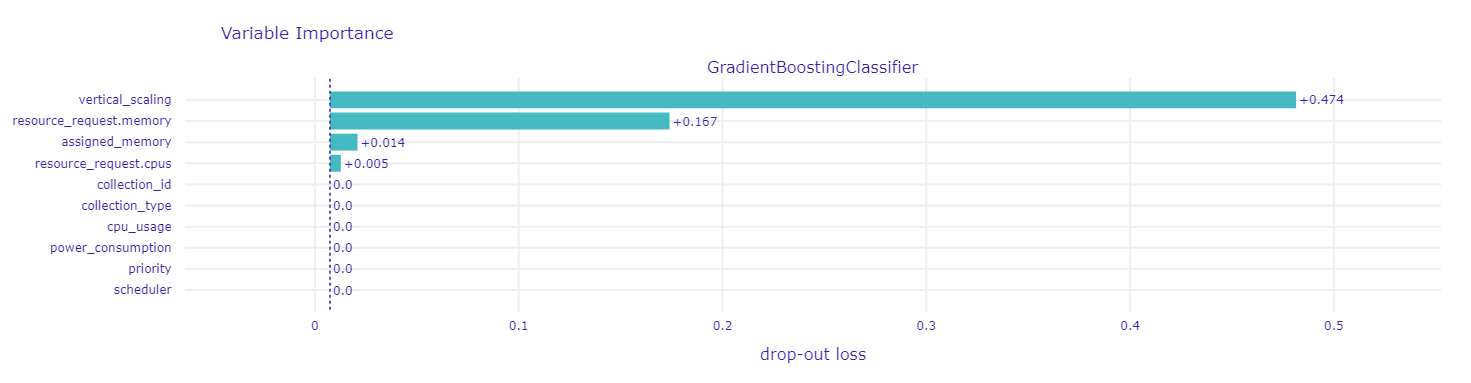

In [242]:
explanation_GB_SMOTE_train = exp_GB_SMOTE_train.model_parts()
explanation_GB_SMOTE_train.result
explanation_GB_SMOTE_train.plot()

In [243]:
exp_GB_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals                       label  \
0        0.450208  -0.450208       0.450208  GradientBoostingClassifier   
1        0.547880   0.452120       0.452120  GradientBoostingClassifier   
2        0.450208  -0.450208       0.450208  GradientBoostingClassifier   
3        0.450208  -0.450208       0.450208  GradientBoostingClassifier   
4        0.450208  -0.450208       0.450208  GradientBoostingClassifier   
...           ...        ...            ...                         ...   
1166719  0.549216   0.450784       0.450784  GradientBoostingClassifier   
1166720  0.549216   0.450784       0.450784  GradientBoostingClassifier   
1166721  0.547880   0.452120       0.452120  GradientBoostingClassifier   
1166722  0.547880   0.452120       0.452120  GradientBoostingClassifier   
1166723  0.547880   0.452120       0.452120  GradientBoostingClassifier   

             ids  
0              1  
1              2  
2              3  
3              4  
4              5  
...          ...  
1166719  1166720  
1166720  1166721  
1166721  1166722  
1166722  1166723  
1166723  1166724  

[1166724 rows x 16 columns]

In [244]:
GB_SMOTE_test = joblib.load('Jobs/SMOTE/GradientBoostingClassifier.model')
exp_GB_SMOTE_test = dx.Explainer(GB_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.45, mean = 0.5, max = 0.55
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.549, mean = 3.34e-06, max = 0.55
  -> model_info        : package sklearn

A new explainer has been created!


In [245]:
exp_GB_SMOTE_test.model_performance(model_type = 'classification')

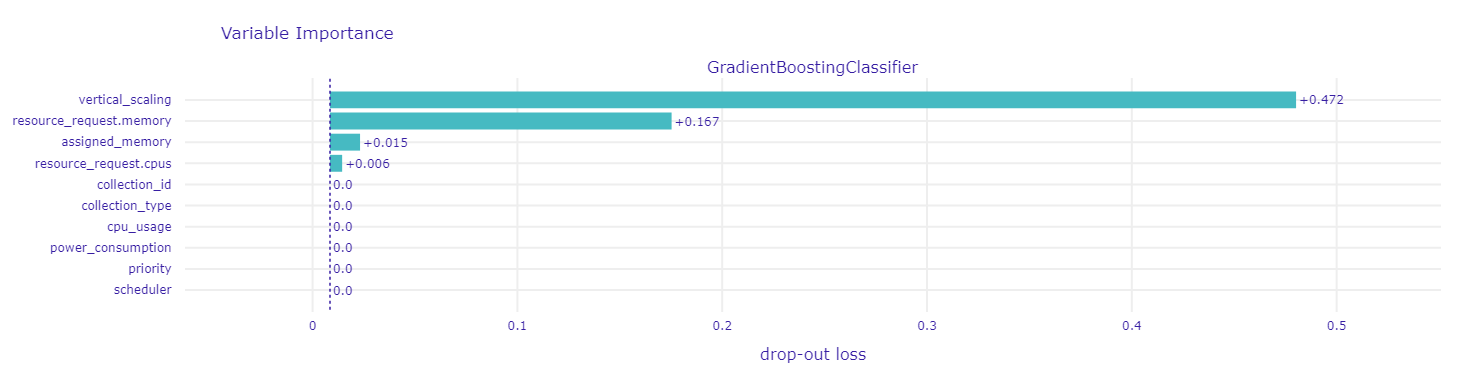

In [246]:
explanation_GB_SMOTE_test = exp_GB_SMOTE_test.model_parts()
explanation_GB_SMOTE_test.result
explanation_GB_SMOTE_test.plot()

In [247]:
exp_GB_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.549216   
1              0.010422  5.584717e-03          87.607161  1.0  0.549216   
2              0.002460  2.060890e-03          87.228992  0.0  0.450208   
3              0.013779  4.572754e-01         120.649518  0.0  0.450208   
4              0.005600  9.536743e-07          87.000110  0.0  0.450208   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.547880   
500100         0.003754  3.694534e-03          87.405762  1.0  0.547880   
500101         0.001163  3.962517e-03          87.434499  1.0  0.547880   
500102         0.001163  3.477097e-03          87.382396  1.0  0.547880   
500103         0.010422  2.233505e-03          87.247814  1.0  0.549216   

        residuals  abs_residuals                       label     ids  
0        0.450784       0.450784  GradientBoostingClassifier       1  
1        0.450784       0.450784  GradientBoostingClassifier       2  
2       -0.450208       0.450208  GradientBoostingClassifier       3  
3       -0.450208       0.450208  GradientBoostingClassifier       4  
4       -0.450208       0.450208  GradientBoostingClassifier       5  
...           ...            ...                         ...     ...  
500099   0.452120       0.452120  GradientBoostingClassifier  500100  
500100   0.452120       0.452120  GradientBoostingClassifier  500101  
500101   0.452120       0.452120  GradientBoostingClassifier  500102  
500102   0.452120       0.452120  GradientBoostingClassifier  500103  
500103   0.450784       0.450784  GradientBoostingClassifier  500104  

[500104 rows x 16 columns]

##### Extreme Gradient Boosting

In [248]:
XGB_SMOTE_train = joblib.load('Jobs/SMOTE/XGBClassifier.model')
exp_XGB_SMOTE_train = dx.Explainer(XGB_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -6.73e-05, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [249]:
exp_XGB_SMOTE_train.model_performance(model_type = 'classification')

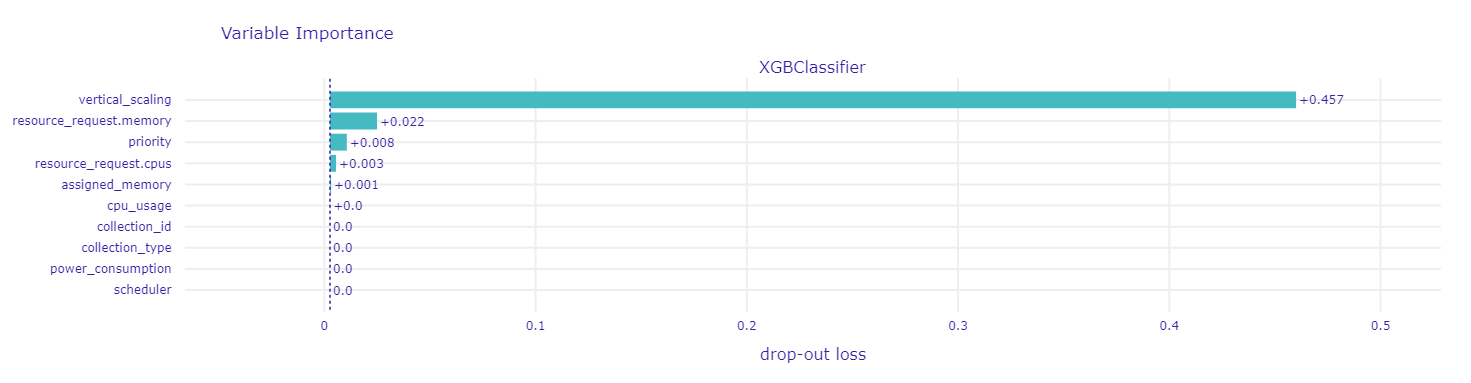

In [250]:
explanation_XGB_SMOTE_train = exp_XGB_SMOTE_train.model_parts()
explanation_XGB_SMOTE_train.result
explanation_XGB_SMOTE_train.plot()

In [251]:
exp_XGB_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals          label      ids  
0        0.354373  -0.354373       0.354373  XGBClassifier        1  
1        0.645507   0.354493       0.354493  XGBClassifier        2  
2        0.354373  -0.354373       0.354373  XGBClassifier        3  
3        0.354373  -0.354373       0.354373  XGBClassifier        4  
4        0.354373  -0.354373       0.354373  XGBClassifier        5  
...           ...        ...            ...            ...      ...  
1166719  0.645652   0.354348       0.354348  XGBClassifier  1166720  
1166720  0.645652   0.354348       0.354348  XGBClassifier  1166721  
1166721  0.645507   0.354493       0.354493  XGBClassifier  1166722  
1166722  0.637624   0.362376       0.362376  XGBClassifier  1166723  
1166723  0.645507   0.354493       0.354493  XGBClassifier  1166724  

[1166724 rows x 16 columns]

In [252]:
XGB_SMOTE_test = joblib.load('Jobs/SMOTE/XGBClassifier.model')
exp_XGB_SMOTE_test = dx.Explainer(XGB_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002D212BDC4C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.354, mean = 0.5, max = 0.646
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = -5.2e-05, max = 0.646
  -> model_info        : package sklearn

A new explainer has been created!


In [253]:
exp_XGB_SMOTE_test.model_performance(model_type = 'classification')

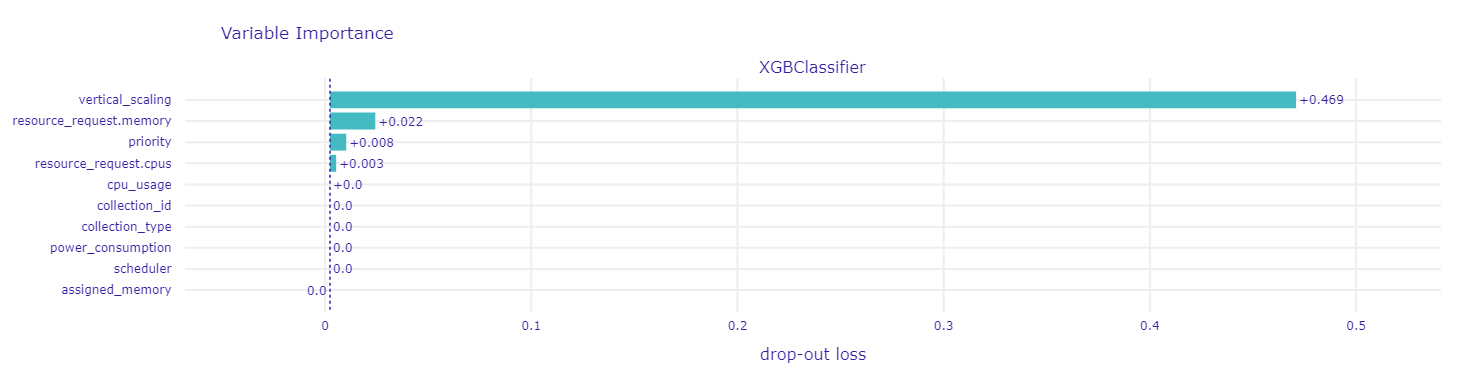

In [254]:
explanation_XGB_SMOTE_test = exp_XGB_SMOTE_test.model_parts()
explanation_XGB_SMOTE_test.result
explanation_XGB_SMOTE_test.plot()

In [255]:
exp_XGB_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.645652   
1              0.010422  5.584717e-03          87.607161  1.0  0.645652   
2              0.002460  2.060890e-03          87.228992  0.0  0.354373   
3              0.013779  4.572754e-01         120.649518  0.0  0.354373   
4              0.005600  9.536743e-07          87.000110  0.0  0.354373   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.645507   
500100         0.003754  3.694534e-03          87.405762  1.0  0.645507   
500101         0.001163  3.962517e-03          87.434499  1.0  0.645507   
500102         0.001163  3.477097e-03          87.382396  1.0  0.645507   
500103         0.010422  2.233505e-03          87.247814  1.0  0.645652   

        residuals  abs_residuals          label     ids  
0        0.354348       0.354348  XGBClassifier       1  
1        0.354348       0.354348  XGBClassifier       2  
2       -0.354373       0.354373  XGBClassifier       3  
3       -0.354373       0.354373  XGBClassifier       4  
4       -0.354373       0.354373  XGBClassifier       5  
...           ...            ...            ...     ...  
500099   0.354493       0.354493  XGBClassifier  500100  
500100   0.354493       0.354493  XGBClassifier  500101  
500101   0.354493       0.354493  XGBClassifier  500102  
500102   0.354493       0.354493  XGBClassifier  500103  
500103   0.354348       0.354348  XGBClassifier  500104  

[500104 rows x 16 columns]

##### LSTM Without Imbalanced Handling

In [29]:
LSTM_train = km.load_model('Jobs/LSTM/LSTM_Without.keras')
exp_LSTM_train = dx.Explainer(LSTM_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.44e-05, mean = 0.171, max = 0.994
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.992, mean = -0.00388, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [30]:
exp_LSTM_train.model_performance(model_type = 'classification')

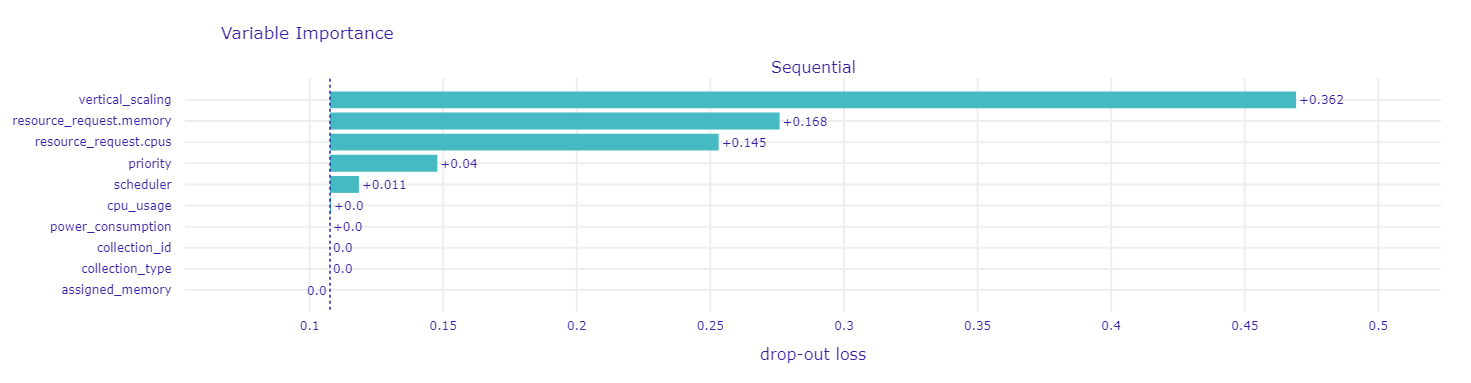

In [31]:
explanation_LSTM_train = exp_LSTM_train.model_parts()
explanation_LSTM_train.result
explanation_LSTM_train.plot()

In [32]:
exp_LSTM_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.000042   
327991         0.001163   0.004663          87.509265  1.0  0.987222   
715937         0.002460   0.002063          87.229200  0.0  0.000039   
860726         0.002460   0.002058          87.228679  0.0  0.000039   
78617          0.003300   0.004447          87.486289  0.0  0.000043   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.000044   
365838         0.001410   0.002091          87.232322  0.0  0.000052   
131932         0.007812   0.024213          89.491665  1.0  0.953413   
671155         0.002460   0.002031          87.225764  0.0  0.000039   
121958         0.004616   0.002248          87.249373  0.0  0.000149   

        residuals  abs_residuals       label     ids  
506532  -0.000042       0.000042  Sequential       1  
327991   0.012778       0.012778  Sequential       2  
715937  -0.000039       0.000039  Sequential       3  
860726  -0.000039       0.000039  Sequential       4  
78617   -0.000043       0.000043  Sequential       5  
...           ...            ...         ...     ...  
259178  -0.000044       0.000044  Sequential  699996  
365838  -0.000052       0.000052  Sequential  699997  
131932   0.046587       0.046587  Sequential  699998  
671155  -0.000039       0.000039  Sequential  699999  
121958  -0.000149       0.000149  Sequential  700000  

[700000 rows x 16 columns]

In [33]:
LSTM_test = km.load_model('Jobs/LSTM/LSTM_Without.keras')
exp_LSTM_test = dx.Explainer(LSTM_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.44e-05, mean = 0.17, max = 0.994
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.992, mean = -0.00382, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [34]:
exp_LSTM_test.model_performance(model_type = 'classification')

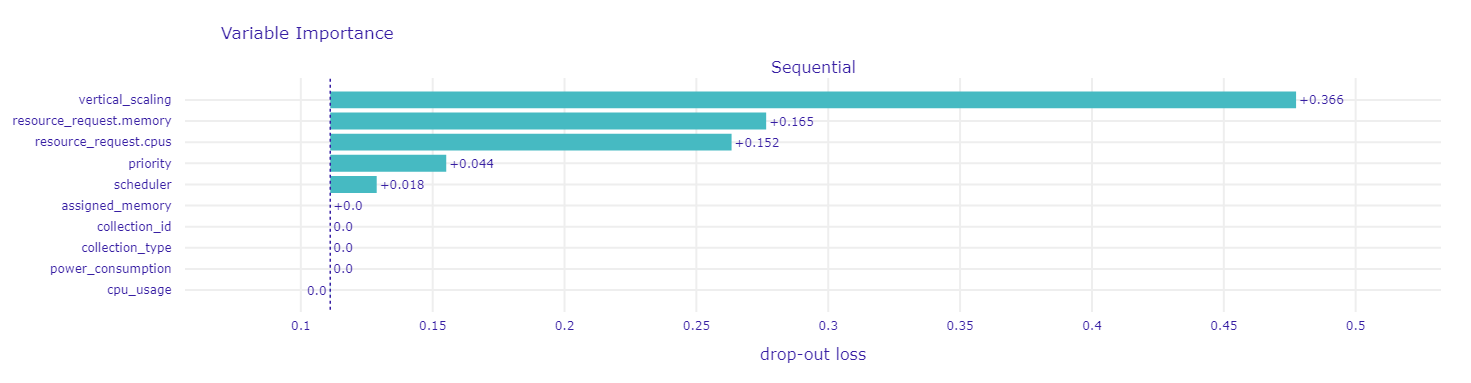

In [35]:
explanation_LSTM_test = exp_LSTM_test.model_parts()
explanation_LSTM_test.result
explanation_LSTM_test.plot()

In [36]:
exp_LSTM_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.991196   
79954          0.010422  5.584717e-03          87.607161  1.0  0.991195   
567130         0.002460  2.060890e-03          87.228992  0.0  0.000039   
500891         0.013779  4.572754e-01         120.649518  0.0  0.000042   
55399          0.005600  9.536743e-07          87.000110  0.0  0.000291   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.000043   
728324         0.002460  2.230644e-03          87.247503  0.0  0.000039   
76260          0.004112  8.382797e-04          87.094382  0.0  0.000044   
77813          0.004112  8.192062e-04          87.092260  0.0  0.000044   
718205         0.002460  2.095222e-03          87.232738  0.0  0.000039   

        residuals  abs_residuals       label     ids  
987231   0.008804       0.008804  Sequential       1  
79954    0.008805       0.008805  Sequential       2  
567130  -0.000039       0.000039  Sequential       3  
500891  -0.000042       0.000042  Sequential       4  
55399   -0.000291       0.000291  Sequential       5  
...           ...            ...         ...     ...  
463299  -0.000043       0.000043  Sequential  299996  
728324  -0.000039       0.000039  Sequential  299997  
76260   -0.000044       0.000044  Sequential  299998  
77813   -0.000044       0.000044  Sequential  299999  
718205  -0.000039       0.000039  Sequential  300000  

[300000 rows x 16 columns]

##### LSTM With RUS

In [37]:
LSTM_RUS = km.load_model('Jobs/LSTM/LSTM_RUS.keras')
exp_LSTM_RUS = dx.Explainer(LSTM_RUS, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000986, mean = 0.502, max = 0.996
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.996, mean = -0.00163, max = 0.999
  -> model_info        : package keras

A new explainer has been created!


In [38]:
exp_LSTM_RUS.model_performance(model_type = 'classification')

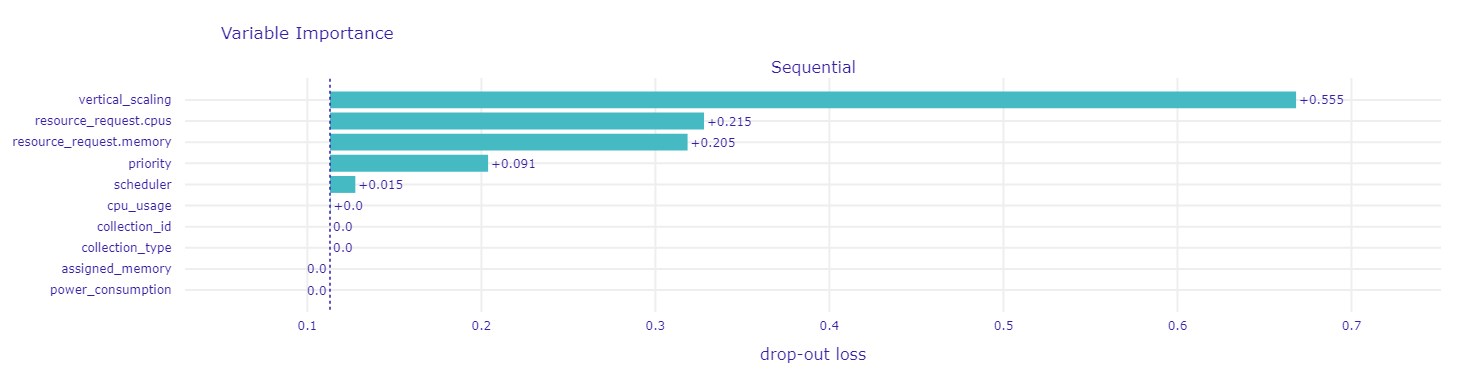

In [39]:
explanation_LSTM_RUS_train = exp_LSTM_RUS.model_parts()
explanation_LSTM_RUS_train.result
explanation_LSTM_RUS_train.plot()

In [40]:
exp_LSTM_RUS.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.001760   
1              0.002460   0.001895          87.210859  0.0  0.001760   
2              0.002460   0.002245          87.249061  0.0  0.001760   
3              0.002460   0.002182          87.242203  0.0  0.001760   
4              0.002460   0.002246          87.249165  0.0  0.001760   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.994865   
233272         0.001163   0.000023          87.002637  1.0  0.995318   
233273         0.002144   0.000040          87.004606  1.0  0.994124   
233274         0.001297   0.003181          87.350552  1.0  0.995723   
233275         0.007812   0.024213          89.491665  1.0  0.988269   

        residuals  abs_residuals       label     ids  
0       -0.001760       0.001760  Sequential       1  
1       -0.001760       0.001760  Sequential       2  
2       -0.001760       0.001760  Sequential       3  
3       -0.001760       0.001760  Sequential       4  
4       -0.001760       0.001760  Sequential       5  
...           ...            ...         ...     ...  
233271   0.005135       0.005135  Sequential  233272  
233272   0.004682       0.004682  Sequential  233273  
233273   0.005876       0.005876  Sequential  233274  
233274   0.004277       0.004277  Sequential  233275  
233275   0.011731       0.011731  Sequential  233276  

[233276 rows x 16 columns]

In [41]:
LSTM_RUS_test = km.load_model('Jobs/LSTM/LSTM_RUS.keras')
exp_LSTM_RUS_test = dx.Explainer(LSTM_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000986, mean = 0.502, max = 0.996
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.996, mean = -0.00201, max = 0.999
  -> model_info        : package keras

A new explainer has been created!


In [42]:
exp_LSTM_RUS_test.model_performance(model_type = 'classification')

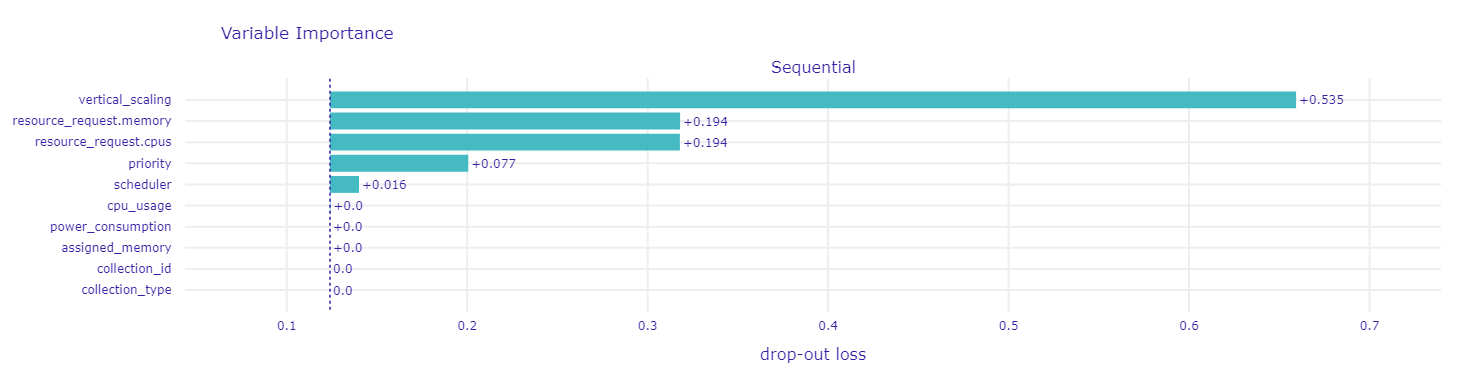

In [43]:
explanation_LSTM_RUS_test = exp_LSTM_RUS_test.model_parts()
explanation_LSTM_RUS_test.result
explanation_LSTM_RUS_test.plot()

In [44]:
exp_LSTM_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.001760   
1             0.002460   0.002211          87.245321  0.0  0.001760   
2             0.002460   0.002011          87.223577  0.0  0.001760   
3             0.002460   0.001897          87.211068  0.0  0.001760   
4             0.001410   0.001515          87.169236  0.0  0.002030   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.994065   
99892         0.010422   0.000000          87.000000  1.0  0.994873   
99893         0.002399   0.002175          87.241475  1.0  0.994475   
99894         0.001163   0.003661          87.402178  1.0  0.995318   
99895         0.001163   0.003451          87.379626  1.0  0.995318   

       residuals  abs_residuals       label    ids  
0      -0.001760       0.001760  Sequential      1  
1      -0.001760       0.001760  Sequential      2  
2      -0.001760       0.001760  Sequential      3  
3      -0.001760       0.001760  Sequential      4  
4      -0.002030       0.002030  Sequential      5  
...          ...            ...         ...    ...  
99891   0.005935       0.005935  Sequential  99892  
99892   0.005127       0.005127  Sequential  99893  
99893   0.005525       0.005525  Sequential  99894  
99894   0.004682       0.004682  Sequential  99895  
99895   0.004682       0.004682  Sequential  99896  

[99896 rows x 16 columns]

##### LSTM With ROS

In [45]:
LSTM_ROS_train = km.load_model('Jobs/LSTM/LSTM_ROS.keras')
exp_LSTM_ROS_train = dx.Explainer(LSTM_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.14e-06, mean = 0.507, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00701, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [46]:
exp_LSTM_ROS_train.model_performance(model_type = 'classification')

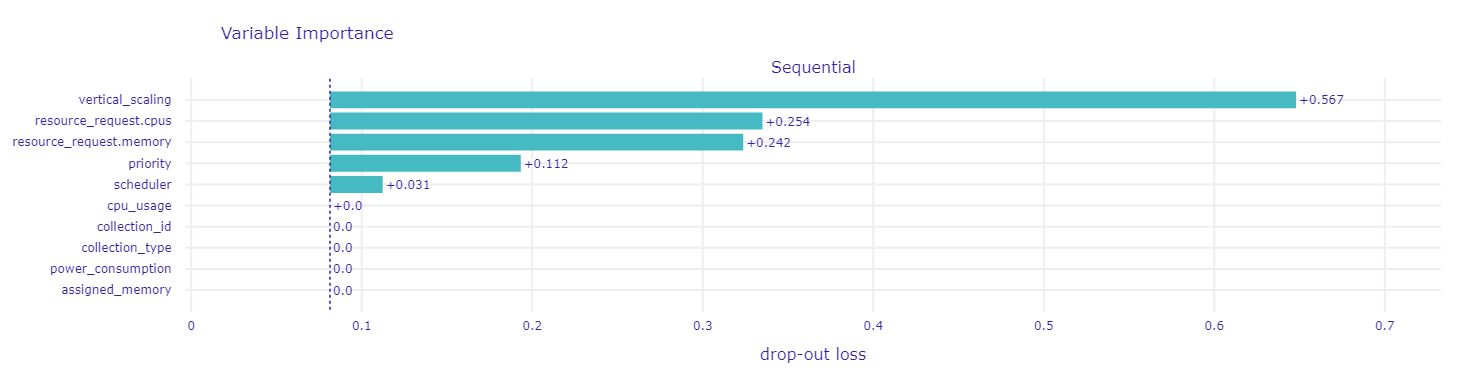

In [47]:
explanation_LSTM_ROS_train = exp_LSTM_ROS_train.model_parts()
explanation_LSTM_ROS_train.result
explanation_LSTM_ROS_train.plot()

In [48]:
exp_LSTM_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals       label      ids  
0        0.000021  -0.000021       0.000021  Sequential        1  
1        0.999468   0.000532       0.000532  Sequential        2  
2        0.000009  -0.000009       0.000009  Sequential        3  
3        0.000009  -0.000009       0.000009  Sequential        4  
4        0.000009  -0.000009       0.000009  Sequential        5  
...           ...        ...            ...         ...      ...  
1166719  0.999468   0.000532       0.000532  Sequential  1166720  
1166720  0.999468   0.000532       0.000532  Sequential  1166721  
1166721  0.999468   0.000532       0.000532  Sequential  1166722  
1166722  0.999468   0.000532       0.000532  Sequential  1166723  
1166723  0.999468   0.000532       0.000532  Sequential  1166724  

[1166724 rows x 16 columns]

In [49]:
LSTM_ROS_test = km.load_model('Jobs/LSTM/LSTM_ROS.keras')
exp_LSTM_ROS_test = dx.Explainer(LSTM_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.14e-06, mean = 0.507, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00689, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [50]:
exp_LSTM_ROS_test.model_performance(model_type = 'classification')

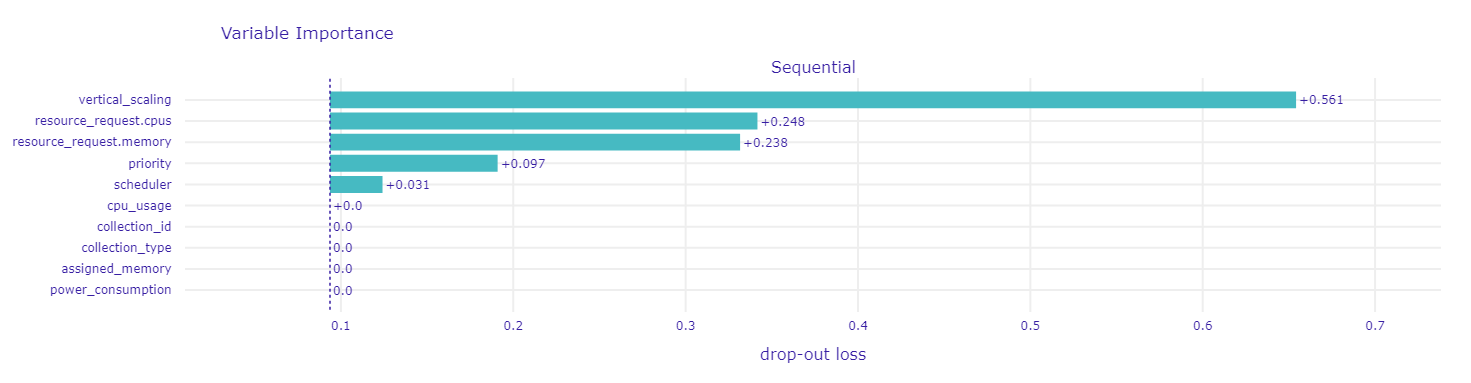

In [51]:
explanation_LSTM_ROS_test = exp_LSTM_ROS_test.model_parts()
explanation_LSTM_ROS_test.result
explanation_LSTM_ROS_test.plot()

In [52]:
exp_LSTM_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.999846   
1              0.010422  5.584717e-03          87.607161  1.0  0.999846   
2              0.002460  2.060890e-03          87.228992  0.0  0.000009   
3              0.013779  4.572754e-01         120.649518  0.0  0.000021   
4              0.005600  9.536743e-07          87.000110  0.0  0.002467   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.995253   
500100         0.010422  1.984596e-03          87.220660  1.0  0.999846   
500101         0.001163  4.131317e-03          87.452567  1.0  0.999468   
500102         0.001942  0.000000e+00          87.000000  1.0  0.987593   
500103         0.001942  7.438660e-05          87.008533  1.0  0.987593   

        residuals  abs_residuals       label     ids  
0        0.000154       0.000154  Sequential       1  
1        0.000154       0.000154  Sequential       2  
2       -0.000009       0.000009  Sequential       3  
3       -0.000021       0.000021  Sequential       4  
4       -0.002467       0.002467  Sequential       5  
...           ...            ...         ...     ...  
500099   0.004747       0.004747  Sequential  500100  
500100   0.000154       0.000154  Sequential  500101  
500101   0.000532       0.000532  Sequential  500102  
500102   0.012407       0.012407  Sequential  500103  
500103   0.012407       0.012407  Sequential  500104  

[500104 rows x 16 columns]

##### LSTM With SMOTE

In [53]:
LSTM_SMOTE_train = km.load_model('Jobs/LSTM/LSTM_SMOTE.keras')
exp_LSTM_SMOTE_train = dx.Explainer(LSTM_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.95e-05, mean = 0.507, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00669, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [54]:
exp_LSTM_SMOTE_train.model_performance(model_type = 'classification')

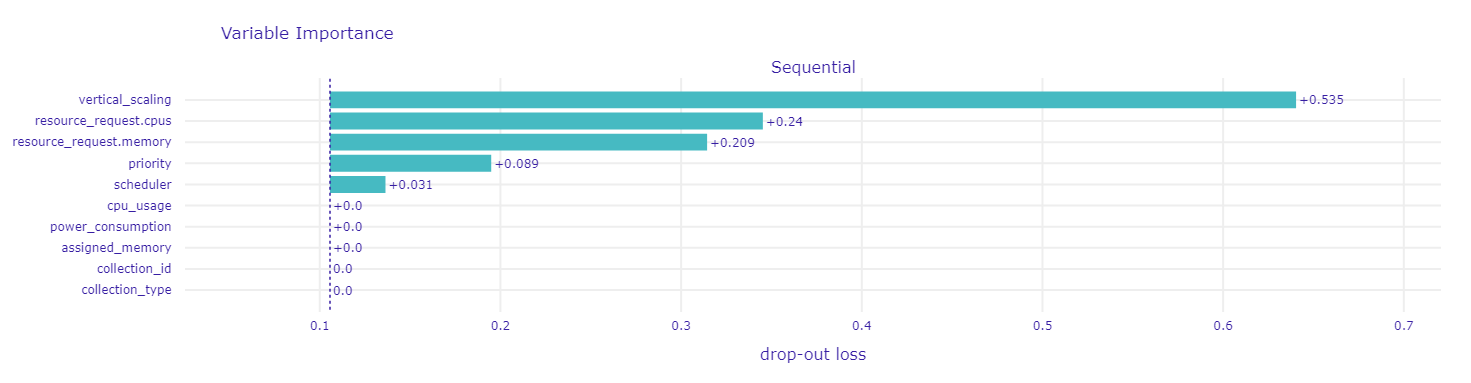

In [55]:
explanation_LSTM_SMOTE_train = exp_LSTM_SMOTE_train.model_parts()
explanation_LSTM_SMOTE_train.result
explanation_LSTM_SMOTE_train.plot()

In [56]:
exp_LSTM_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals       label      ids  
0        0.000033  -0.000033       0.000033  Sequential        1  
1        0.999003   0.000997       0.000997  Sequential        2  
2        0.000077  -0.000077       0.000077  Sequential        3  
3        0.000077  -0.000077       0.000077  Sequential        4  
4        0.000030  -0.000030       0.000030  Sequential        5  
...           ...        ...            ...         ...      ...  
1166719  0.999495   0.000505       0.000505  Sequential  1166720  
1166720  0.999495   0.000505       0.000505  Sequential  1166721  
1166721  0.999003   0.000997       0.000997  Sequential  1166722  
1166722  0.993415   0.006585       0.006585  Sequential  1166723  
1166723  0.999003   0.000997       0.000997  Sequential  1166724  

[1166724 rows x 16 columns]

In [57]:
LSTM_SMOTE_test = km.load_model('Jobs/LSTM/LSTM_SMOTE.keras')
exp_LSTM_SMOTE_test = dx.Explainer(LSTM_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2e-05, mean = 0.506, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.999, mean = -0.00647, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [58]:
exp_LSTM_SMOTE_test.model_performance(model_type = 'classification')

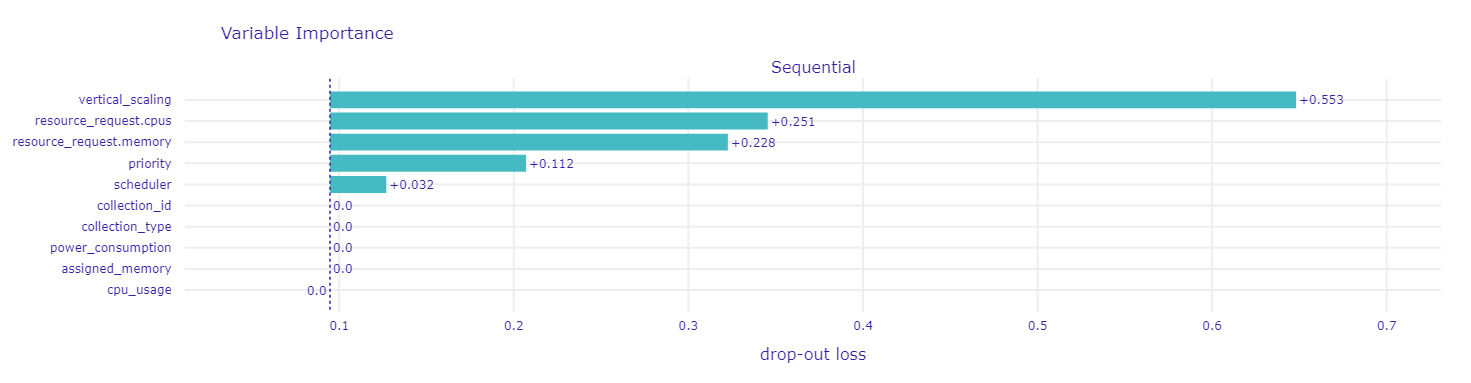

In [59]:
explanation_LSTM_SMOTE_test = exp_LSTM_SMOTE_test.model_parts()
explanation_LSTM_SMOTE_test.result
explanation_LSTM_SMOTE_test.plot()

In [60]:
exp_LSTM_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.999495   
1              0.010422  5.584717e-03          87.607161  1.0  0.999495   
2              0.002460  2.060890e-03          87.228992  0.0  0.000077   
3              0.013779  4.572754e-01         120.649518  0.0  0.000033   
4              0.005600  9.536743e-07          87.000110  0.0  0.006740   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.999003   
500100         0.003754  3.694534e-03          87.405762  1.0  0.997935   
500101         0.001163  3.962517e-03          87.434499  1.0  0.999003   
500102         0.001163  3.477097e-03          87.382396  1.0  0.999003   
500103         0.010422  2.233505e-03          87.247814  1.0  0.999495   

        residuals  abs_residuals       label     ids  
0        0.000505       0.000505  Sequential       1  
1        0.000505       0.000505  Sequential       2  
2       -0.000077       0.000077  Sequential       3  
3       -0.000033       0.000033  Sequential       4  
4       -0.006740       0.006740  Sequential       5  
...           ...            ...         ...     ...  
500099   0.000997       0.000997  Sequential  500100  
500100   0.002065       0.002065  Sequential  500101  
500101   0.000997       0.000997  Sequential  500102  
500102   0.000997       0.000997  Sequential  500103  
500103   0.000505       0.000505  Sequential  500104  

[500104 rows x 16 columns]

##### GRU Without Imbalanced Handling

In [61]:
GRU_train = km.load_model('Jobs/GRU/GRU_Without.keras')
exp_GRU_train = dx.Explainer(GRU_train, X_train, Y_train)

Preparation of a new explainer is initiated

  -> data              : 700000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700000 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.96e-05, mean = 0.173, max = 0.996
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.995, mean = -0.00664, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [62]:
exp_GRU_train.model_performance(model_type = 'classification')

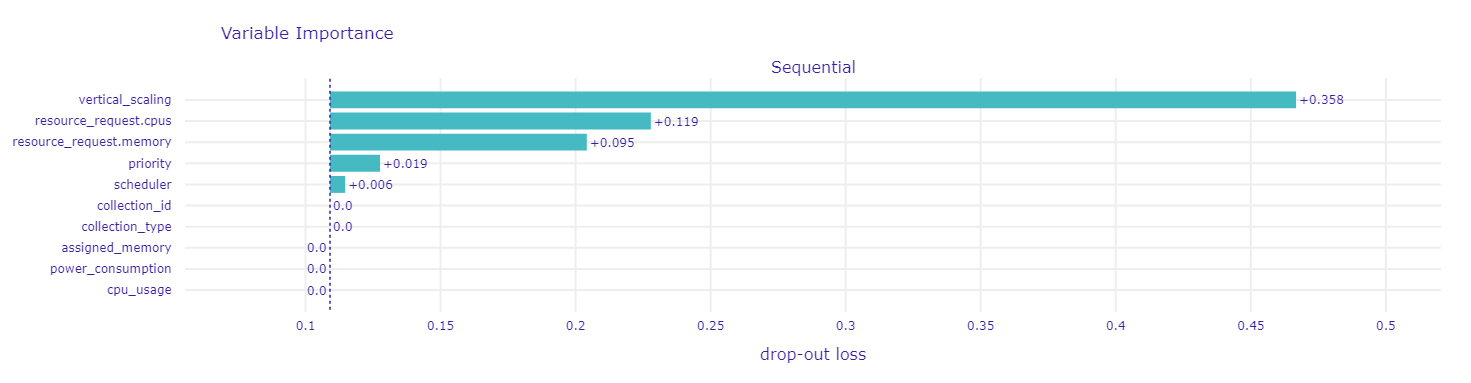

In [63]:
explanation_GRU_train = exp_GRU_train.model_parts()
explanation_GRU_train.result
explanation_GRU_train.plot()

In [64]:
exp_GRU_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
506532   4.953396e+11       1.0               1.884318   
327991   4.767899e+11       2.0              -0.692554   
715937   4.945463e+11       1.0              -0.613973   
860726   4.945463e+11       1.0              -0.613973   
78617    4.982169e+11       1.0               0.416916   
...               ...       ...                    ...   
259178   4.605303e+11       1.0              -0.613973   
365838   5.031836e+11       1.0              -0.613973   
131932   4.559057e+11       1.0               1.844303   
671155   4.945463e+11       1.0              -0.613973   
121958   4.619354e+11       1.0              -0.375360   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
506532                 2.165943              0.0               2.0        1.0   
327991                -0.562505              0.0               3.0        1.0   
715937                 0.239532              0.0               2.0        1.0   
860726                 0.239532              0.0               2.0        1.0   
78617                  0.635787              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
259178                 0.947843              0.0               2.0        1.0   
365838                -0.389695              0.0               2.0        1.0   
131932                 1.784754              0.0               1.0        1.0   
671155                 0.239532              0.0               2.0        1.0   
121958                 1.111748              0.0               2.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
506532         0.013779   0.611328         128.792671  0.0  0.000087   
327991         0.001163   0.004663          87.509265  1.0  0.993585   
715937         0.002460   0.002063          87.229200  0.0  0.000054   
860726         0.002460   0.002058          87.228679  0.0  0.000054   
78617          0.003300   0.004447          87.486289  0.0  0.000056   
...                 ...        ...                ...  ...       ...   
259178         0.004112   0.000044          87.005043  0.0  0.000057   
365838         0.001410   0.002091          87.232322  0.0  0.000108   
131932         0.007812   0.024213          89.491665  1.0  0.978852   
671155         0.002460   0.002031          87.225764  0.0  0.000054   
121958         0.004616   0.002248          87.249373  0.0  0.000196   

        residuals  abs_residuals       label     ids  
506532  -0.000087       0.000087  Sequential       1  
327991   0.006415       0.006415  Sequential       2  
715937  -0.000054       0.000054  Sequential       3  
860726  -0.000054       0.000054  Sequential       4  
78617   -0.000056       0.000056  Sequential       5  
...           ...            ...         ...     ...  
259178  -0.000057       0.000057  Sequential  699996  
365838  -0.000108       0.000108  Sequential  699997  
131932   0.021148       0.021148  Sequential  699998  
671155  -0.000054       0.000054  Sequential  699999  
121958  -0.000196       0.000196  Sequential  700000  

[700000 rows x 16 columns]

In [65]:
GRU_test = km.load_model('Jobs/GRU/GRU_Without.keras')
exp_GRU_test = dx.Explainer(GRU_test, X_test, Y_test)

Preparation of a new explainer is initiated

  -> data              : 300000 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 300000 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.96e-05, mean = 0.173, max = 0.996
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.995, mean = -0.00642, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [66]:
exp_GRU_test.model_performance(model_type = 'classification')

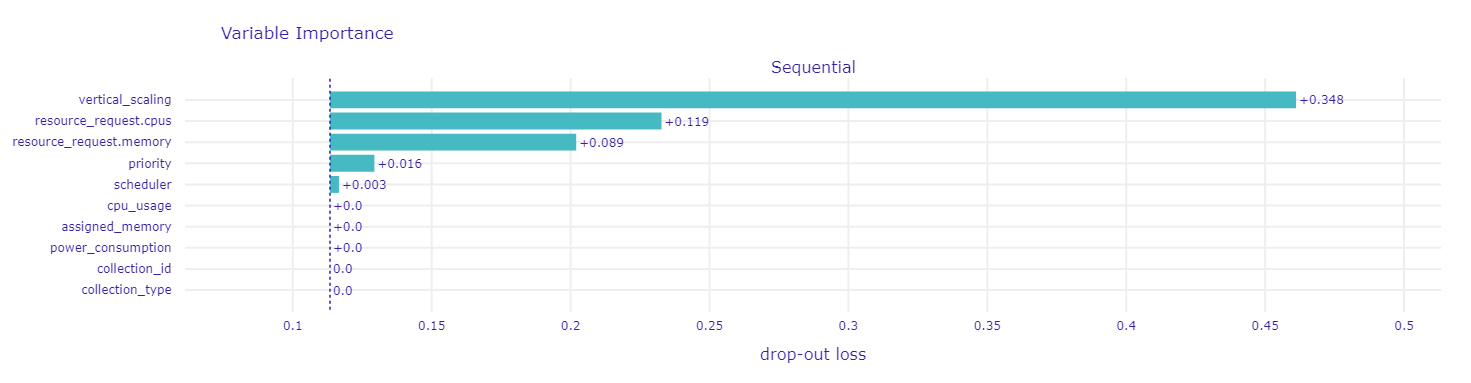

In [67]:
explanation_GRU_test = exp_GRU_test.model_parts()
explanation_GRU_test.result
explanation_GRU_test.plot()

In [68]:
exp_GRU_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
987231   4.980479e+11       1.0               0.416916   
79954    4.963447e+11       1.0               0.416916   
567130   4.945463e+11       1.0              -0.613973   
500891   4.953396e+11       1.0               1.884318   
55399    4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
463299   4.953396e+11       1.0               1.884318   
728324   4.945463e+11       1.0              -0.613973   
76260    4.622639e+11       1.0              -0.613973   
77813    4.605303e+11       1.0              -0.613973   
718205   4.945463e+11       1.0              -0.613973   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
987231                 2.049133              0.0               1.0        1.0   
79954                  2.049133              0.0               1.0        1.0   
567130                 0.239532              0.0               2.0        1.0   
500891                 2.165943              0.0               2.0        1.0   
55399                  1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
463299                 2.165943              0.0               2.0        1.0   
728324                 0.239532              0.0               2.0        1.0   
76260                  0.950483              0.0               2.0        1.0   
77813                  0.947843              0.0               2.0        1.0   
718205                 0.239532              0.0               2.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
987231         0.010422  2.098083e-03          87.233051  1.0  0.993053   
79954          0.010422  5.584717e-03          87.607161  1.0  0.993049   
567130         0.002460  2.060890e-03          87.228992  0.0  0.000054   
500891         0.013779  4.572754e-01         120.649518  0.0  0.000089   
55399          0.005600  9.536743e-07          87.000110  0.0  0.003447   
...                 ...           ...                ...  ...       ...   
463299         0.013779  2.015114e-03          87.223993  0.0  0.000094   
728324         0.002460  2.230644e-03          87.247503  0.0  0.000054   
76260          0.004112  8.382797e-04          87.094382  0.0  0.000057   
77813          0.004112  8.192062e-04          87.092260  0.0  0.000057   
718205         0.002460  2.095222e-03          87.232738  0.0  0.000054   

        residuals  abs_residuals       label     ids  
987231   0.006947       0.006947  Sequential       1  
79954    0.006951       0.006951  Sequential       2  
567130  -0.000054       0.000054  Sequential       3  
500891  -0.000089       0.000089  Sequential       4  
55399   -0.003447       0.003447  Sequential       5  
...           ...            ...         ...     ...  
463299  -0.000094       0.000094  Sequential  299996  
728324  -0.000054       0.000054  Sequential  299997  
76260   -0.000057       0.000057  Sequential  299998  
77813   -0.000057       0.000057  Sequential  299999  
718205  -0.000054       0.000054  Sequential  300000  

[300000 rows x 16 columns]

##### GRU With RUS

In [69]:
GRU_RUS_train = km.load_model('Jobs/GRU/GRU_RUS.keras')
exp_GRU_RUS_train = dx.Explainer(GRU_RUS_train, X_train_RUS, Y_train_RUS)

Preparation of a new explainer is initiated

  -> data              : 233276 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 233276 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000903, mean = 0.502, max = 0.998
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.998, mean = -0.00193, max = 0.999
  -> model_info        : package keras

A new explainer has been created!


In [70]:
exp_GRU_RUS_train.model_performance(model_type = 'classification')

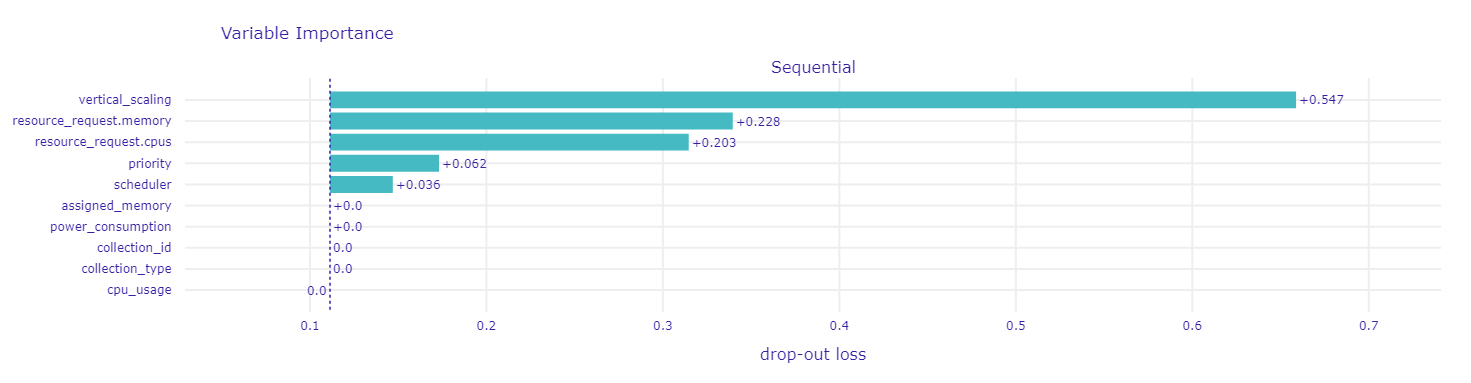

In [71]:
explanation_GRU_RUS_train = exp_GRU_RUS_train.model_parts()
explanation_GRU_RUS_train.result
explanation_GRU_RUS_train.plot()

In [72]:
exp_GRU_RUS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.945463e+11       1.0              -0.613973   
1        4.945463e+11       1.0              -0.613973   
2        4.945463e+11       1.0              -0.613973   
3        4.945463e+11       1.0              -0.613973   
4        4.945463e+11       1.0              -0.613973   
...               ...       ...                    ...   
233271   4.653859e+11       1.0              -0.672785   
233272   4.767899e+11       2.0              -0.692554   
233273   4.624253e+11       1.0              -0.672785   
233274   4.599540e+11       1.0              -0.445984   
233275   4.559057e+11       1.0               1.844303   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      0.239532              0.0               2.0        1.0   
1                      0.239532              0.0               2.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      0.239532              0.0               2.0        1.0   
4                      0.239532              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
233271                 0.079991              0.0               3.0        1.0   
233272                -0.562505              0.0               3.0        1.0   
233273                 0.174650              0.0               3.0        1.0   
233274                -0.467412              0.0               3.0        1.0   
233275                 1.784754              0.0               1.0        1.0   

        assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0              0.002460   0.002285          87.253423  0.0  0.001191   
1              0.002460   0.001895          87.210859  0.0  0.001191   
2              0.002460   0.002245          87.249061  0.0  0.001191   
3              0.002460   0.002182          87.242203  0.0  0.001191   
4              0.002460   0.002246          87.249165  0.0  0.001191   
...                 ...        ...                ...  ...       ...   
233271         0.002167   0.003828          87.420088  1.0  0.986539   
233272         0.001163   0.000023          87.002637  1.0  0.995419   
233273         0.002144   0.000040          87.004606  1.0  0.982202   
233274         0.001297   0.003181          87.350552  1.0  0.995123   
233275         0.007812   0.024213          89.491665  1.0  0.992442   

        residuals  abs_residuals       label     ids  
0       -0.001191       0.001191  Sequential       1  
1       -0.001191       0.001191  Sequential       2  
2       -0.001191       0.001191  Sequential       3  
3       -0.001191       0.001191  Sequential       4  
4       -0.001191       0.001191  Sequential       5  
...           ...            ...         ...     ...  
233271   0.013461       0.013461  Sequential  233272  
233272   0.004581       0.004581  Sequential  233273  
233273   0.017798       0.017798  Sequential  233274  
233274   0.004877       0.004877  Sequential  233275  
233275   0.007558       0.007558  Sequential  233276  

[233276 rows x 16 columns]

In [73]:
GRU_RUS_test = km.load_model('Jobs/GRU/GRU_RUS.keras')
exp_GRU_RUS_test = dx.Explainer(GRU_RUS_test, X_test_RUS, Y_test_RUS)

Preparation of a new explainer is initiated

  -> data              : 99896 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 99896 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000903, mean = 0.502, max = 0.998
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.998, mean = -0.00233, max = 0.999
  -> model_info        : package keras

A new explainer has been created!


In [74]:
exp_GRU_RUS_test.model_performance(model_type = 'classification')

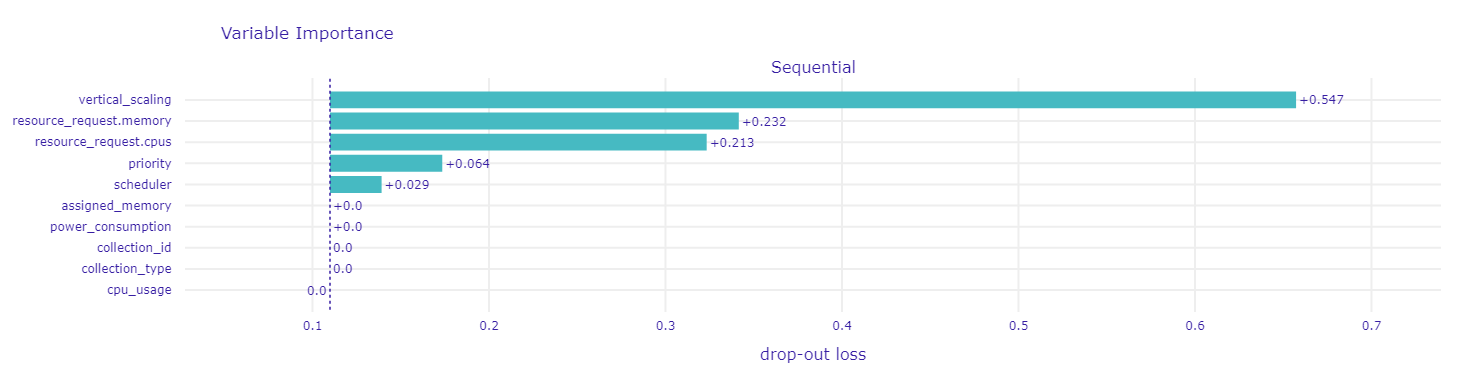

In [75]:
explanation_GRU_RUS_test = exp_GRU_RUS_test.model_parts()
explanation_GRU_RUS_test.result
explanation_GRU_RUS_test.plot()

In [76]:
exp_GRU_RUS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0       4.945463e+11       1.0              -0.613973   
1       4.945463e+11       1.0              -0.613973   
2       4.945463e+11       1.0              -0.613973   
3       4.945463e+11       1.0              -0.613973   
4       5.031836e+11       1.0              -0.613973   
...              ...       ...                    ...   
99891   4.985146e+11       1.0              -0.519638   
99892   4.938921e+11       1.0               0.416916   
99893   4.962994e+11       1.0              -0.463985   
99894   4.767899e+11       2.0              -0.692554   
99895   4.767899e+11       2.0              -0.692554   

       resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                     0.239532              0.0               2.0        1.0   
1                     0.239532              0.0               2.0        1.0   
2                     0.239532              0.0               2.0        1.0   
3                     0.239532              0.0               2.0        1.0   
4                    -0.389695              0.0               2.0        1.0   
...                        ...              ...               ...        ...   
99891                 0.245514              0.0               3.0        1.0   
99892                 2.049133              0.0               1.0        1.0   
99893                 0.207339              0.0               3.0        1.0   
99894                -0.562505              0.0               3.0        1.0   
99895                -0.562505              0.0               3.0        1.0   

       assigned_memory  cpu_usage  power_consumption    y     y_hat  \
0             0.002460   0.001969          87.218992  0.0  0.001191   
1             0.002460   0.002211          87.245321  0.0  0.001191   
2             0.002460   0.002011          87.223577  0.0  0.001191   
3             0.002460   0.001897          87.211068  0.0  0.001191   
4             0.001410   0.001515          87.169236  0.0  0.002128   
...                ...        ...                ...  ...       ...   
99891         0.002472   0.002688          87.297243  1.0  0.968413   
99892         0.010422   0.000000          87.000000  1.0  0.997256   
99893         0.002399   0.002175          87.241475  1.0  0.967573   
99894         0.001163   0.003661          87.402178  1.0  0.995424   
99895         0.001163   0.003451          87.379626  1.0  0.995424   

       residuals  abs_residuals       label    ids  
0      -0.001191       0.001191  Sequential      1  
1      -0.001191       0.001191  Sequential      2  
2      -0.001191       0.001191  Sequential      3  
3      -0.001191       0.001191  Sequential      4  
4      -0.002128       0.002128  Sequential      5  
...          ...            ...         ...    ...  
99891   0.031587       0.031587  Sequential  99892  
99892   0.002744       0.002744  Sequential  99893  
99893   0.032427       0.032427  Sequential  99894  
99894   0.004576       0.004576  Sequential  99895  
99895   0.004576       0.004576  Sequential  99896  

[99896 rows x 16 columns]

##### GRU With ROS

In [77]:
GRU_ROS_train = km.load_model('Jobs/GRU/GRU_ROS.keras')
exp_GRU_ROS_train = dx.Explainer(GRU_ROS_train, X_train_ROS, Y_train_ROS)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000104, mean = 0.506, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00582, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [78]:
exp_GRU_ROS_train.model_performance(model_type = 'classification')

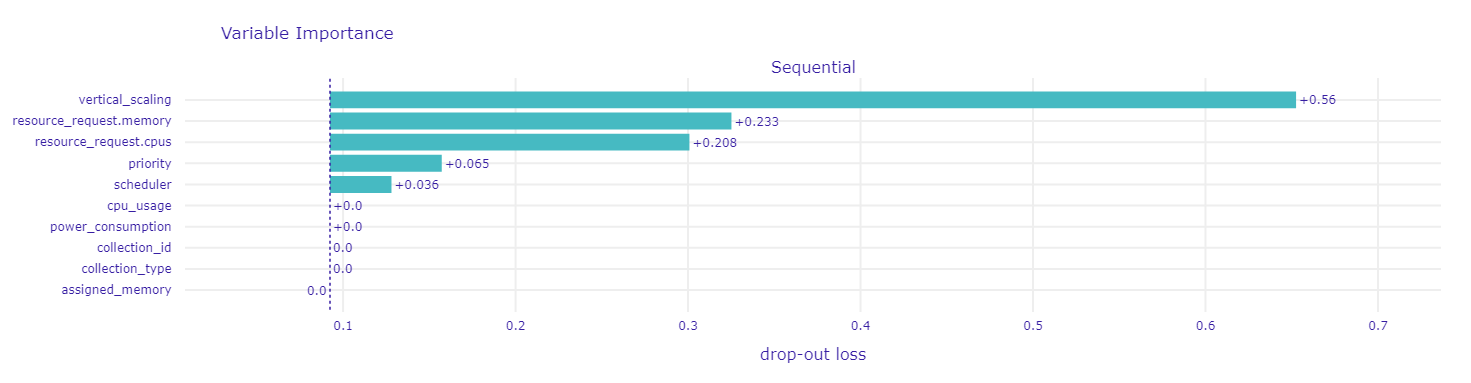

In [79]:
explanation_GRU_ROS_train = exp_GRU_ROS_train.model_parts()
explanation_GRU_ROS_train.result
explanation_GRU_ROS_train.plot()

In [80]:
exp_GRU_ROS_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.767899e+11       2.0              -0.692554   
1166720   4.767899e+11       2.0              -0.692554   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.767899e+11       2.0              -0.692554   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                -0.562505              0.0               3.0   
1166720                -0.562505              0.0               3.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.562505              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.001163   0.003940          87.432047  1.0   
1166720        1.0         0.001163   0.003965          87.434806  1.0   
1166721        1.0         0.001163   0.004735          87.516984  1.0   
1166722        1.0         0.001163   0.004740          87.517491  1.0   
1166723        1.0         0.001163   0.003328          87.366382  1.0   

            y_hat  residuals  abs_residuals       label      ids  
0        0.000119  -0.000119       0.000119  Sequential        1  
1        0.999876   0.000124       0.000124  Sequential        2  
2        0.000108  -0.000108       0.000108  Sequential        3  
3        0.000108  -0.000108       0.000108  Sequential        4  
4        0.000128  -0.000128       0.000128  Sequential        5  
...           ...        ...            ...         ...      ...  
1166719  0.999876   0.000124       0.000124  Sequential  1166720  
1166720  0.999876   0.000124       0.000124  Sequential  1166721  
1166721  0.999876   0.000124       0.000124  Sequential  1166722  
1166722  0.999876   0.000124       0.000124  Sequential  1166723  
1166723  0.999876   0.000124       0.000124  Sequential  1166724  

[1166724 rows x 16 columns]

In [81]:
GRU_ROS_test = km.load_model('Jobs/GRU/GRU_ROS.keras')
exp_GRU_ROS_test = dx.Explainer(GRU_ROS_test, X_test_ROS, Y_test_ROS)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000104, mean = 0.506, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00563, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [82]:
exp_GRU_ROS_test.model_performance(model_type = 'classification')

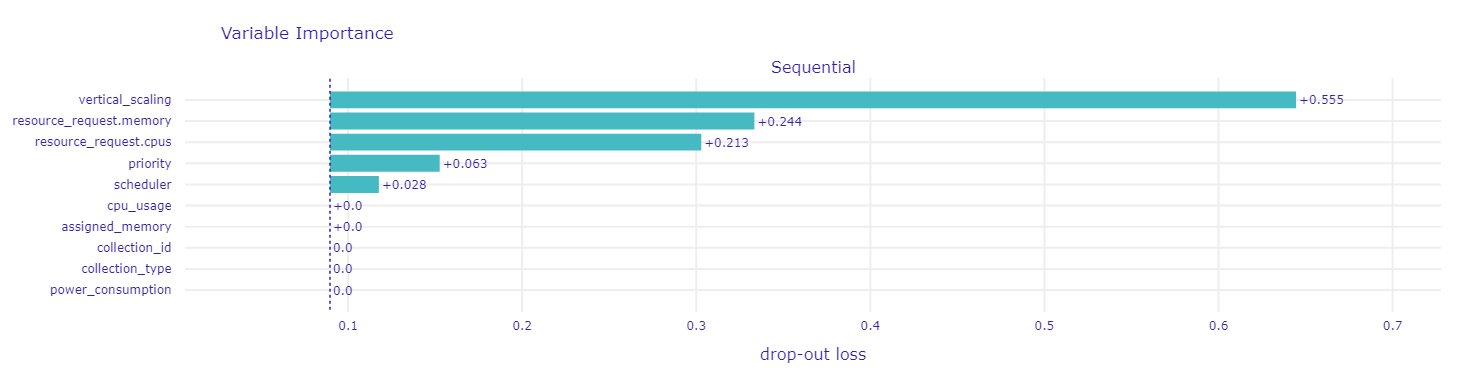

In [83]:
explanation_GRU_ROS_test = exp_GRU_ROS_test.model_parts()
explanation_GRU_ROS_test.result
explanation_GRU_ROS_test.plot()

In [84]:
exp_GRU_ROS_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.975646e+11       1.0              -0.501207   
500100   4.980479e+11       1.0               0.416916   
500101   4.767899e+11       2.0              -0.692554   
500102   4.925961e+11       1.0              -0.672785   
500103   4.925961e+11       1.0              -0.672785   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                 0.231530              0.0               3.0        1.0   
500100                 2.049133              0.0               1.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                 0.156042              0.0               3.0        1.0   
500103                 0.156042              0.0               3.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.999874   
1              0.010422  5.584717e-03          87.607161  1.0  0.999874   
2              0.002460  2.060890e-03          87.228992  0.0  0.000108   
3              0.013779  4.572754e-01         120.649518  0.0  0.000119   
4              0.005600  9.536743e-07          87.000110  0.0  0.000665   
...                 ...           ...                ...  ...       ...   
500099         0.002148  8.255959e-03          87.887400  1.0  0.995269   
500100         0.010422  1.984596e-03          87.220660  1.0  0.999874   
500101         0.001163  4.131317e-03          87.452567  1.0  0.999876   
500102         0.001942  0.000000e+00          87.000000  1.0  0.983307   
500103         0.001942  7.438660e-05          87.008533  1.0  0.983307   

        residuals  abs_residuals       label     ids  
0        0.000126       0.000126  Sequential       1  
1        0.000126       0.000126  Sequential       2  
2       -0.000108       0.000108  Sequential       3  
3       -0.000119       0.000119  Sequential       4  
4       -0.000665       0.000665  Sequential       5  
...           ...            ...         ...     ...  
500099   0.004731       0.004731  Sequential  500100  
500100   0.000126       0.000126  Sequential  500101  
500101   0.000124       0.000124  Sequential  500102  
500102   0.016693       0.016693  Sequential  500103  
500103   0.016693       0.016693  Sequential  500104  

[500104 rows x 16 columns]

##### GRU With SMOTE

In [85]:
GRU_SMOTE_train = km.load_model('Jobs/GRU/GRU_SMOTE.keras')
exp_GRU_SMOTE_train = dx.Explainer(GRU_SMOTE_train, X_train_SMOTE, Y_train_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 1166724 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1166724 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 6.46e-06, mean = 0.507, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00703, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [86]:
exp_GRU_SMOTE_train.model_performance(model_type = 'classification')

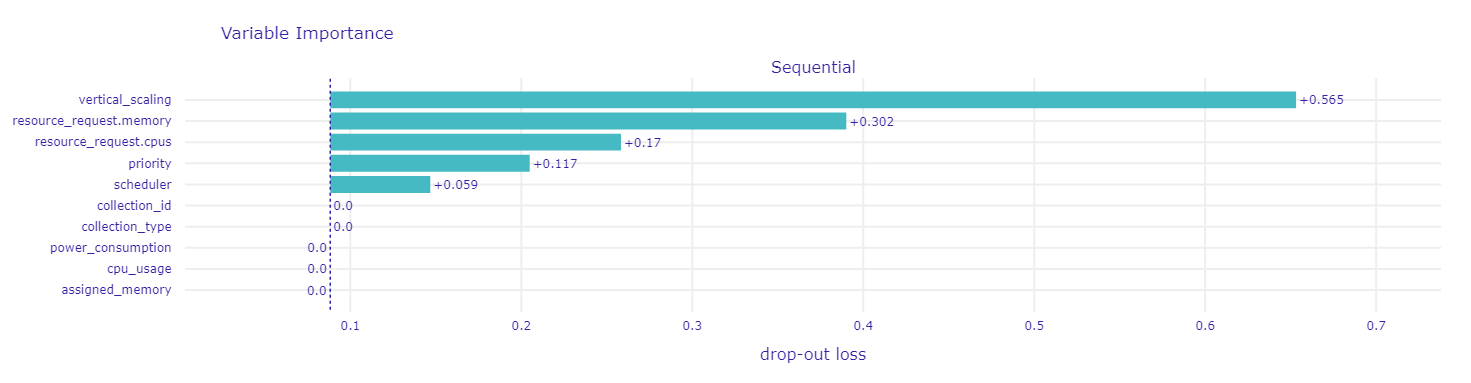

In [87]:
explanation_GRU_SMOTE_train = exp_GRU_SMOTE_train.model_parts()
explanation_GRU_SMOTE_train.result
explanation_GRU_SMOTE_train.plot()

In [88]:
exp_GRU_SMOTE_train.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0         4.953396e+11       1.0               1.884318   
1         4.767899e+11       2.0              -0.692554   
2         4.945463e+11       1.0              -0.613973   
3         4.945463e+11       1.0              -0.613973   
4         4.982169e+11       1.0               0.416916   
...                ...       ...                    ...   
1166719   4.980479e+11       1.0               0.416916   
1166720   4.980479e+11       1.0               0.416916   
1166721   4.767899e+11       2.0              -0.692554   
1166722   4.984476e+11       1.0               0.428609   
1166723   4.767899e+11       2.0              -0.692554   

         resource_request.memory  collection_type  vertical_scaling  \
0                       2.165943              0.0               2.0   
1                      -0.562505              0.0               3.0   
2                       0.239532              0.0               2.0   
3                       0.239532              0.0               2.0   
4                       0.635787              0.0               2.0   
...                          ...              ...               ...   
1166719                 2.049133              0.0               1.0   
1166720                 2.049133              0.0               1.0   
1166721                -0.562505              0.0               3.0   
1166722                -0.159731              0.0               3.0   
1166723                -0.562505              0.0               3.0   

         scheduler  assigned_memory  cpu_usage  power_consumption    y  \
0              1.0         0.013779   0.611328         128.792671  0.0   
1              1.0         0.001163   0.004663          87.509265  1.0   
2              1.0         0.002460   0.002063          87.229200  0.0   
3              1.0         0.002460   0.002058          87.228679  0.0   
4              1.0         0.003300   0.004447          87.486289  0.0   
...            ...              ...        ...                ...  ...   
1166719        1.0         0.010422   0.002272          87.251969  1.0   
1166720        1.0         0.010422   0.002283          87.253215  1.0   
1166721        1.0         0.001163   0.003426          87.376855  1.0   
1166722        1.0         0.001957   0.028427          89.900671  1.0   
1166723        1.0         0.001163   0.003981          87.436440  1.0   

            y_hat  residuals  abs_residuals       label      ids  
0        0.000012  -0.000012       0.000012  Sequential        1  
1        0.999968   0.000032       0.000032  Sequential        2  
2        0.000013  -0.000013       0.000013  Sequential        3  
3        0.000013  -0.000013       0.000013  Sequential        4  
4        0.000011  -0.000011       0.000011  Sequential        5  
...           ...        ...            ...         ...      ...  
1166719  0.999950   0.000050       0.000050  Sequential  1166720  
1166720  0.999950   0.000050       0.000050  Sequential  1166721  
1166721  0.999968   0.000032       0.000032  Sequential  1166722  
1166722  0.999246   0.000754       0.000754  Sequential  1166723  
1166723  0.999968   0.000032       0.000032  Sequential  1166724  

[1166724 rows x 16 columns]

In [89]:
GRU_SMOTE_test = km.load_model('Jobs/GRU/GRU_SMOTE.keras')
exp_GRU_SMOTE_test = dx.Explainer(GRU_SMOTE_test, X_test_SMOTE, Y_test_SMOTE)

Preparation of a new explainer is initiated

  -> data              : 500104 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 500104 values
  -> model_class       : keras.engine.sequential.Sequential (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_tf_regression at 0x000002D212BDC670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 6.46e-06, mean = 0.507, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00692, max = 1.0
  -> model_info        : package keras

A new explainer has been created!


In [90]:
exp_GRU_SMOTE_test.model_performance(model_type = 'classification')

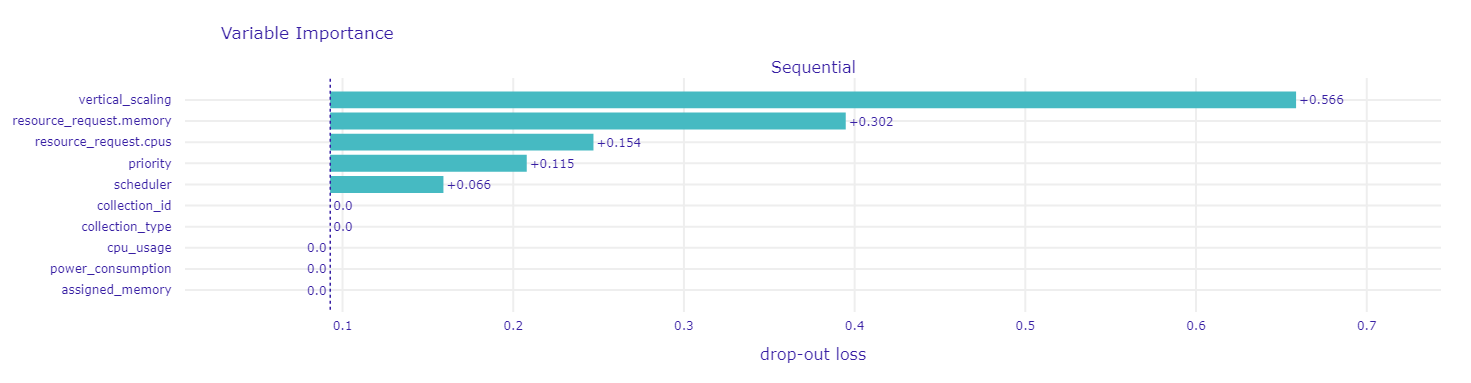

In [91]:
explanation_GRU_SMOTE_test = exp_GRU_SMOTE_test.model_parts()
explanation_GRU_SMOTE_test.result
explanation_GRU_SMOTE_test.plot()

In [92]:
exp_GRU_SMOTE_test.model_diagnostics().result

collection_id  priority  resource_request.cpus  \
0        4.980479e+11       1.0               0.416916   
1        4.963447e+11       1.0               0.416916   
2        4.945463e+11       1.0              -0.613973   
3        4.953396e+11       1.0               1.884318   
4        4.982237e+11       1.0               0.186097   
...               ...       ...                    ...   
500099   4.767899e+11       2.0              -0.692554   
500100   4.599540e+11       1.0              -0.445984   
500101   4.767899e+11       2.0              -0.692554   
500102   4.767899e+11       2.0              -0.692554   
500103   4.980479e+11       1.0               0.416916   

        resource_request.memory  collection_type  vertical_scaling  scheduler  \
0                      2.049133              0.0               1.0        1.0   
1                      2.049133              0.0               1.0        1.0   
2                      0.239532              0.0               2.0        1.0   
3                      2.165943              0.0               2.0        1.0   
4                      1.212256              0.0               2.0        1.0   
...                         ...              ...               ...        ...   
500099                -0.562505              0.0               3.0        1.0   
500100                -0.467412              0.0               3.0        1.0   
500101                -0.562505              0.0               3.0        1.0   
500102                -0.562505              0.0               3.0        1.0   
500103                 2.049133              0.0               1.0        1.0   

        assigned_memory     cpu_usage  power_consumption    y     y_hat  \
0              0.010422  2.098083e-03          87.233051  1.0  0.999950   
1              0.010422  5.584717e-03          87.607161  1.0  0.999950   
2              0.002460  2.060890e-03          87.228992  0.0  0.000013   
3              0.013779  4.572754e-01         120.649518  0.0  0.000012   
4              0.005600  9.536743e-07          87.000110  0.0  0.000782   
...                 ...           ...                ...  ...       ...   
500099         0.001163  4.050255e-03          87.443894  1.0  0.999968   
500100         0.003754  3.694534e-03          87.405762  1.0  0.999562   
500101         0.001163  3.962517e-03          87.434499  1.0  0.999968   
500102         0.001163  3.477097e-03          87.382396  1.0  0.999968   
500103         0.010422  2.233505e-03          87.247814  1.0  0.999950   

        residuals  abs_residuals       label     ids  
0        0.000050       0.000050  Sequential       1  
1        0.000050       0.000050  Sequential       2  
2       -0.000013       0.000013  Sequential       3  
3       -0.000012       0.000012  Sequential       4  
4       -0.000782       0.000782  Sequential       5  
...           ...            ...         ...     ...  
500099   0.000032       0.000032  Sequential  500100  
500100   0.000438       0.000438  Sequential  500101  
500101   0.000032       0.000032  Sequential  500102  
500102   0.000032       0.000032  Sequential  500103  
500103   0.000050       0.000050  Sequential  500104  

[500104 rows x 16 columns]

In [272]:
exp1_WIB_train = exp_LR_train.model_performance(model_type = 'classification')
exp2_WIB_train = exp_DT_train.model_performance(model_type = 'classification')
exp3_WIB_train = exp_RF_train.model_performance(model_type = 'classification')
exp4_WIB_train = exp_GB_train.model_performance(model_type = 'classification')
exp5_WIB_train = exp_XGB_train.model_performance(model_type = 'classification')
exp6_WIB_train = exp_LSTM_train.model_performance(model_type = 'classification')
exp7_WIB_train = exp_GRU_train.model_performance(model_type = 'classification')

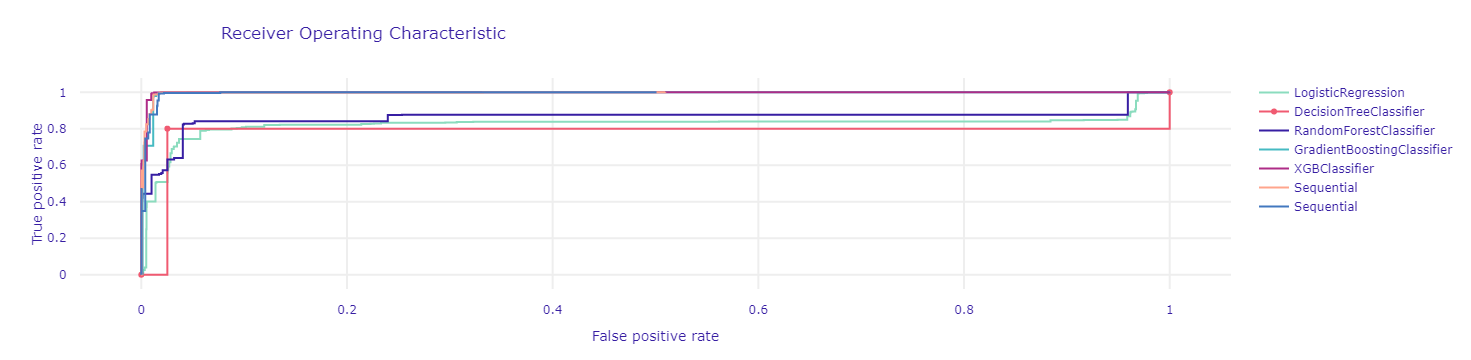

In [279]:
exp1_WIB_train.plot([exp2_WIB_train, exp3_WIB_train, exp4_WIB_train, exp5_WIB_train, exp6_WIB_train, exp7_WIB_train], geom = 'roc')

In [280]:
exp1_WIB_test = exp_LR_test.model_performance(model_type = 'classification')
exp2_WIB_test = exp_DT_test.model_performance(model_type = 'classification')
exp3_WIB_test = exp_RF_test.model_performance(model_type = 'classification')
exp4_WIB_test = exp_GB_test.model_performance(model_type = 'classification')
exp5_WIB_test = exp_XGB_test.model_performance(model_type = 'classification')
exp6_WIB_test = exp_LSTM_test.model_performance(model_type = 'classification')
exp7_WIB_test = exp_GRU_test.model_performance(model_type = 'classification')

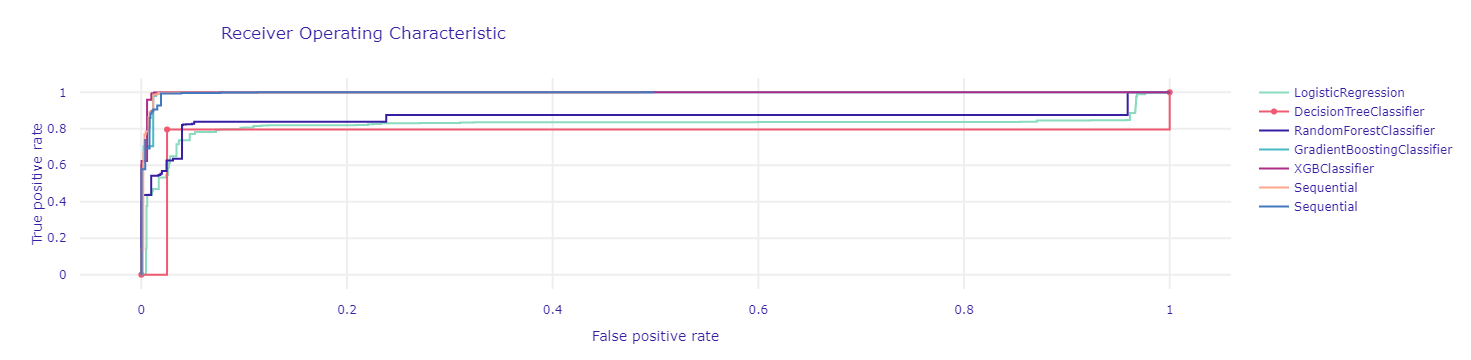

In [281]:
exp1_WIB_test.plot([exp2_WIB_test, exp3_WIB_test, exp4_WIB_test, exp5_WIB_test, exp6_WIB_test, exp7_WIB_test], geom = 'roc')

In [282]:
exp1_RUS_train = exp_LR_RUS_train.model_performance(model_type = 'classification')
exp2_RUS_train = exp_DT_RUS_train.model_performance(model_type = 'classification')
exp3_RUS_train = exp_RF_RUS_train.model_performance(model_type = 'classification')
exp4_RUS_train = exp_GB_RUS_train.model_performance(model_type = 'classification')
exp5_RUS_train = exp_XGB_RUS_train.model_performance(model_type = 'classification')
exp6_RUS_train = exp_LSTM_RUS.model_performance(model_type = 'classification')
exp7_RUS_train = exp_GRU_RUS_train.model_performance(model_type = 'classification')

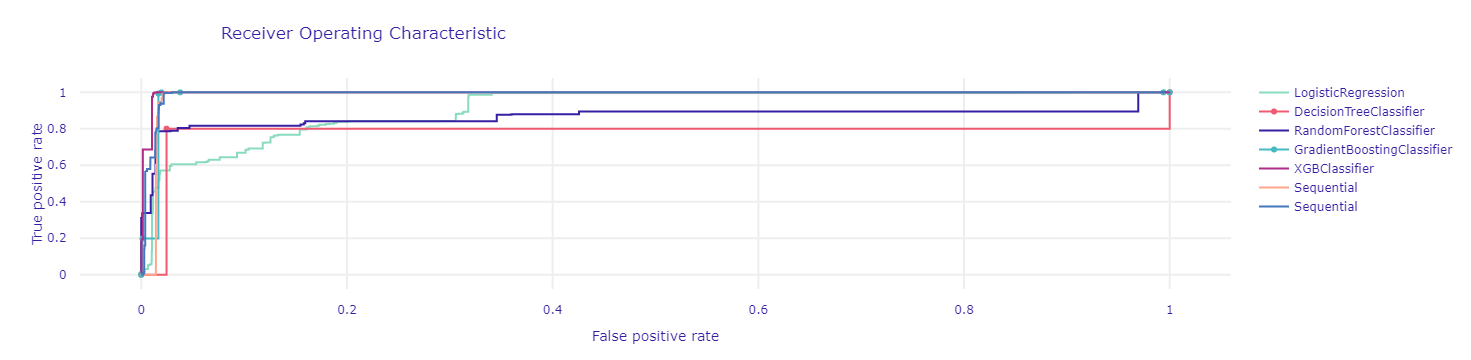

In [283]:
exp1_RUS_train.plot([exp2_RUS_train, exp3_RUS_train, exp4_RUS_train, exp5_RUS_train, exp6_RUS_train, exp7_RUS_train], geom = 'roc')

In [284]:
exp1_RUS_test = exp_LR_RUS_test.model_performance(model_type = 'classification')
exp2_RUS_test = exp_DT_RUS_test.model_performance(model_type = 'classification')
exp3_RUS_test = exp_RF_RUS_test.model_performance(model_type = 'classification')
exp4_RUS_test = exp_GB_RUS_test.model_performance(model_type = 'classification')
exp5_RUS_test = exp_XGB_RUS_test.model_performance(model_type = 'classification')
exp6_RUS_test = exp_LSTM_RUS_test.model_performance(model_type = 'classification')
exp7_RUS_test = exp_GRU_RUS_test.model_performance(model_type = 'classification')

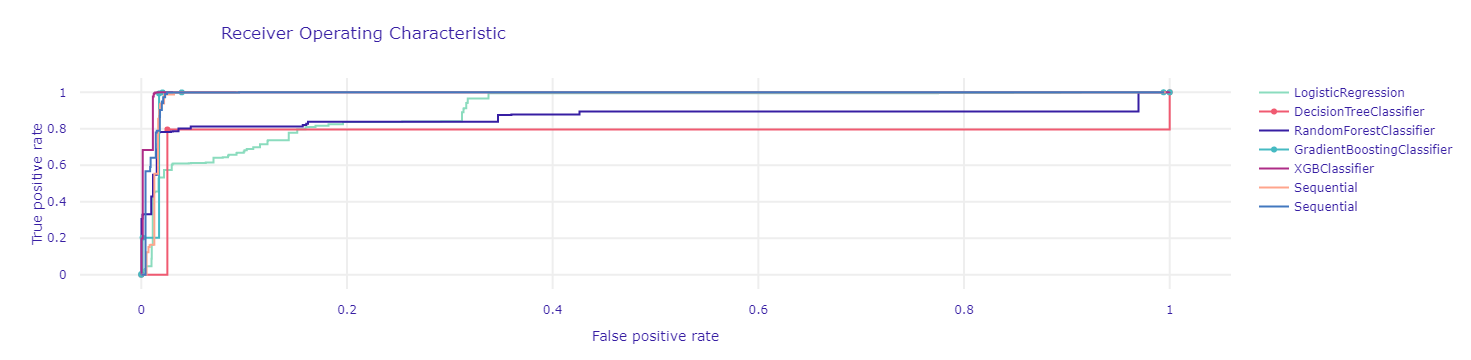

In [285]:
exp1_RUS_test.plot([exp2_RUS_test, exp3_RUS_test, exp4_RUS_test, exp5_RUS_test, exp6_RUS_test, exp7_RUS_test], geom = 'roc')

In [286]:
exp1_ROS_train = exp_LR_ROS_train.model_performance(model_type = 'classification')
exp2_ROS_train = exp_DT_ROS_train.model_performance(model_type = 'classification')
exp3_ROS_train = exp_RF_ROS_train.model_performance(model_type = 'classification')
exp4_ROS_train = exp_GB_ROS_train.model_performance(model_type = 'classification')
exp5_ROS_train = exp_XGB_ROS_train.model_performance(model_type = 'classification')
exp6_ROS_train = exp_LSTM_ROS_train.model_performance(model_type = 'classification')
exp7_ROS_train = exp_GRU_ROS_train.model_performance(model_type = 'classification')

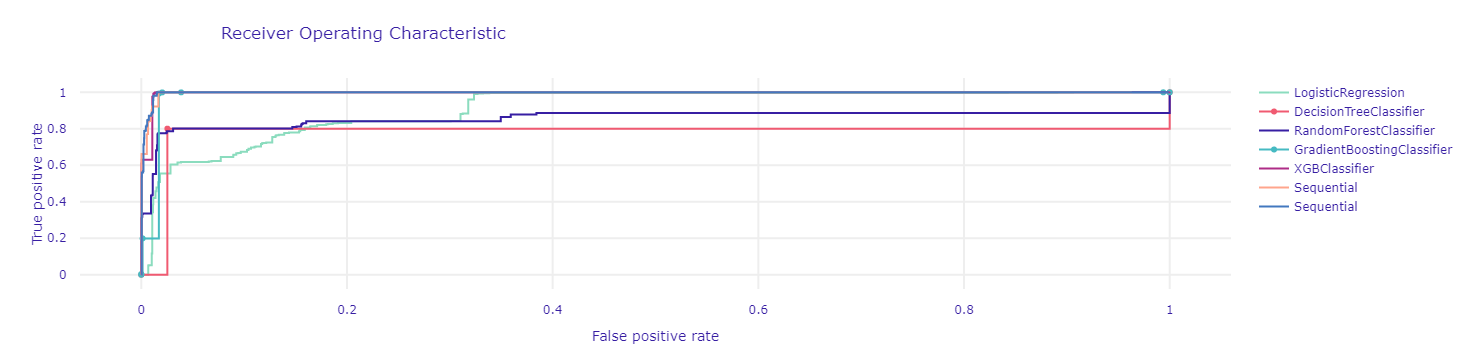

In [287]:
exp1_ROS_train.plot([exp2_ROS_train, exp3_ROS_train, exp4_ROS_train, exp5_ROS_train, exp6_ROS_train, exp7_ROS_train], geom = 'roc')

In [288]:
exp1_ROS_test = exp_LR_ROS_test.model_performance(model_type = 'classification')
exp2_ROS_test = exp_DT_ROS_test.model_performance(model_type = 'classification')
exp3_ROS_test = exp_RF_ROS_test.model_performance(model_type = 'classification')
exp4_ROS_test = exp_GB_ROS_test.model_performance(model_type = 'classification')
exp5_ROS_test = exp_XGB_ROS_test.model_performance(model_type = 'classification')
exp6_ROS_test = exp_LSTM_ROS_test.model_performance(model_type = 'classification')
exp7_ROS_test = exp_GRU_ROS_test.model_performance(model_type = 'classification')

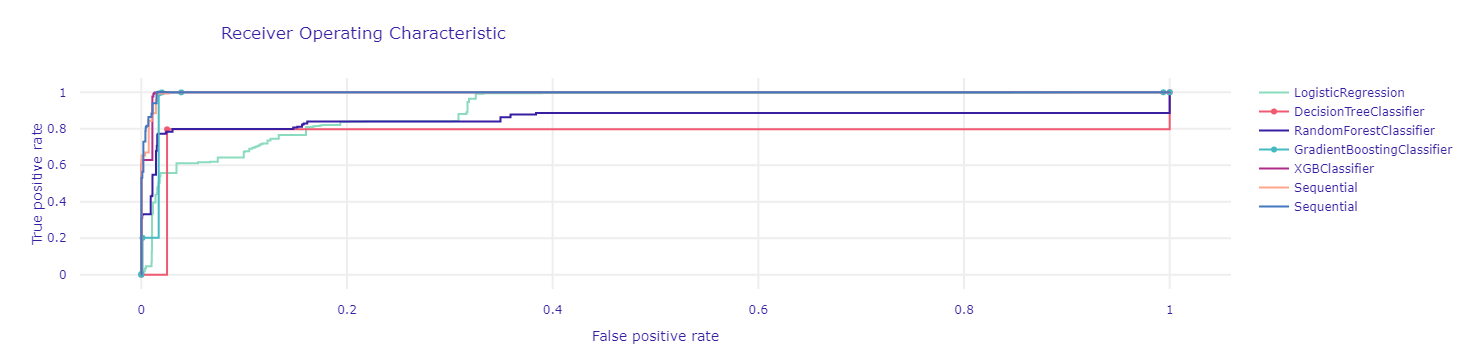

In [289]:
exp1_ROS_test.plot([exp2_ROS_test, exp3_ROS_test, exp4_ROS_test, exp5_ROS_test, exp6_ROS_test, exp7_ROS_test], geom = 'roc')

In [290]:
exp1_SMOTE_train = exp_LR_SMOTE_train.model_performance(model_type = 'classification')
exp2_SMOTE_train = exp_DT_SMOTE_train.model_performance(model_type = 'classification')
exp3_SMOTE_train = exp_RF_SMOTE_train.model_performance(model_type = 'classification')
exp4_SMOTE_train = exp_GB_SMOTE_train.model_performance(model_type = 'classification')
exp5_SMOTE_train = exp_XGB_SMOTE_train.model_performance(model_type = 'classification')
exp6_SMOTE_train = exp_LSTM_SMOTE_train.model_performance(model_type = 'classification')
exp7_SMOTE_train = exp_GRU_SMOTE_train.model_performance(model_type = 'classification')

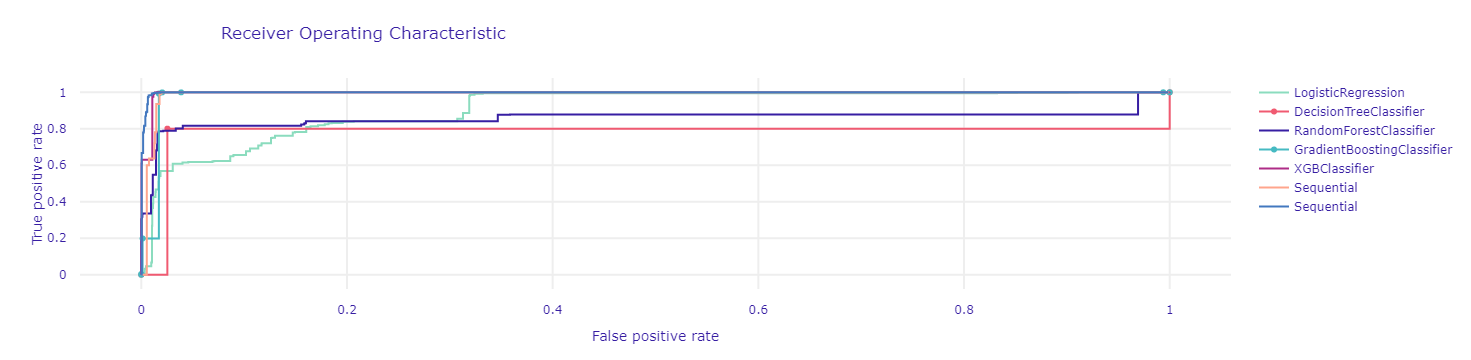

In [291]:
exp1_SMOTE_train.plot([exp2_SMOTE_train, exp3_SMOTE_train, exp4_SMOTE_train, exp5_SMOTE_train, exp6_SMOTE_train, exp7_SMOTE_train], geom = 'roc')

In [292]:
exp1_SMOTE_test = exp_LR_SMOTE_test.model_performance(model_type = 'classification')
exp2_SMOTE_test = exp_DT_SMOTE_test.model_performance(model_type = 'classification')
exp3_SMOTE_test = exp_RF_SMOTE_test.model_performance(model_type = 'classification')
exp4_SMOTE_test = exp_GB_SMOTE_test.model_performance(model_type = 'classification')
exp5_SMOTE_test = exp_XGB_SMOTE_test.model_performance(model_type = 'classification')
exp6_SMOTE_test = exp_LSTM_SMOTE_test.model_performance(model_type = 'classification')
exp7_SMOTE_test = exp_GRU_SMOTE_test.model_performance(model_type = 'classification')

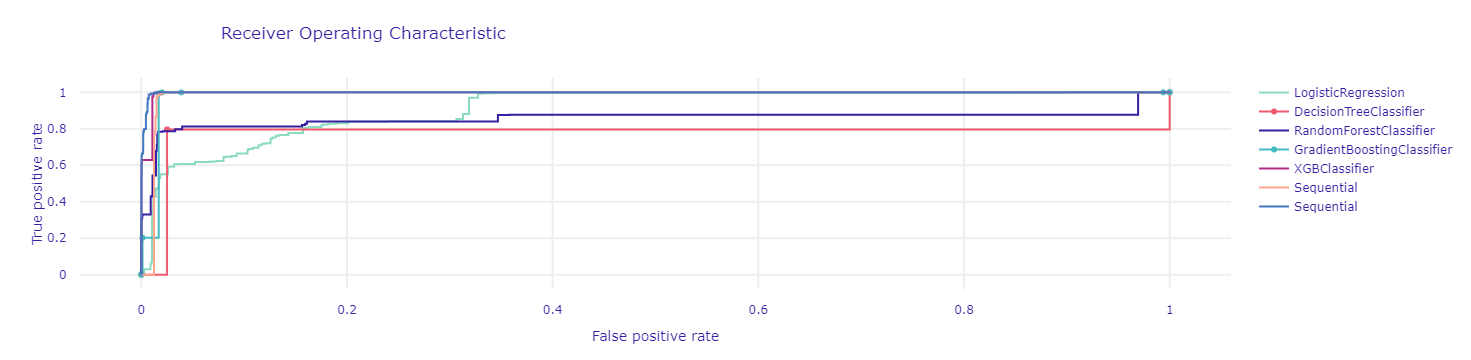

In [293]:
exp1_SMOTE_test.plot([exp2_SMOTE_test, exp3_SMOTE_test, exp4_SMOTE_test, exp5_SMOTE_test, exp6_SMOTE_test, exp7_SMOTE_test], geom = 'roc')